In [1]:
import time, os, json
import numpy as np
import matplotlib.pyplot as plt

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
%load_ext autoreload
%autoreload 2

import pickle
from tqdm import tqdm

from EKFNet import EKFNet_layers 
from EKFNet import EKFNet 
from EKFNet import EKF_solver
from EKFNet import config

from EKFNet import uncertaintyNet


In [2]:
#training_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving"
correcte_measurement_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving_heading_corrected"
GT_data_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving_GT"

training_data = pickle.load(open(correcte_measurement_file_name , 'rb'))
GT_data       = pickle.load(open(GT_data_file_name , 'rb'))

In [3]:
print("Total Length of the data ", len(training_data), len(GT_data))

Total Length of the data  934 934


In [4]:
training_detection    = training_data[0:600]
validation_detection  = training_data[600:800]
test_detection        = training_data[800:934]

training_gt    = GT_data[0:600]
validation_gt  = GT_data[600:800]
test_gt        = GT_data[800:934]

training_data = {
    "data" : training_detection,
    "gt"   : training_gt
}

validation_data = {
    "data" : validation_detection,
    "gt"   : validation_gt
}

test_data = {
    "data" : test_detection,
    "gt"   : test_gt
}

Length of the filter states 40
Length of the detection  40


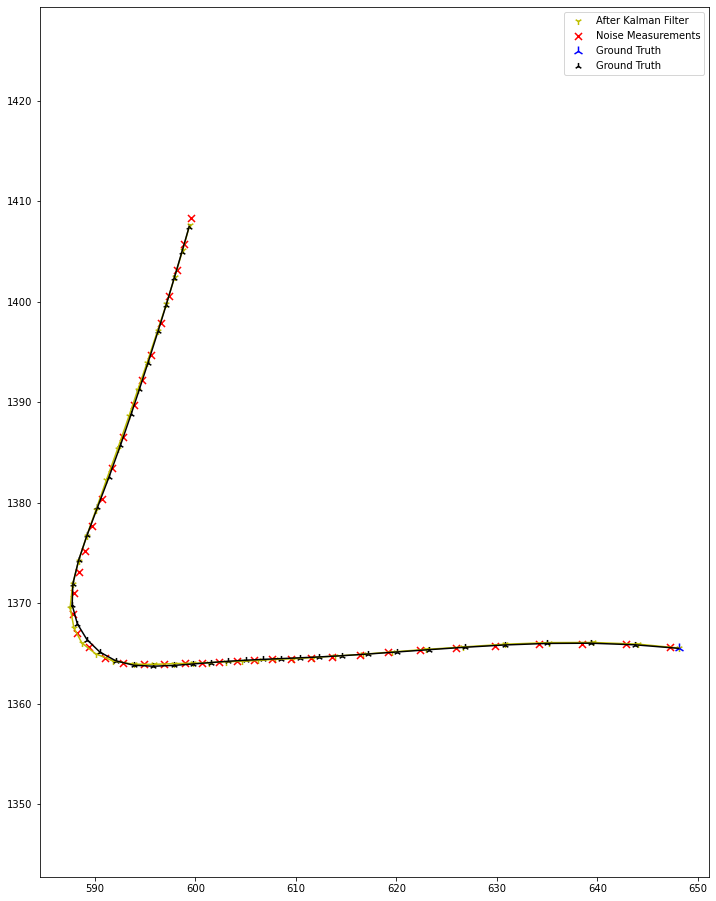

dR is 
 [[-0.01 0.00 0.01 -0.00 0.00]
 [0.00 -0.02 0.00 -0.00 -0.00]
 [0.01 0.00 -0.34 -0.00 -0.00]
 [-0.00 -0.00 -0.00 -0.17 -0.00]
 [0.00 -0.00 0.00 0.00 -0.18]]
dQ_acc is 
 [[-0.01 -0.00]
 [-0.00 -0.01]]
dQ_other is 
 [[-0.01 -0.00 0.00 -0.02 0.00 -0.00 -0.00]
 [0.01 -0.02 0.00 0.01 0.00 -0.00 -0.00]
 [-0.01 -0.01 -0.06 -0.01 0.02 -0.00 -0.00]
 [0.01 -0.01 0.00 -0.05 -0.00 0.00 0.00]
 [-0.00 0.00 0.02 -0.00 -0.04 0.00 0.01]
 [-0.00 0.00 -0.00 -0.00 -0.00 -0.09 0.00]
 [-0.00 0.00 0.00 0.00 -0.00 0.00 -0.09]]
RMS_state  :  0.875132453741094
RMS_meas  :  0.8106496979971131
logLikelihood_state  :  7.62234235403735
logLikelihood_meas  :  11.088283455247874


In [5]:
uncertainty_net = uncertaintyNet.uncertaintyNet()

EKF_filter = EKFNet.EKFNet(network = uncertainty_net)
# TODO: working on the loaddata
testing_index = 100

EKF_filter.load_data_set(datasets = training_data['data'][testing_index], 
                         gt =  training_data['gt'][testing_index] )

EKF_filter.run_EKF_NET_forward()
EKF_filter.plot_overview()

EKF_filter.generate_grad()

# TODO: working on the total loss
loss = EKF_filter.totalLoss()
dR, dQ_acc, dQ_other = EKF_filter.run_backward()

print("dR is \n", dR)
print("dQ_acc is \n", dQ_acc)
print("dQ_other is \n", dQ_other)

for k, v in loss.items():
    print(k, " : " ,v)

# TODO: program the generating the grad
#EKF_filter.generate_fake_grad()

# TODO: working on the backward part
#EKF_filter.run_backward()

#EKF_filter.generate_grad()

In [6]:
uncertainty_net = uncertaintyNet.uncertaintyNet()
solver = EKF_solver.EKFSolver(
    data        = training_data,
    val_data    = validation_data, 
    test_data   = test_data,
    network     = uncertaintyNet.uncertaintyNet(),
    update_rule = config.config["update_rule"],
    lr_decay    = config.config["lr_decay"],
    batch_size  = config.config["batch_size"],
    num_epochs  = config.config["num_epochs"], 
    print_every = config.config["print_every"], 
    verbose     = config.config["verbose"],
    lr          = config.config["lr"]
)
#solver.draw()
solver.training()

  0%|          | 0/600 [00:00<?, ?it/s]

Building the new EKF solver
Begin training, initial setup Finish total training  600


  0%|          | 0/200 [00:00<?, ?it/s]

600
[[-0.48 -0.64 -32.76 -5.33 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {1} / {600}) 
 Post RMS: 0.240121 , 
 Meas RMS: 0.280283 ,
 Post Like: -3.679144, 
 Meas Like 1.840371
(Validation) 
 Post RMS: 0.210964 , 
 Meas RMS: 0.231500 ,
 Post Like: -3.768671, 
 Meas Like 1.767426


  0%|          | 1/200 [00:00<00:22,  8.83it/s]

600
[[-0.48 -0.64 -32.75 -5.25 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {2} / {600}) 
 Post RMS: 0.240832 , 
 Meas RMS: 0.280949 ,
 Post Like: -3.648798, 
 Meas Like 1.849830
(Validation) 
 Post RMS: 0.211567 , 
 Meas RMS: 0.232062 ,
 Post Like: -3.739777, 
 Meas Like 1.776849


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.47 -0.63 -32.74 -5.18 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {3} / {600}) 
 Post RMS: 0.241537 , 
 Meas RMS: 0.281610 ,
 Post Like: -3.620053, 
 Meas Like 1.859135
(Validation) 
 Post RMS: 0.212165 , 
 Meas RMS: 0.232620 ,
 Post Like: -3.712351, 
 Meas Like 1.786113


  1%|          | 2/200 [00:00<00:13, 14.48it/s]

600
[[-0.47 -0.63 -32.73 -5.10 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {4} / {600}) 
 Post RMS: 0.242237 , 
 Meas RMS: 0.282267 ,
 Post Like: -3.592835, 
 Meas Like 1.868277
(Validation) 
 Post RMS: 0.212759 , 
 Meas RMS: 0.233174 ,
 Post Like: -3.686251, 
 Meas Like 1.795215


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.47 -0.63 -32.73 -5.03 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {5} / {600}) 
 Post RMS: 0.242931 , 
 Meas RMS: 0.282918 ,
 Post Like: -3.566974, 
 Meas Like 1.877257
(Validation) 
 Post RMS: 0.213348 , 
 Meas RMS: 0.233724 ,
 Post Like: -3.661355, 
 Meas Like 1.804159


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.47 -0.62 -32.72 -4.96 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {6} / {600}) 
 Post RMS: 0.243621 , 
 Meas RMS: 0.283565 ,
 Post Like: -3.542361, 
 Meas Like 1.886075
(Validation) 
 Post RMS: 0.213933 , 
 Meas RMS: 0.234270 ,
 Post Like: -3.637563, 
 Meas Like 1.812947


  1%|          | 2/200 [00:00<00:16, 12.14it/s]

600
[[-0.46 -0.62 -32.71 -4.90 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {7} / {600}) 
 Post RMS: 0.244304 , 
 Meas RMS: 0.284207 ,
 Post Like: -3.518916, 
 Meas Like 1.894727
(Validation) 
 Post RMS: 0.214513 , 
 Meas RMS: 0.234811 ,
 Post Like: -3.614673, 
 Meas Like 1.821597


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.46 -0.62 -32.71 -4.84 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {8} / {600}) 
 Post RMS: 0.244983 , 
 Meas RMS: 0.284844 ,
 Post Like: -3.496481, 
 Meas Like 1.903228
(Validation) 
 Post RMS: 0.215080 , 
 Meas RMS: 0.235339 ,
 Post Like: -3.591592, 
 Meas Like 1.830539


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.46 -0.62 -32.70 -4.78 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {9} / {600}) 
 Post RMS: 0.245655 , 
 Meas RMS: 0.285472 ,
 Post Like: -3.474497, 
 Meas Like 1.911737
(Validation) 
 Post RMS: 0.215357 , 
 Meas RMS: 0.235390 ,
 Post Like: -3.536835, 
 Meas Like 1.856559


  1%|          | 2/200 [00:00<00:13, 14.49it/s]

600
[[-0.46 -0.61 -31.65 -4.72 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {10} / {600}) 
 Post RMS: 0.245774 , 
 Meas RMS: 0.285333 ,
 Post Like: -3.424934, 
 Meas Like 1.935713
(Validation) 
 Post RMS: 0.215141 , 
 Meas RMS: 0.234424 ,
 Post Like: -3.446397, 
 Meas Like 1.905428


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.46 -0.61 -28.88 -4.66 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {11} / {600}) 
 Post RMS: 0.245081 , 
 Meas RMS: 0.283650 ,
 Post Like: -3.330843, 
 Meas Like 1.986204
(Validation) 
 Post RMS: 0.214670 , 
 Meas RMS: 0.232876 ,
 Post Like: -3.340723, 
 Meas Like 1.965614


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.46 -0.61 -25.70 -4.61 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.29it/s]

(Iteration {12} / {600}) 
 Post RMS: 0.244304 , 
 Meas RMS: 0.281475 ,
 Post Like: -3.222611, 
 Meas Like 2.047575
(Validation) 
 Post RMS: 0.214299 , 
 Meas RMS: 0.231319 ,
 Post Like: -3.204014, 
 Meas Like 2.046724


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.45 -0.61 -21.74 -4.55 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {13} / {600}) 
 Post RMS: 0.243557 , 
 Meas RMS: 0.279129 ,
 Post Like: -3.092566, 
 Meas Like 2.125356
(Validation) 
 Post RMS: 0.214197 , 
 Meas RMS: 0.230170 ,
 Post Like: -3.095795, 
 Meas Like 2.114187


  1%|          | 2/200 [00:00<00:14, 13.46it/s]

600
[[-0.45 -0.60 -19.01 -4.51 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.31it/s]

(Iteration {14} / {600}) 
 Post RMS: 0.243224 , 
 Meas RMS: 0.277420 ,
 Post Like: -2.988080, 
 Meas Like 2.191203
(Validation) 
 Post RMS: 0.214289 , 
 Meas RMS: 0.229379 ,
 Post Like: -3.006442, 
 Meas Like 2.171801


  0%|          | 1/200 [00:00<00:19,  9.99it/s]

600
[[-0.45 -0.60 -16.99 -4.48 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {15} / {600}) 
 Post RMS: 0.243157 , 
 Meas RMS: 0.276185 ,
 Post Like: -2.900129, 
 Meas Like 2.248345
(Validation) 
 Post RMS: 0.214494 , 
 Meas RMS: 0.228798 ,
 Post Like: -2.928274, 
 Meas Like 2.222949


  1%|          | 2/200 [00:00<00:13, 14.55it/s]

600
[[-0.45 -0.60 -15.42 -4.44 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.21it/s]

(Iteration {16} / {600}) 
 Post RMS: 0.243263 , 
 Meas RMS: 0.275292 ,
 Post Like: -2.823003, 
 Meas Like 2.299255
(Validation) 
 Post RMS: 0.214796 , 
 Meas RMS: 0.228408 ,
 Post Like: -2.858029, 
 Meas Like 2.269394


  1%|          | 2/200 [00:00<00:13, 14.25it/s]

600
[[-0.45 -0.60 -14.16 -4.40 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {17} / {600}) 
 Post RMS: 0.243490 , 
 Meas RMS: 0.274643 ,
 Post Like: -2.754330, 
 Meas Like 2.345104
(Validation) 
 Post RMS: 0.215147 , 
 Meas RMS: 0.228164 ,
 Post Like: -2.795005, 
 Meas Like 2.311684


  1%|          | 2/200 [00:00<00:15, 12.94it/s]

600
[[-0.45 -0.59 -13.12 -4.36 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {18} / {600}) 
 Post RMS: 0.243770 , 
 Meas RMS: 0.274164 ,
 Post Like: -2.692762, 
 Meas Like 2.386514
(Validation) 
 Post RMS: 0.215521 , 
 Meas RMS: 0.228016 ,
 Post Like: -2.737898, 
 Meas Like 2.350343


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.44 -0.59 -12.23 -4.33 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {19} / {600}) 
 Post RMS: 0.244094 , 
 Meas RMS: 0.273803 ,
 Post Like: -2.636363, 
 Meas Like 2.424603
(Validation) 
 Post RMS: 0.215901 , 
 Meas RMS: 0.227922 ,
 Post Like: -2.684384, 
 Meas Like 2.386561


  1%|          | 2/200 [00:00<00:14, 13.52it/s]

600
[[-0.44 -0.59 -11.44 -4.29 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {20} / {600}) 
 Post RMS: 0.244449 , 
 Meas RMS: 0.273544 ,
 Post Like: -2.583328, 
 Meas Like 2.460179
(Validation) 
 Post RMS: 0.216277 , 
 Meas RMS: 0.227866 ,
 Post Like: -2.633667, 
 Meas Like 2.420635


  1%|          | 2/200 [00:00<00:13, 14.54it/s]

600
[[-0.44 -0.59 -10.72 -4.25 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {21} / {600}) 
 Post RMS: 0.244816 , 
 Meas RMS: 0.273358 ,
 Post Like: -2.533510, 
 Meas Like 2.493573
(Validation) 
 Post RMS: 0.216662 , 
 Meas RMS: 0.227860 ,
 Post Like: -2.586145, 
 Meas Like 2.452373


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.44 -0.58 -10.08 -4.21 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {22} / {600}) 
 Post RMS: 0.245199 , 
 Meas RMS: 0.273239 ,
 Post Like: -2.486572, 
 Meas Like 2.525013
(Validation) 
 Post RMS: 0.217054 , 
 Meas RMS: 0.227897 ,
 Post Like: -2.541724, 
 Meas Like 2.481966


  0%|          | 1/200 [00:00<00:21,  9.17it/s]

600
[[-0.44 -0.58 -9.53 -4.17 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {23} / {600}) 
 Post RMS: 0.245596 , 
 Meas RMS: 0.273181 ,
 Post Like: -2.442537, 
 Meas Like 2.554461
(Validation) 
 Post RMS: 0.217449 , 
 Meas RMS: 0.227970 ,
 Post Like: -2.499762, 
 Meas Like 2.509799


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.44 -0.58 -9.07 -4.12 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {24} / {600}) 
 Post RMS: 0.246003 , 
 Meas RMS: 0.273173 ,
 Post Like: -2.400942, 
 Meas Like 2.582173
(Validation) 
 Post RMS: 0.217846 , 
 Meas RMS: 0.228072 ,
 Post Like: -2.459858, 
 Meas Like 2.536139


  1%|          | 2/200 [00:00<00:14, 13.35it/s]

600
[[-0.44 -0.58 -8.67 -4.08 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.28it/s]

(Iteration {25} / {600}) 
 Post RMS: 0.246416 , 
 Meas RMS: 0.273204 ,
 Post Like: -2.361379, 
 Meas Like 2.608413
(Validation) 
 Post RMS: 0.218244 , 
 Meas RMS: 0.228197 ,
 Post Like: -2.421716, 
 Meas Like 2.561200


  1%|          | 2/200 [00:00<00:14, 13.40it/s]

600
[[-0.43 -0.58 -8.31 -4.03 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {26} / {600}) 
 Post RMS: 0.246833 , 
 Meas RMS: 0.273269 ,
 Post Like: -2.323573, 
 Meas Like 2.633375
(Validation) 
 Post RMS: 0.218642 , 
 Meas RMS: 0.228342 ,
 Post Like: -2.385122, 
 Meas Like 2.585148


  1%|          | 2/200 [00:00<00:14, 13.48it/s]

600
[[-0.43 -0.57 -8.00 -3.97 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {27} / {600}) 
 Post RMS: 0.247251 , 
 Meas RMS: 0.273361 ,
 Post Like: -2.287311, 
 Meas Like 2.657226
(Validation) 
 Post RMS: 0.219038 , 
 Meas RMS: 0.228504 ,
 Post Like: -2.349923, 
 Meas Like 2.608115


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.43 -0.57 -7.73 -3.92 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {28} / {600}) 
 Post RMS: 0.247671 , 
 Meas RMS: 0.273478 ,
 Post Like: -2.252428, 
 Meas Like 2.680101
(Validation) 
 Post RMS: 0.219434 , 
 Meas RMS: 0.228680 ,
 Post Like: -2.315998, 
 Meas Like 2.630208


  1%|          | 2/200 [00:00<00:13, 14.50it/s]

600
[[-0.43 -0.57 -7.48 -3.87 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {29} / {600}) 
 Post RMS: 0.248091 , 
 Meas RMS: 0.273615 ,
 Post Like: -2.218807, 
 Meas Like 2.702106
(Validation) 
 Post RMS: 0.219827 , 
 Meas RMS: 0.228869 ,
 Post Like: -2.283241, 
 Meas Like 2.651522


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.43 -0.57 -7.26 -3.81 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.22it/s]

(Iteration {30} / {600}) 
 Post RMS: 0.248510 , 
 Meas RMS: 0.273769 ,
 Post Like: -2.186352, 
 Meas Like 2.723330
(Validation) 
 Post RMS: 0.220219 , 
 Meas RMS: 0.229069 ,
 Post Like: -2.251573, 
 Meas Like 2.672132


  1%|          | 2/200 [00:00<00:13, 14.56it/s]

600
[[-0.43 -0.57 -7.05 -3.76 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {31} / {600}) 
 Post RMS: 0.248928 , 
 Meas RMS: 0.273939 ,
 Post Like: -2.154988, 
 Meas Like 2.743847
(Validation) 
 Post RMS: 0.220610 , 
 Meas RMS: 0.229277 ,
 Post Like: -2.220932, 
 Meas Like 2.692098


  1%|          | 2/200 [00:00<00:14, 14.09it/s]

600
[[-0.43 -0.56 -6.87 -3.70 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {32} / {600}) 
 Post RMS: 0.249345 , 
 Meas RMS: 0.274122 ,
 Post Like: -2.124642, 
 Meas Like 2.763721
(Validation) 
 Post RMS: 0.220998 , 
 Meas RMS: 0.229494 ,
 Post Like: -2.191259, 
 Meas Like 2.711477


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.43 -0.56 -6.70 -3.65 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {33} / {600}) 
 Post RMS: 0.249761 , 
 Meas RMS: 0.274317 ,
 Post Like: -2.095255, 
 Meas Like 2.783010
(Validation) 
 Post RMS: 0.221386 , 
 Meas RMS: 0.229719 ,
 Post Like: -2.162499, 
 Meas Like 2.730316


  1%|          | 2/200 [00:00<00:13, 14.44it/s]

600
[[-0.42 -0.56 -6.54 -3.59 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {34} / {600}) 
 Post RMS: 0.250176 , 
 Meas RMS: 0.274522 ,
 Post Like: -2.066777, 
 Meas Like 2.801759
(Validation) 
 Post RMS: 0.221771 , 
 Meas RMS: 0.229950 ,
 Post Like: -2.134607, 
 Meas Like 2.748658


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.42 -0.56 -6.40 -3.54 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {35} / {600}) 
 Post RMS: 0.250590 , 
 Meas RMS: 0.274737 ,
 Post Like: -2.039155, 
 Meas Like 2.820013
(Validation) 
 Post RMS: 0.222156 , 
 Meas RMS: 0.230187 ,
 Post Like: -2.107538, 
 Meas Like 2.766537


  1%|          | 2/200 [00:00<00:13, 14.54it/s]

600
[[-0.42 -0.56 -6.26 -3.48 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.31it/s]

(Iteration {36} / {600}) 
 Post RMS: 0.251002 , 
 Meas RMS: 0.274960 ,
 Post Like: -2.012343, 
 Meas Like 2.837809
(Validation) 
 Post RMS: 0.222539 , 
 Meas RMS: 0.230429 ,
 Post Like: -2.081250, 
 Meas Like 2.783988


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.42 -0.56 -6.14 -3.43 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {37} / {600}) 
 Post RMS: 0.251414 , 
 Meas RMS: 0.275190 ,
 Post Like: -1.986304, 
 Meas Like 2.855180
(Validation) 
 Post RMS: 0.222921 , 
 Meas RMS: 0.230675 ,
 Post Like: -2.055702, 
 Meas Like 2.801040


  1%|          | 2/200 [00:00<00:13, 14.49it/s]

600
[[-0.42 -0.55 -6.02 -3.38 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.26it/s]

(Iteration {38} / {600}) 
 Post RMS: 0.251824 , 
 Meas RMS: 0.275428 ,
 Post Like: -1.960997, 
 Meas Like 2.872155
(Validation) 
 Post RMS: 0.223302 , 
 Meas RMS: 0.230927 ,
 Post Like: -2.030858, 
 Meas Like 2.817720


  1%|          | 2/200 [00:00<00:14, 14.11it/s]

600
[[-0.42 -0.55 -5.91 -3.33 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {39} / {600}) 
 Post RMS: 0.252234 , 
 Meas RMS: 0.275671 ,
 Post Like: -1.936387, 
 Meas Like 2.888761
(Validation) 
 Post RMS: 0.223682 , 
 Meas RMS: 0.231182 ,
 Post Like: -2.006682, 
 Meas Like 2.834052


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.42 -0.55 -5.81 -3.27 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {40} / {600}) 
 Post RMS: 0.252643 , 
 Meas RMS: 0.275921 ,
 Post Like: -1.912438, 
 Meas Like 2.905020
(Validation) 
 Post RMS: 0.224062 , 
 Meas RMS: 0.231441 ,
 Post Like: -1.983141, 
 Meas Like 2.850057


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.42 -0.55 -5.71 -3.23 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {41} / {600}) 
 Post RMS: 0.253051 , 
 Meas RMS: 0.276175 ,
 Post Like: -1.889119, 
 Meas Like 2.920954
(Validation) 
 Post RMS: 0.224441 , 
 Meas RMS: 0.231703 ,
 Post Like: -1.960201, 
 Meas Like 2.865757


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.42 -0.55 -5.61 -3.18 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {42} / {600}) 
 Post RMS: 0.253459 , 
 Meas RMS: 0.276434 ,
 Post Like: -1.866399, 
 Meas Like 2.936581
(Validation) 
 Post RMS: 0.224819 , 
 Meas RMS: 0.231968 ,
 Post Like: -1.937834, 
 Meas Like 2.881170


  1%|          | 2/200 [00:00<00:15, 13.16it/s]

600
[[-0.42 -0.54 -5.53 -3.13 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.19it/s]

(Iteration {43} / {600}) 
 Post RMS: 0.253866 , 
 Meas RMS: 0.276698 ,
 Post Like: -1.844245, 
 Meas Like 2.951922
(Validation) 
 Post RMS: 0.225198 , 
 Meas RMS: 0.232236 ,
 Post Like: -1.916009, 
 Meas Like 2.896312


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.41 -0.54 -5.44 -3.08 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.23it/s]

(Iteration {44} / {600}) 
 Post RMS: 0.254273 , 
 Meas RMS: 0.276966 ,
 Post Like: -1.822630, 
 Meas Like 2.966993
(Validation) 
 Post RMS: 0.225575 , 
 Meas RMS: 0.232508 ,
 Post Like: -1.894698, 
 Meas Like 2.911199


  1%|          | 2/200 [00:00<00:14, 13.51it/s]

600
[[-0.41 -0.54 -5.36 -3.04 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {45} / {600}) 
 Post RMS: 0.254680 , 
 Meas RMS: 0.277237 ,
 Post Like: -1.801527, 
 Meas Like 2.981809
(Validation) 
 Post RMS: 0.225953 , 
 Meas RMS: 0.232781 ,
 Post Like: -1.873876, 
 Meas Like 2.925846


  1%|          | 2/200 [00:00<00:13, 14.54it/s]

600
[[-0.41 -0.54 -5.28 -3.00 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.26it/s]

(Iteration {46} / {600}) 
 Post RMS: 0.255087 , 
 Meas RMS: 0.277513 ,
 Post Like: -1.780907, 
 Meas Like 2.996386
(Validation) 
 Post RMS: 0.226331 , 
 Meas RMS: 0.233057 ,
 Post Like: -1.853518, 
 Meas Like 2.940267


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.41 -0.54 -5.21 -2.95 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {47} / {600}) 
 Post RMS: 0.255494 , 
 Meas RMS: 0.277792 ,
 Post Like: -1.760748, 
 Meas Like 3.010738
(Validation) 
 Post RMS: 0.226709 , 
 Meas RMS: 0.233336 ,
 Post Like: -1.833597, 
 Meas Like 2.954475


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.41 -0.53 -5.14 -2.91 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {48} / {600}) 
 Post RMS: 0.255901 , 
 Meas RMS: 0.278074 ,
 Post Like: -1.741024, 
 Meas Like 3.024877
(Validation) 
 Post RMS: 0.227086 , 
 Meas RMS: 0.233617 ,
 Post Like: -1.814093, 
 Meas Like 2.968482


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.41 -0.53 -5.07 -2.87 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.36it/s]

(Iteration {49} / {600}) 
 Post RMS: 0.256308 , 
 Meas RMS: 0.278359 ,
 Post Like: -1.721713, 
 Meas Like 3.038815
(Validation) 
 Post RMS: 0.227464 , 
 Meas RMS: 0.233900 ,
 Post Like: -1.794983, 
 Meas Like 2.982299


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.41 -0.53 -5.00 -2.83 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {50} / {600}) 
 Post RMS: 0.256716 , 
 Meas RMS: 0.278647 ,
 Post Like: -1.702796, 
 Meas Like 3.052562
(Validation) 
 Post RMS: 0.227843 , 
 Meas RMS: 0.234185 ,
 Post Like: -1.776247, 
 Meas Like 2.995937


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.41 -0.53 -4.94 -2.79 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {51} / {600}) 
 Post RMS: 0.257123 , 
 Meas RMS: 0.278939 ,
 Post Like: -1.684252, 
 Meas Like 3.066129
(Validation) 
 Post RMS: 0.228221 , 
 Meas RMS: 0.234472 ,
 Post Like: -1.757867, 
 Meas Like 3.009404


  1%|          | 2/200 [00:00<00:15, 12.96it/s]

600
[[-0.41 -0.53 -4.88 -2.75 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {52} / {600}) 
 Post RMS: 0.257532 , 
 Meas RMS: 0.279233 ,
 Post Like: -1.666062, 
 Meas Like 3.079526
(Validation) 
 Post RMS: 0.228601 , 
 Meas RMS: 0.234761 ,
 Post Like: -1.739824, 
 Meas Like 3.022710


  1%|          | 2/200 [00:00<00:14, 13.41it/s]

600
[[-0.41 -0.53 -4.82 -2.72 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {53} / {600}) 
 Post RMS: 0.257941 , 
 Meas RMS: 0.279529 ,
 Post Like: -1.648209, 
 Meas Like 3.092760
(Validation) 
 Post RMS: 0.228980 , 
 Meas RMS: 0.235053 ,
 Post Like: -1.722103, 
 Meas Like 3.035863


  1%|          | 2/200 [00:00<00:15, 12.47it/s]

600
[[-0.41 -0.52 -4.76 -2.68 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {54} / {600}) 
 Post RMS: 0.258351 , 
 Meas RMS: 0.279829 ,
 Post Like: -1.630674, 
 Meas Like 3.105843
(Validation) 
 Post RMS: 0.229360 , 
 Meas RMS: 0.235346 ,
 Post Like: -1.704687, 
 Meas Like 3.048871


  1%|          | 2/200 [00:00<00:15, 13.04it/s]

600
[[-0.40 -0.52 -4.70 -2.65 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {55} / {600}) 
 Post RMS: 0.258761 , 
 Meas RMS: 0.280131 ,
 Post Like: -1.613442, 
 Meas Like 3.118781
(Validation) 
 Post RMS: 0.229741 , 
 Meas RMS: 0.235641 ,
 Post Like: -1.687558, 
 Meas Like 3.061743


  1%|          | 2/200 [00:00<00:14, 13.60it/s]

600
[[-0.40 -0.52 -4.65 -2.61 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {56} / {600}) 
 Post RMS: 0.259172 , 
 Meas RMS: 0.280435 ,
 Post Like: -1.596497, 
 Meas Like 3.131583
(Validation) 
 Post RMS: 0.230123 , 
 Meas RMS: 0.235938 ,
 Post Like: -1.670705, 
 Meas Like 3.074486


  1%|          | 2/200 [00:00<00:14, 14.02it/s]

600
[[-0.40 -0.52 -4.60 -2.58 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {57} / {600}) 
 Post RMS: 0.259584 , 
 Meas RMS: 0.280742 ,
 Post Like: -1.579822, 
 Meas Like 3.144257
(Validation) 
 Post RMS: 0.230505 , 
 Meas RMS: 0.236237 ,
 Post Like: -1.654112, 
 Meas Like 3.087105


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.40 -0.52 -4.54 -2.55 -2.75]]


  0%|          | 2/600 [00:00<00:53, 11.25it/s]

(Iteration {58} / {600}) 
 Post RMS: 0.259997 , 
 Meas RMS: 0.281051 ,
 Post Like: -1.563406, 
 Meas Like 3.156808
(Validation) 
 Post RMS: 0.230888 , 
 Meas RMS: 0.236538 ,
 Post Like: -1.637768, 
 Meas Like 3.099607


  1%|          | 2/200 [00:00<00:15, 12.74it/s]

600
[[-0.40 -0.51 -4.49 -2.52 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {59} / {600}) 
 Post RMS: 0.260411 , 
 Meas RMS: 0.281363 ,
 Post Like: -1.547236, 
 Meas Like 3.169245
(Validation) 
 Post RMS: 0.231271 , 
 Meas RMS: 0.236841 ,
 Post Like: -1.621659, 
 Meas Like 3.112000


  1%|          | 2/200 [00:00<00:14, 13.34it/s]

600
[[-0.40 -0.51 -4.44 -2.49 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {60} / {600}) 
 Post RMS: 0.260825 , 
 Meas RMS: 0.281676 ,
 Post Like: -1.531298, 
 Meas Like 3.181572
(Validation) 
 Post RMS: 0.231656 , 
 Meas RMS: 0.237145 ,
 Post Like: -1.605772, 
 Meas Like 3.124288


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.40 -0.51 -4.40 -2.46 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {61} / {600}) 
 Post RMS: 0.261241 , 
 Meas RMS: 0.281992 ,
 Post Like: -1.515583, 
 Meas Like 3.193795
(Validation) 
 Post RMS: 0.232041 , 
 Meas RMS: 0.237451 ,
 Post Like: -1.590098, 
 Meas Like 3.136478


  1%|          | 2/200 [00:00<00:16, 12.08it/s]

600
[[-0.40 -0.51 -4.35 -2.43 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {62} / {600}) 
 Post RMS: 0.261657 , 
 Meas RMS: 0.282311 ,
 Post Like: -1.500079, 
 Meas Like 3.205920
(Validation) 
 Post RMS: 0.232428 , 
 Meas RMS: 0.237759 ,
 Post Like: -1.574627, 
 Meas Like 3.148574


  0%|          | 1/200 [00:00<00:28,  7.08it/s]

600
[[-0.40 -0.51 -4.30 -2.40 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {63} / {600}) 
 Post RMS: 0.262075 , 
 Meas RMS: 0.282631 ,
 Post Like: -1.484776, 
 Meas Like 3.217951
(Validation) 
 Post RMS: 0.232815 , 
 Meas RMS: 0.238069 ,
 Post Like: -1.559348, 
 Meas Like 3.160580


  1%|          | 2/200 [00:00<00:13, 14.24it/s]

600
[[-0.40 -0.51 -4.26 -2.37 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {64} / {600}) 
 Post RMS: 0.262494 , 
 Meas RMS: 0.282954 ,
 Post Like: -1.469657, 
 Meas Like 3.229895
(Validation) 
 Post RMS: 0.233203 , 
 Meas RMS: 0.238380 ,
 Post Like: -1.544244, 
 Meas Like 3.172503


  1%|          | 2/200 [00:00<00:13, 14.53it/s]

600
[[-0.40 -0.50 -4.21 -2.34 -2.75]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {65} / {600}) 
 Post RMS: 0.262913 , 
 Meas RMS: 0.283278 ,
 Post Like: -1.454686, 
 Meas Like 3.241756
(Validation) 
 Post RMS: 0.233592 , 
 Meas RMS: 0.238693 ,
 Post Like: -1.529305, 
 Meas Like 3.184346


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.39 -0.50 -4.17 -2.31 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {66} / {600}) 
 Post RMS: 0.263334 , 
 Meas RMS: 0.283605 ,
 Post Like: -1.439830, 
 Meas Like 3.253541
(Validation) 
 Post RMS: 0.233982 , 
 Meas RMS: 0.239007 ,
 Post Like: -1.514397, 
 Meas Like 3.196119


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.39 -0.50 -4.13 -2.29 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {67} / {600}) 
 Post RMS: 0.263756 , 
 Meas RMS: 0.283934 ,
 Post Like: -1.424914, 
 Meas Like 3.265264
(Validation) 
 Post RMS: 0.234373 , 
 Meas RMS: 0.239323 ,
 Post Like: -1.499076, 
 Meas Like 3.207856


  1%|          | 2/200 [00:00<00:13, 14.20it/s]

600
[[-0.39 -0.50 -4.08 -2.26 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {68} / {600}) 
 Post RMS: 0.264180 , 
 Meas RMS: 0.284264 ,
 Post Like: -1.409555, 
 Meas Like 3.276951
(Validation) 
 Post RMS: 0.234765 , 
 Meas RMS: 0.239639 ,
 Post Like: -1.482959, 
 Meas Like 3.219585


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.39 -0.50 -4.04 -2.24 -2.75]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {69} / {600}) 
 Post RMS: 0.264604 , 
 Meas RMS: 0.284594 ,
 Post Like: -1.393220, 
 Meas Like 3.288641
(Validation) 
 Post RMS: 0.235158 , 
 Meas RMS: 0.239955 ,
 Post Like: -1.466056, 
 Meas Like 3.231315


  1%|          | 2/200 [00:00<00:13, 14.25it/s]

600
[[-0.39 -0.49 -4.00 -2.21 -2.74]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {70} / {600}) 
 Post RMS: 0.265029 , 
 Meas RMS: 0.284924 ,
 Post Like: -1.375983, 
 Meas Like 3.300342
(Validation) 
 Post RMS: 0.235552 , 
 Meas RMS: 0.240271 ,
 Post Like: -1.447525, 
 Meas Like 3.243105


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.39 -0.49 -3.96 -2.19 -2.74]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {71} / {600}) 
 Post RMS: 0.265456 , 
 Meas RMS: 0.285254 ,
 Post Like: -1.357929, 
 Meas Like 3.312054
(Validation) 
 Post RMS: 0.235948 , 
 Meas RMS: 0.240586 ,
 Post Like: -1.428073, 
 Meas Like 3.254926


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.39 -0.49 -3.92 -2.17 -2.74]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {72} / {600}) 
 Post RMS: 0.265884 , 
 Meas RMS: 0.285585 ,
 Post Like: -1.339117, 
 Meas Like 3.323784
(Validation) 
 Post RMS: 0.236343 , 
 Meas RMS: 0.240902 ,
 Post Like: -1.408529, 
 Meas Like 3.266739


  1%|          | 2/200 [00:00<00:13, 14.48it/s]

600
[[-0.39 -0.49 -3.88 -2.14 -2.74]]


  0%|          | 2/600 [00:00<00:51, 11.52it/s]

(Iteration {73} / {600}) 
 Post RMS: 0.266313 , 
 Meas RMS: 0.285916 ,
 Post Like: -1.319834, 
 Meas Like 3.335523
(Validation) 
 Post RMS: 0.236741 , 
 Meas RMS: 0.241218 ,
 Post Like: -1.388864, 
 Meas Like 3.278544


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.39 -0.49 -3.84 -2.12 -2.73]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {74} / {600}) 
 Post RMS: 0.266743 , 
 Meas RMS: 0.286247 ,
 Post Like: -1.299949, 
 Meas Like 3.347285
(Validation) 
 Post RMS: 0.237139 , 
 Meas RMS: 0.241535 ,
 Post Like: -1.369081, 
 Meas Like 3.290342


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.39 -0.49 -3.81 -2.10 -2.73]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {75} / {600}) 
 Post RMS: 0.267175 , 
 Meas RMS: 0.286580 ,
 Post Like: -1.280123, 
 Meas Like 3.359033
(Validation) 
 Post RMS: 0.237539 , 
 Meas RMS: 0.241852 ,
 Post Like: -1.349002, 
 Meas Like 3.302149


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.39 -0.48 -3.77 -2.08 -2.72]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {76} / {600}) 
 Post RMS: 0.267609 , 
 Meas RMS: 0.286915 ,
 Post Like: -1.260399, 
 Meas Like 3.370765
(Validation) 
 Post RMS: 0.237940 , 
 Meas RMS: 0.242170 ,
 Post Like: -1.328580, 
 Meas Like 3.313971


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.39 -0.48 -3.73 -2.05 -2.72]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {77} / {600}) 
 Post RMS: 0.268043 , 
 Meas RMS: 0.287250 ,
 Post Like: -1.240555, 
 Meas Like 3.382495
(Validation) 
 Post RMS: 0.238342 , 
 Meas RMS: 0.242488 ,
 Post Like: -1.306611, 
 Meas Like 3.325889


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.38 -0.48 -3.70 -2.03 -2.71]]


  0%|          | 2/600 [00:00<00:51, 11.50it/s]

(Iteration {78} / {600}) 
 Post RMS: 0.268479 , 
 Meas RMS: 0.287586 ,
 Post Like: -1.220282, 
 Meas Like 3.394243
(Validation) 
 Post RMS: 0.238745 , 
 Meas RMS: 0.242805 ,
 Post Like: -1.281801, 
 Meas Like 3.337992


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.38 -0.48 -3.66 -2.01 -2.71]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {79} / {600}) 
 Post RMS: 0.268916 , 
 Meas RMS: 0.287919 ,
 Post Like: -1.198113, 
 Meas Like 3.406100
(Validation) 
 Post RMS: 0.239150 , 
 Meas RMS: 0.243114 ,
 Post Like: -1.252668, 
 Meas Like 3.350392


  1%|          | 2/200 [00:00<00:13, 14.28it/s]

600
[[-0.38 -0.48 -3.63 -1.99 -2.70]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {80} / {600}) 
 Post RMS: 0.269353 , 
 Meas RMS: 0.288245 ,
 Post Like: -1.171607, 
 Meas Like 3.418223
(Validation) 
 Post RMS: 0.239555 , 
 Meas RMS: 0.243418 ,
 Post Like: -1.220337, 
 Meas Like 3.363053


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.38 -0.48 -3.59 -1.97 -2.68]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {81} / {600}) 
 Post RMS: 0.269791 , 
 Meas RMS: 0.288555 ,
 Post Like: -1.138040, 
 Meas Like 3.430807
(Validation) 
 Post RMS: 0.239962 , 
 Meas RMS: 0.243715 ,
 Post Like: -1.185427, 
 Meas Like 3.375956


  1%|          | 2/200 [00:00<00:13, 14.44it/s]

600
[[-0.38 -0.47 -3.56 -1.95 -2.67]]


  0%|          | 2/600 [00:00<00:51, 11.52it/s]

(Iteration {82} / {600}) 
 Post RMS: 0.270230 , 
 Meas RMS: 0.288851 ,
 Post Like: -1.099324, 
 Meas Like 3.443796
(Validation) 
 Post RMS: 0.240369 , 
 Meas RMS: 0.244006 ,
 Post Like: -1.147826, 
 Meas Like 3.389127


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.38 -0.47 -3.52 -1.93 -2.65]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {83} / {600}) 
 Post RMS: 0.270668 , 
 Meas RMS: 0.289136 ,
 Post Like: -1.057455, 
 Meas Like 3.457098
(Validation) 
 Post RMS: 0.240779 , 
 Meas RMS: 0.244292 ,
 Post Like: -1.106658, 
 Meas Like 3.402642


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.38 -0.47 -3.49 -1.91 -2.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {84} / {600}) 
 Post RMS: 0.271108 , 
 Meas RMS: 0.289412 ,
 Post Like: -1.013693, 
 Meas Like 3.470665
(Validation) 
 Post RMS: 0.241190 , 
 Meas RMS: 0.244576 ,
 Post Like: -1.065483, 
 Meas Like 3.416306


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.38 -0.47 -3.46 -1.89 -2.60]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {85} / {600}) 
 Post RMS: 0.271550 , 
 Meas RMS: 0.289682 ,
 Post Like: -0.969350, 
 Meas Like 3.484420
(Validation) 
 Post RMS: 0.241602 , 
 Meas RMS: 0.244856 ,
 Post Like: -1.023940, 
 Meas Like 3.430126


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.38 -0.47 -3.43 -1.88 -2.58]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {86} / {600}) 
 Post RMS: 0.271992 , 
 Meas RMS: 0.289945 ,
 Post Like: -0.925447, 
 Meas Like 3.498290
(Validation) 
 Post RMS: 0.242016 , 
 Meas RMS: 0.245139 ,
 Post Like: -0.983034, 
 Meas Like 3.444042


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.38 -0.47 -3.39 -1.86 -2.55]]


  0%|          | 2/600 [00:00<00:52, 11.34it/s]

(Iteration {87} / {600}) 
 Post RMS: 0.272438 , 
 Meas RMS: 0.290210 ,
 Post Like: -0.882522, 
 Meas Like 3.512242
(Validation) 
 Post RMS: 0.242433 , 
 Meas RMS: 0.245423 ,
 Post Like: -0.943311, 
 Meas Like 3.458003


  1%|          | 2/200 [00:00<00:14, 14.12it/s]

600
[[-0.38 -0.46 -3.36 -1.84 -2.53]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {88} / {600}) 
 Post RMS: 0.272886 , 
 Meas RMS: 0.290476 ,
 Post Like: -0.841152, 
 Meas Like 3.526224
(Validation) 
 Post RMS: 0.242852 , 
 Meas RMS: 0.245708 ,
 Post Like: -0.904988, 
 Meas Like 3.471980


  1%|          | 2/200 [00:00<00:15, 13.18it/s]

600
[[-0.37 -0.46 -3.33 -1.82 -2.50]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {89} / {600}) 
 Post RMS: 0.273337 , 
 Meas RMS: 0.290746 ,
 Post Like: -0.801429, 
 Meas Like 3.540215
(Validation) 
 Post RMS: 0.243273 , 
 Meas RMS: 0.245996 ,
 Post Like: -0.868052, 
 Meas Like 3.485958


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.37 -0.46 -3.30 -1.81 -2.48]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {90} / {600}) 
 Post RMS: 0.273791 , 
 Meas RMS: 0.291020 ,
 Post Like: -0.763049, 
 Meas Like 3.554217
(Validation) 
 Post RMS: 0.243697 , 
 Meas RMS: 0.246285 ,
 Post Like: -0.832015, 
 Meas Like 3.499954


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.37 -0.46 -3.27 -1.79 -2.46]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {91} / {600}) 
 Post RMS: 0.274248 , 
 Meas RMS: 0.291298 ,
 Post Like: -0.725925, 
 Meas Like 3.568219
(Validation) 
 Post RMS: 0.244122 , 
 Meas RMS: 0.246578 ,
 Post Like: -0.796965, 
 Meas Like 3.513953


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.37 -0.46 -3.24 -1.77 -2.43]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {92} / {600}) 
 Post RMS: 0.274707 , 
 Meas RMS: 0.291579 ,
 Post Like: -0.689779, 
 Meas Like 3.582225
(Validation) 
 Post RMS: 0.244550 , 
 Meas RMS: 0.246874 ,
 Post Like: -0.762988, 
 Meas Like 3.527941


  1%|          | 2/200 [00:00<00:13, 14.17it/s]

600
[[-0.37 -0.46 -3.21 -1.75 -2.41]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {93} / {600}) 
 Post RMS: 0.275170 , 
 Meas RMS: 0.291863 ,
 Post Like: -0.654368, 
 Meas Like 3.596244
(Validation) 
 Post RMS: 0.244980 , 
 Meas RMS: 0.247173 ,
 Post Like: -0.729866, 
 Meas Like 3.541921


  1%|          | 2/200 [00:00<00:13, 14.54it/s]

600
[[-0.37 -0.45 -3.18 -1.74 -2.38]]


  0%|          | 2/600 [00:00<00:53, 11.21it/s]

(Iteration {94} / {600}) 
 Post RMS: 0.275635 , 
 Meas RMS: 0.292151 ,
 Post Like: -0.619807, 
 Meas Like 3.610264
(Validation) 
 Post RMS: 0.245412 , 
 Meas RMS: 0.247475 ,
 Post Like: -0.697112, 
 Meas Like 3.555915


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.37 -0.45 -3.15 -1.72 -2.36]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {95} / {600}) 
 Post RMS: 0.276103 , 
 Meas RMS: 0.292443 ,
 Post Like: -0.586180, 
 Meas Like 3.624275
(Validation) 
 Post RMS: 0.245847 , 
 Meas RMS: 0.247779 ,
 Post Like: -0.665015, 
 Meas Like 3.569907


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.37 -0.45 -3.12 -1.71 -2.34]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {96} / {600}) 
 Post RMS: 0.276573 , 
 Meas RMS: 0.292740 ,
 Post Like: -0.553266, 
 Meas Like 3.638280
(Validation) 
 Post RMS: 0.246284 , 
 Meas RMS: 0.248086 ,
 Post Like: -0.633069, 
 Meas Like 3.583921


  1%|          | 2/200 [00:00<00:13, 14.50it/s]

600
[[-0.37 -0.45 -3.09 -1.69 -2.32]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {97} / {600}) 
 Post RMS: 0.277046 , 
 Meas RMS: 0.293039 ,
 Post Like: -0.520777, 
 Meas Like 3.652293
(Validation) 
 Post RMS: 0.246722 , 
 Meas RMS: 0.248394 ,
 Post Like: -0.596019, 
 Meas Like 3.598284


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.37 -0.45 -3.06 -1.67 -2.29]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {98} / {600}) 
 Post RMS: 0.277522 , 
 Meas RMS: 0.293341 ,
 Post Like: -0.484006, 
 Meas Like 3.666600
(Validation) 
 Post RMS: 0.247162 , 
 Meas RMS: 0.248695 ,
 Post Like: -0.543485, 
 Meas Like 3.613750


  1%|          | 2/200 [00:00<00:15, 12.46it/s]

600
[[-0.37 -0.45 -3.04 -1.66 -2.26]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {99} / {600}) 
 Post RMS: 0.277999 , 
 Meas RMS: 0.293636 ,
 Post Like: -0.434924, 
 Meas Like 3.681788
(Validation) 
 Post RMS: 0.247604 , 
 Meas RMS: 0.249001 ,
 Post Like: -0.495750, 
 Meas Like 3.629147


  1%|          | 2/200 [00:00<00:15, 13.05it/s]

600
[[-0.36 -0.44 -3.01 -1.64 -2.23]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {100} / {600}) 
 Post RMS: 0.278479 , 
 Meas RMS: 0.293936 ,
 Post Like: -0.389856, 
 Meas Like 3.696919
(Validation) 
 Post RMS: 0.248049 , 
 Meas RMS: 0.249310 ,
 Post Like: -0.451929, 
 Meas Like 3.644452


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.36 -0.44 -2.98 -1.63 -2.20]]


  0%|          | 0/600 [00:00<?, ?it/s]

(Iteration {101} / {600}) 
 Post RMS: 0.278961 , 
 Meas RMS: 0.294242 ,
 Post Like: -0.348242, 
 Meas Like 3.711966
(Validation) 
 Post RMS: 0.248495 , 
 Meas RMS: 0.249624 ,
 Post Like: -0.411184, 
 Meas Like 3.659668


  1%|          | 2/200 [00:00<00:13, 14.26it/s]

600
[[-0.36 -0.44 -2.95 -1.61 -2.17]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {102} / {600}) 
 Post RMS: 0.279446 , 
 Meas RMS: 0.294552 ,
 Post Like: -0.309365, 
 Meas Like 3.726929
(Validation) 
 Post RMS: 0.248944 , 
 Meas RMS: 0.249942 ,
 Post Like: -0.372936, 
 Meas Like 3.674795


  1%|          | 2/200 [00:00<00:13, 14.53it/s]

600
[[-0.36 -0.44 -2.93 -1.60 -2.14]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {103} / {600}) 
 Post RMS: 0.279934 , 
 Meas RMS: 0.294868 ,
 Post Like: -0.272726, 
 Meas Like 3.741810
(Validation) 
 Post RMS: 0.249395 , 
 Meas RMS: 0.250263 ,
 Post Like: -0.336769, 
 Meas Like 3.689835


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.36 -0.44 -2.90 -1.59 -2.11]]


  0%|          | 2/600 [00:00<00:53, 11.19it/s]

(Iteration {104} / {600}) 
 Post RMS: 0.280424 , 
 Meas RMS: 0.295189 ,
 Post Like: -0.237965, 
 Meas Like 3.756610
(Validation) 
 Post RMS: 0.249847 , 
 Meas RMS: 0.250589 ,
 Post Like: -0.302370, 
 Meas Like 3.704788


  1%|          | 2/200 [00:00<00:13, 14.44it/s]

600
[[-0.36 -0.44 -2.87 -1.57 -2.08]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {105} / {600}) 
 Post RMS: 0.280916 , 
 Meas RMS: 0.295515 ,
 Post Like: -0.204809, 
 Meas Like 3.771329
(Validation) 
 Post RMS: 0.250302 , 
 Meas RMS: 0.250918 ,
 Post Like: -0.269497, 
 Meas Like 3.719658


  1%|          | 2/200 [00:00<00:14, 13.63it/s]

600
[[-0.36 -0.43 -2.85 -1.56 -2.06]]


  0%|          | 2/600 [00:00<00:52, 11.33it/s]

(Iteration {106} / {600}) 
 Post RMS: 0.281411 , 
 Meas RMS: 0.295845 ,
 Post Like: -0.173047, 
 Meas Like 3.785971
(Validation) 
 Post RMS: 0.250759 , 
 Meas RMS: 0.251251 ,
 Post Like: -0.237958, 
 Meas Like 3.734445


  1%|          | 2/200 [00:00<00:14, 14.06it/s]

600
[[-0.36 -0.43 -2.82 -1.54 -2.03]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {107} / {600}) 
 Post RMS: 0.281907 , 
 Meas RMS: 0.296180 ,
 Post Like: -0.142510, 
 Meas Like 3.800535
(Validation) 
 Post RMS: 0.251217 , 
 Meas RMS: 0.251587 ,
 Post Like: -0.207598, 
 Meas Like 3.749151


  1%|          | 2/200 [00:00<00:14, 13.22it/s]

600
[[-0.36 -0.43 -2.80 -1.53 -2.01]]


  0%|          | 2/600 [00:00<00:53, 11.15it/s]

(Iteration {108} / {600}) 
 Post RMS: 0.282406 , 
 Meas RMS: 0.296519 ,
 Post Like: -0.113061, 
 Meas Like 3.815023
(Validation) 
 Post RMS: 0.251677 , 
 Meas RMS: 0.251926 ,
 Post Like: -0.178292, 
 Meas Like 3.763777


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.36 -0.43 -2.77 -1.52 -1.98]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {109} / {600}) 
 Post RMS: 0.282906 , 
 Meas RMS: 0.296862 ,
 Post Like: -0.084587, 
 Meas Like 3.829437
(Validation) 
 Post RMS: 0.252138 , 
 Meas RMS: 0.252268 ,
 Post Like: -0.149932, 
 Meas Like 3.778323


  1%|          | 2/200 [00:00<00:14, 14.14it/s]

600
[[-0.36 -0.43 -2.75 -1.50 -1.96]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {110} / {600}) 
 Post RMS: 0.283409 , 
 Meas RMS: 0.297209 ,
 Post Like: -0.056991, 
 Meas Like 3.843778
(Validation) 
 Post RMS: 0.252601 , 
 Meas RMS: 0.252614 ,
 Post Like: -0.122430, 
 Meas Like 3.792791


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.36 -0.43 -2.72 -1.49 -1.94]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {111} / {600}) 
 Post RMS: 0.283913 , 
 Meas RMS: 0.297560 ,
 Post Like: -0.030194, 
 Meas Like 3.858046
(Validation) 
 Post RMS: 0.253066 , 
 Meas RMS: 0.252962 ,
 Post Like: -0.095707, 
 Meas Like 3.807183


  1%|          | 2/200 [00:00<00:13, 14.50it/s]

600
[[-0.35 -0.42 -2.70 -1.48 -1.92]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {112} / {600}) 
 Post RMS: 0.284418 , 
 Meas RMS: 0.297914 ,
 Post Like: -0.004126, 
 Meas Like 3.872243
(Validation) 
 Post RMS: 0.253531 , 
 Meas RMS: 0.253313 ,
 Post Like: -0.069698, 
 Meas Like 3.821501


  1%|          | 2/200 [00:00<00:14, 13.23it/s]

600
[[-0.35 -0.42 -2.67 -1.47 -1.90]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {113} / {600}) 
 Post RMS: 0.284925 , 
 Meas RMS: 0.298272 ,
 Post Like: 0.021272, 
 Meas Like 3.886370
(Validation) 
 Post RMS: 0.253998 , 
 Meas RMS: 0.253666 ,
 Post Like: -0.044344, 
 Meas Like 3.835746


  1%|          | 2/200 [00:00<00:13, 14.24it/s]

600
[[-0.35 -0.42 -2.65 -1.45 -1.87]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {114} / {600}) 
 Post RMS: 0.285433 , 
 Meas RMS: 0.298633 ,
 Post Like: 0.046052, 
 Meas Like 3.900428
(Validation) 
 Post RMS: 0.254465 , 
 Meas RMS: 0.254022 ,
 Post Like: -0.019596, 
 Meas Like 3.849919


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.35 -0.42 -2.63 -1.44 -1.85]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {115} / {600}) 
 Post RMS: 0.285942 , 
 Meas RMS: 0.298997 ,
 Post Like: 0.070260, 
 Meas Like 3.914417
(Validation) 
 Post RMS: 0.254934 , 
 Meas RMS: 0.254380 ,
 Post Like: 0.004589, 
 Meas Like 3.864021


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.35 -0.42 -2.60 -1.43 -1.84]]


  0%|          | 2/600 [00:00<00:52, 11.33it/s]

(Iteration {116} / {600}) 
 Post RMS: 0.286452 , 
 Meas RMS: 0.299364 ,
 Post Like: 0.093936, 
 Meas Like 3.928339
(Validation) 
 Post RMS: 0.255403 , 
 Meas RMS: 0.254740 ,
 Post Like: 0.028252, 
 Meas Like 3.878052


  1%|          | 2/200 [00:00<00:13, 14.50it/s]

600
[[-0.35 -0.42 -2.58 -1.42 -1.82]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {117} / {600}) 
 Post RMS: 0.286963 , 
 Meas RMS: 0.299734 ,
 Post Like: 0.117116, 
 Meas Like 3.942194
(Validation) 
 Post RMS: 0.255873 , 
 Meas RMS: 0.255103 ,
 Post Like: 0.051425, 
 Meas Like 3.892014


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.35 -0.41 -2.56 -1.40 -1.80]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {118} / {600}) 
 Post RMS: 0.287475 , 
 Meas RMS: 0.300106 ,
 Post Like: 0.139831, 
 Meas Like 3.955983
(Validation) 
 Post RMS: 0.256344 , 
 Meas RMS: 0.255467 ,
 Post Like: 0.074141, 
 Meas Like 3.905907


  1%|          | 2/200 [00:00<00:13, 14.50it/s]

600
[[-0.35 -0.41 -2.53 -1.39 -1.78]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {119} / {600}) 
 Post RMS: 0.287988 , 
 Meas RMS: 0.300481 ,
 Post Like: 0.162109, 
 Meas Like 3.969706
(Validation) 
 Post RMS: 0.256815 , 
 Meas RMS: 0.255832 ,
 Post Like: 0.096425, 
 Meas Like 3.919731


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.35 -0.41 -2.51 -1.38 -1.76]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {120} / {600}) 
 Post RMS: 0.288501 , 
 Meas RMS: 0.300858 ,
 Post Like: 0.183977, 
 Meas Like 3.983364
(Validation) 
 Post RMS: 0.257287 , 
 Meas RMS: 0.256200 ,
 Post Like: 0.118304, 
 Meas Like 3.933489


  0%|          | 1/200 [00:00<00:21,  9.23it/s]

600
[[-0.35 -0.41 -2.49 -1.37 -1.75]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {121} / {600}) 
 Post RMS: 0.289014 , 
 Meas RMS: 0.301237 ,
 Post Like: 0.205456, 
 Meas Like 3.996957
(Validation) 
 Post RMS: 0.257758 , 
 Meas RMS: 0.256568 ,
 Post Like: 0.139799, 
 Meas Like 3.947178


  1%|          | 2/200 [00:00<00:14, 13.45it/s]

600
[[-0.35 -0.41 -2.47 -1.36 -1.73]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {122} / {600}) 
 Post RMS: 0.289528 , 
 Meas RMS: 0.301617 ,
 Post Like: 0.226568, 
 Meas Like 4.010486
(Validation) 
 Post RMS: 0.258230 , 
 Meas RMS: 0.256938 ,
 Post Like: 0.160930, 
 Meas Like 3.960802


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.34 -0.41 -2.45 -1.35 -1.71]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {123} / {600}) 
 Post RMS: 0.290042 , 
 Meas RMS: 0.302000 ,
 Post Like: 0.247331, 
 Meas Like 4.023950
(Validation) 
 Post RMS: 0.258702 , 
 Meas RMS: 0.257309 ,
 Post Like: 0.181716, 
 Meas Like 3.974359


  1%|          | 2/200 [00:00<00:13, 14.44it/s]

600
[[-0.34 -0.41 -2.42 -1.34 -1.70]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {124} / {600}) 
 Post RMS: 0.290556 , 
 Meas RMS: 0.302384 ,
 Post Like: 0.267762, 
 Meas Like 4.037352
(Validation) 
 Post RMS: 0.259174 , 
 Meas RMS: 0.257681 ,
 Post Like: 0.202173, 
 Meas Like 3.987849


  1%|          | 2/200 [00:00<00:13, 14.19it/s]

600
[[-0.34 -0.40 -2.40 -1.33 -1.68]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {125} / {600}) 
 Post RMS: 0.291070 , 
 Meas RMS: 0.302770 ,
 Post Like: 0.287878, 
 Meas Like 4.050690
(Validation) 
 Post RMS: 0.259646 , 
 Meas RMS: 0.258054 ,
 Post Like: 0.222316, 
 Meas Like 4.001275


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.34 -0.40 -2.38 -1.32 -1.66]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {126} / {600}) 
 Post RMS: 0.291583 , 
 Meas RMS: 0.303157 ,
 Post Like: 0.307692, 
 Meas Like 4.063966
(Validation) 
 Post RMS: 0.260117 , 
 Meas RMS: 0.258428 ,
 Post Like: 0.242162, 
 Meas Like 4.014636


  1%|          | 2/200 [00:00<00:14, 13.38it/s]

600
[[-0.34 -0.40 -2.36 -1.31 -1.65]]


  0%|          | 2/600 [00:00<00:52, 11.29it/s]

(Iteration {127} / {600}) 
 Post RMS: 0.292097 , 
 Meas RMS: 0.303544 ,
 Post Like: 0.327218, 
 Meas Like 4.077180
(Validation) 
 Post RMS: 0.260589 , 
 Meas RMS: 0.258802 ,
 Post Like: 0.261722, 
 Meas Like 4.027934


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.34 -0.40 -2.34 -1.30 -1.63]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {128} / {600}) 
 Post RMS: 0.292609 , 
 Meas RMS: 0.303933 ,
 Post Like: 0.346469, 
 Meas Like 4.090332
(Validation) 
 Post RMS: 0.261059 , 
 Meas RMS: 0.259177 ,
 Post Like: 0.281007, 
 Meas Like 4.041167


  1%|          | 2/200 [00:00<00:16, 12.21it/s]

600
[[-0.34 -0.40 -2.32 -1.29 -1.62]]


  0%|          | 2/600 [00:00<00:52, 11.34it/s]

(Iteration {129} / {600}) 
 Post RMS: 0.293121 , 
 Meas RMS: 0.304323 ,
 Post Like: 0.365456, 
 Meas Like 4.103423
(Validation) 
 Post RMS: 0.261529 , 
 Meas RMS: 0.259552 ,
 Post Like: 0.300030, 
 Meas Like 4.054338


  1%|          | 2/200 [00:00<00:14, 14.12it/s]

600
[[-0.34 -0.40 -2.30 -1.28 -1.61]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {130} / {600}) 
 Post RMS: 0.293633 , 
 Meas RMS: 0.304713 ,
 Post Like: 0.384190, 
 Meas Like 4.116454
(Validation) 
 Post RMS: 0.261998 , 
 Meas RMS: 0.259928 ,
 Post Like: 0.318801, 
 Meas Like 4.067446


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.34 -0.39 -2.28 -1.27 -1.59]]


  0%|          | 2/600 [00:00<00:52, 11.29it/s]

(Iteration {131} / {600}) 
 Post RMS: 0.294143 , 
 Meas RMS: 0.305104 ,
 Post Like: 0.402682, 
 Meas Like 4.129427
(Validation) 
 Post RMS: 0.262466 , 
 Meas RMS: 0.260303 ,
 Post Like: 0.337329, 
 Meas Like 4.080491


  1%|          | 2/200 [00:00<00:13, 14.54it/s]

600
[[-0.34 -0.39 -2.26 -1.26 -1.58]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {132} / {600}) 
 Post RMS: 0.294653 , 
 Meas RMS: 0.305495 ,
 Post Like: 0.420941, 
 Meas Like 4.142341
(Validation) 
 Post RMS: 0.262933 , 
 Meas RMS: 0.260678 ,
 Post Like: 0.355622, 
 Meas Like 4.093475


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.34 -0.39 -2.24 -1.25 -1.56]]


  0%|          | 2/600 [00:00<00:53, 11.10it/s]

(Iteration {133} / {600}) 
 Post RMS: 0.295161 , 
 Meas RMS: 0.305886 ,
 Post Like: 0.438974, 
 Meas Like 4.155195
(Validation) 
 Post RMS: 0.263398 , 
 Meas RMS: 0.261053 ,
 Post Like: 0.373693, 
 Meas Like 4.106400


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.34 -0.39 -2.22 -1.24 -1.55]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {134} / {600}) 
 Post RMS: 0.295669 , 
 Meas RMS: 0.306277 ,
 Post Like: 0.456787, 
 Meas Like 4.167991
(Validation) 
 Post RMS: 0.263863 , 
 Meas RMS: 0.261428 ,
 Post Like: 0.391549, 
 Meas Like 4.119266


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.34 -0.39 -2.20 -1.23 -1.54]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {135} / {600}) 
 Post RMS: 0.296174 , 
 Meas RMS: 0.306668 ,
 Post Like: 0.474386, 
 Meas Like 4.180726
(Validation) 
 Post RMS: 0.264326 , 
 Meas RMS: 0.261802 ,
 Post Like: 0.409195, 
 Meas Like 4.132072


  1%|          | 2/200 [00:00<00:15, 12.51it/s]

600
[[-0.33 -0.39 -2.19 -1.22 -1.52]]


  0%|          | 2/600 [00:00<00:52, 11.50it/s]

(Iteration {136} / {600}) 
 Post RMS: 0.296679 , 
 Meas RMS: 0.307060 ,
 Post Like: 0.491775, 
 Meas Like 4.193399
(Validation) 
 Post RMS: 0.264787 , 
 Meas RMS: 0.262175 ,
 Post Like: 0.426634, 
 Meas Like 4.144816


  1%|          | 2/200 [00:00<00:13, 14.44it/s]

600
[[-0.33 -0.39 -2.17 -1.21 -1.51]]


  0%|          | 2/600 [00:00<00:52, 11.33it/s]

(Iteration {137} / {600}) 
 Post RMS: 0.297182 , 
 Meas RMS: 0.307451 ,
 Post Like: 0.508961, 
 Meas Like 4.206010
(Validation) 
 Post RMS: 0.265248 , 
 Meas RMS: 0.262548 ,
 Post Like: 0.443868, 
 Meas Like 4.157495


  1%|          | 2/200 [00:00<00:13, 14.17it/s]

600
[[-0.33 -0.38 -2.15 -1.20 -1.50]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {138} / {600}) 
 Post RMS: 0.297683 , 
 Meas RMS: 0.307841 ,
 Post Like: 0.525947, 
 Meas Like 4.218558
(Validation) 
 Post RMS: 0.265706 , 
 Meas RMS: 0.262921 ,
 Post Like: 0.460903, 
 Meas Like 4.170110


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.33 -0.38 -2.13 -1.19 -1.49]]


  0%|          | 2/600 [00:00<00:53, 11.25it/s]

(Iteration {139} / {600}) 
 Post RMS: 0.298183 , 
 Meas RMS: 0.308231 ,
 Post Like: 0.542737, 
 Meas Like 4.231042
(Validation) 
 Post RMS: 0.266163 , 
 Meas RMS: 0.263293 ,
 Post Like: 0.477741, 
 Meas Like 4.182658


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.33 -0.38 -2.11 -1.18 -1.48]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {140} / {600}) 
 Post RMS: 0.298680 , 
 Meas RMS: 0.308620 ,
 Post Like: 0.559334, 
 Meas Like 4.243461
(Validation) 
 Post RMS: 0.266619 , 
 Meas RMS: 0.263663 ,
 Post Like: 0.494386, 
 Meas Like 4.195138


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.33 -0.38 -2.10 -1.17 -1.46]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {141} / {600}) 
 Post RMS: 0.299176 , 
 Meas RMS: 0.309009 ,
 Post Like: 0.575743, 
 Meas Like 4.255813
(Validation) 
 Post RMS: 0.267072 , 
 Meas RMS: 0.264033 ,
 Post Like: 0.510839, 
 Meas Like 4.207549


  0%|          | 1/200 [00:00<00:21,  9.40it/s]

600
[[-0.33 -0.38 -2.08 -1.17 -1.45]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {142} / {600}) 
 Post RMS: 0.299670 , 
 Meas RMS: 0.309396 ,
 Post Like: 0.591967, 
 Meas Like 4.268100
(Validation) 
 Post RMS: 0.267524 , 
 Meas RMS: 0.264402 ,
 Post Like: 0.527105, 
 Meas Like 4.219890


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.33 -0.38 -2.06 -1.16 -1.44]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {143} / {600}) 
 Post RMS: 0.300162 , 
 Meas RMS: 0.309783 ,
 Post Like: 0.608009, 
 Meas Like 4.280319
(Validation) 
 Post RMS: 0.267974 , 
 Meas RMS: 0.264770 ,
 Post Like: 0.543187, 
 Meas Like 4.232161


  1%|          | 2/200 [00:00<00:15, 13.00it/s]

600
[[-0.33 -0.38 -2.04 -1.15 -1.43]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {144} / {600}) 
 Post RMS: 0.300651 , 
 Meas RMS: 0.310169 ,
 Post Like: 0.623873, 
 Meas Like 4.292471
(Validation) 
 Post RMS: 0.268422 , 
 Meas RMS: 0.265137 ,
 Post Like: 0.559089, 
 Meas Like 4.244361


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.33 -0.38 -2.03 -1.14 -1.42]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {145} / {600}) 
 Post RMS: 0.301139 , 
 Meas RMS: 0.310554 ,
 Post Like: 0.639562, 
 Meas Like 4.304554
(Validation) 
 Post RMS: 0.268867 , 
 Meas RMS: 0.265503 ,
 Post Like: 0.574812, 
 Meas Like 4.256489


  1%|          | 2/200 [00:00<00:15, 12.61it/s]

600
[[-0.33 -0.37 -2.01 -1.13 -1.41]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {146} / {600}) 
 Post RMS: 0.301624 , 
 Meas RMS: 0.310938 ,
 Post Like: 0.655078, 
 Meas Like 4.316568
(Validation) 
 Post RMS: 0.269311 , 
 Meas RMS: 0.265867 ,
 Post Like: 0.590361, 
 Meas Like 4.268545


  1%|          | 2/200 [00:00<00:14, 13.33it/s]

600
[[-0.33 -0.37 -1.99 -1.13 -1.40]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {147} / {600}) 
 Post RMS: 0.302106 , 
 Meas RMS: 0.311320 ,
 Post Like: 0.670424, 
 Meas Like 4.328514
(Validation) 
 Post RMS: 0.269752 , 
 Meas RMS: 0.266230 ,
 Post Like: 0.605738, 
 Meas Like 4.280529


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.33 -0.37 -1.98 -1.12 -1.39]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {148} / {600}) 
 Post RMS: 0.302586 , 
 Meas RMS: 0.311701 ,
 Post Like: 0.685604, 
 Meas Like 4.340389
(Validation) 
 Post RMS: 0.270182 , 
 Meas RMS: 0.266579 ,
 Post Like: 0.621481, 
 Meas Like 4.292880


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.32 -0.37 -1.96 -1.11 -1.37]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {149} / {600}) 
 Post RMS: 0.303058 , 
 Meas RMS: 0.312071 ,
 Post Like: 0.701108, 
 Meas Like 4.352608
(Validation) 
 Post RMS: 0.270606 , 
 Meas RMS: 0.266920 ,
 Post Like: 0.637310, 
 Meas Like 4.305378


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.32 -0.37 -1.94 -1.10 -1.36]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {150} / {600}) 
 Post RMS: 0.303526 , 
 Meas RMS: 0.312435 ,
 Post Like: 0.716700, 
 Meas Like 4.364976
(Validation) 
 Post RMS: 0.271023 , 
 Meas RMS: 0.267256 ,
 Post Like: 0.653181, 
 Meas Like 4.317987


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.32 -0.37 -1.92 -1.10 -1.35]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {151} / {600}) 
 Post RMS: 0.303990 , 
 Meas RMS: 0.312794 ,
 Post Like: 0.732350, 
 Meas Like 4.377472
(Validation) 
 Post RMS: 0.271436 , 
 Meas RMS: 0.267586 ,
 Post Like: 0.669073, 
 Meas Like 4.330693


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.32 -0.37 -1.91 -1.09 -1.34]]


  0%|          | 2/600 [00:00<00:53, 11.21it/s]

(Iteration {152} / {600}) 
 Post RMS: 0.304450 , 
 Meas RMS: 0.313147 ,
 Post Like: 0.748046, 
 Meas Like 4.390088
(Validation) 
 Post RMS: 0.271845 , 
 Meas RMS: 0.267914 ,
 Post Like: 0.684978, 
 Meas Like 4.343488


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.32 -0.37 -1.89 -1.08 -1.33]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {153} / {600}) 
 Post RMS: 0.304907 , 
 Meas RMS: 0.313497 ,
 Post Like: 0.763778, 
 Meas Like 4.402814
(Validation) 
 Post RMS: 0.272250 , 
 Meas RMS: 0.268237 ,
 Post Like: 0.700915, 
 Meas Like 4.356383


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.32 -0.36 -1.87 -1.08 -1.32]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {154} / {600}) 
 Post RMS: 0.305359 , 
 Meas RMS: 0.313842 ,
 Post Like: 0.779545, 
 Meas Like 4.415651
(Validation) 
 Post RMS: 0.272653 , 
 Meas RMS: 0.268558 ,
 Post Like: 0.716844, 
 Meas Like 4.369349


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.32 -0.36 -1.85 -1.07 -1.30]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {155} / {600}) 
 Post RMS: 0.305809 , 
 Meas RMS: 0.314183 ,
 Post Like: 0.795332, 
 Meas Like 4.428584
(Validation) 
 Post RMS: 0.273052 , 
 Meas RMS: 0.268875 ,
 Post Like: 0.732766, 
 Meas Like 4.382385


  1%|          | 2/200 [00:00<00:13, 14.16it/s]

600
[[-0.32 -0.36 -1.83 -1.06 -1.29]]


  0%|          | 2/600 [00:00<00:52, 11.33it/s]

(Iteration {156} / {600}) 
 Post RMS: 0.306256 , 
 Meas RMS: 0.314520 ,
 Post Like: 0.811131, 
 Meas Like 4.441606
(Validation) 
 Post RMS: 0.273449 , 
 Meas RMS: 0.269191 ,
 Post Like: 0.748668, 
 Meas Like 4.395482


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.32 -0.36 -1.81 -1.06 -1.28]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {157} / {600}) 
 Post RMS: 0.306700 , 
 Meas RMS: 0.314852 ,
 Post Like: 0.826929, 
 Meas Like 4.454707
(Validation) 
 Post RMS: 0.273844 , 
 Meas RMS: 0.269504 ,
 Post Like: 0.764549, 
 Meas Like 4.408641


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.32 -0.36 -1.79 -1.05 -1.27]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {158} / {600}) 
 Post RMS: 0.307142 , 
 Meas RMS: 0.315183 ,
 Post Like: 0.842737, 
 Meas Like 4.467892
(Validation) 
 Post RMS: 0.274236 , 
 Meas RMS: 0.269815 ,
 Post Like: 0.780410, 
 Meas Like 4.421858


  1%|          | 2/200 [00:00<00:15, 12.99it/s]

600
[[-0.32 -0.36 -1.77 -1.05 -1.26]]


  0%|          | 2/600 [00:00<00:53, 11.20it/s]

(Iteration {159} / {600}) 
 Post RMS: 0.307582 , 
 Meas RMS: 0.315513 ,
 Post Like: 0.858536, 
 Meas Like 4.481147
(Validation) 
 Post RMS: 0.274625 , 
 Meas RMS: 0.270122 ,
 Post Like: 0.796264, 
 Meas Like 4.435134


  1%|          | 2/200 [00:00<00:15, 12.50it/s]

600
[[-0.32 -0.36 -1.75 -1.04 -1.25]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {160} / {600}) 
 Post RMS: 0.308021 , 
 Meas RMS: 0.315840 ,
 Post Like: 0.874318, 
 Meas Like 4.494461
(Validation) 
 Post RMS: 0.275011 , 
 Meas RMS: 0.270425 ,
 Post Like: 0.812095, 
 Meas Like 4.448463


  1%|          | 2/200 [00:00<00:14, 14.04it/s]

600
[[-0.32 -0.36 -1.73 -1.03 -1.23]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {161} / {600}) 
 Post RMS: 0.308457 , 
 Meas RMS: 0.316164 ,
 Post Like: 0.890078, 
 Meas Like 4.507830
(Validation) 
 Post RMS: 0.275392 , 
 Meas RMS: 0.270725 ,
 Post Like: 0.827931, 
 Meas Like 4.461866


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.32 -0.36 -1.71 -1.03 -1.22]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {162} / {600}) 
 Post RMS: 0.308891 , 
 Meas RMS: 0.316487 ,
 Post Like: 0.905836, 
 Meas Like 4.521265
(Validation) 
 Post RMS: 0.275772 , 
 Meas RMS: 0.271021 ,
 Post Like: 0.843765, 
 Meas Like 4.475333


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.32 -0.36 -1.69 -1.02 -1.21]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {163} / {600}) 
 Post RMS: 0.309324 , 
 Meas RMS: 0.316809 ,
 Post Like: 0.921630, 
 Meas Like 4.534791
(Validation) 
 Post RMS: 0.276150 , 
 Meas RMS: 0.271316 ,
 Post Like: 0.859597, 
 Meas Like 4.488860


  0%|          | 1/200 [00:00<00:19,  9.97it/s]

600
[[-0.31 -0.36 -1.67 -1.02 -1.20]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {164} / {600}) 
 Post RMS: 0.309756 , 
 Meas RMS: 0.317129 ,
 Post Like: 0.937394, 
 Meas Like 4.548363
(Validation) 
 Post RMS: 0.276526 , 
 Meas RMS: 0.271609 ,
 Post Like: 0.875352, 
 Meas Like 4.502391


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.31 -0.35 -1.65 -1.01 -1.19]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {165} / {600}) 
 Post RMS: 0.310187 , 
 Meas RMS: 0.317448 ,
 Post Like: 0.953094, 
 Meas Like 4.561952
(Validation) 
 Post RMS: 0.276903 , 
 Meas RMS: 0.271902 ,
 Post Like: 0.891075, 
 Meas Like 4.515964


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.31 -0.35 -1.63 -1.01 -1.18]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {166} / {600}) 
 Post RMS: 0.310617 , 
 Meas RMS: 0.317768 ,
 Post Like: 0.968719, 
 Meas Like 4.575547
(Validation) 
 Post RMS: 0.277271 , 
 Meas RMS: 0.272187 ,
 Post Like: 0.907830, 
 Meas Like 4.530446


  1%|          | 2/200 [00:00<00:15, 12.57it/s]

600
[[-0.31 -0.35 -1.61 -1.00 -1.16]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {167} / {600}) 
 Post RMS: 0.311039 , 
 Meas RMS: 0.318076 ,
 Post Like: 0.985178, 
 Meas Like 4.589895
(Validation) 
 Post RMS: 0.277640 , 
 Meas RMS: 0.272472 ,
 Post Like: 0.924540, 
 Meas Like 4.544967


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.31 -0.35 -1.59 -1.00 -1.15]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {168} / {600}) 
 Post RMS: 0.311460 , 
 Meas RMS: 0.318386 ,
 Post Like: 1.001584, 
 Meas Like 4.604275
(Validation) 
 Post RMS: 0.278010 , 
 Meas RMS: 0.272759 ,
 Post Like: 0.941092, 
 Meas Like 4.559432


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.31 -0.35 -1.57 -0.99 -1.14]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {169} / {600}) 
 Post RMS: 0.311881 , 
 Meas RMS: 0.318696 ,
 Post Like: 1.017825, 
 Meas Like 4.618590
(Validation) 
 Post RMS: 0.278381 , 
 Meas RMS: 0.273049 ,
 Post Like: 0.957457, 
 Meas Like 4.573812


  0%|          | 1/200 [00:00<00:28,  6.93it/s]

600
[[-0.31 -0.35 -1.55 -0.98 -1.13]]


  0%|          | 2/600 [00:00<00:52, 11.29it/s]

(Iteration {170} / {600}) 
 Post RMS: 0.312301 , 
 Meas RMS: 0.319009 ,
 Post Like: 1.033902, 
 Meas Like 4.632837
(Validation) 
 Post RMS: 0.278752 , 
 Meas RMS: 0.273340 ,
 Post Like: 0.973637, 
 Meas Like 4.588107


  1%|          | 2/200 [00:00<00:14, 13.31it/s]

600
[[-0.31 -0.35 -1.53 -0.98 -1.12]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {171} / {600}) 
 Post RMS: 0.312722 , 
 Meas RMS: 0.319323 ,
 Post Like: 1.049800, 
 Meas Like 4.646999
(Validation) 
 Post RMS: 0.279123 , 
 Meas RMS: 0.273632 ,
 Post Like: 0.989615, 
 Meas Like 4.602298


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.31 -0.35 -1.51 -0.97 -1.11]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {172} / {600}) 
 Post RMS: 0.313142 , 
 Meas RMS: 0.319638 ,
 Post Like: 1.065505, 
 Meas Like 4.661063
(Validation) 
 Post RMS: 0.279495 , 
 Meas RMS: 0.273926 ,
 Post Like: 1.005385, 
 Meas Like 4.616377


  0%|          | 1/200 [00:00<00:20,  9.75it/s]

600
[[-0.31 -0.35 -1.49 -0.97 -1.09]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {173} / {600}) 
 Post RMS: 0.313562 , 
 Meas RMS: 0.319955 ,
 Post Like: 1.081014, 
 Meas Like 4.675021
(Validation) 
 Post RMS: 0.279866 , 
 Meas RMS: 0.274221 ,
 Post Like: 1.020946, 
 Meas Like 4.630339


  1%|          | 2/200 [00:00<00:13, 14.25it/s]

600
[[-0.31 -0.35 -1.48 -0.96 -1.08]]


  0%|          | 2/600 [00:00<00:53, 11.22it/s]

(Iteration {174} / {600}) 
 Post RMS: 0.313981 , 
 Meas RMS: 0.320273 ,
 Post Like: 1.096320, 
 Meas Like 4.688865
(Validation) 
 Post RMS: 0.280236 , 
 Meas RMS: 0.274517 ,
 Post Like: 1.036295, 
 Meas Like 4.644177


  1%|          | 2/200 [00:00<00:13, 14.48it/s]

600
[[-0.31 -0.35 -1.46 -0.96 -1.07]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {175} / {600}) 
 Post RMS: 0.314398 , 
 Meas RMS: 0.320592 ,
 Post Like: 1.111423, 
 Meas Like 4.702589
(Validation) 
 Post RMS: 0.280606 , 
 Meas RMS: 0.274813 ,
 Post Like: 1.051429, 
 Meas Like 4.657885


  1%|          | 2/200 [00:00<00:13, 14.28it/s]

600
[[-0.31 -0.35 -1.44 -0.95 -1.06]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {176} / {600}) 
 Post RMS: 0.314814 , 
 Meas RMS: 0.320911 ,
 Post Like: 1.126320, 
 Meas Like 4.716190
(Validation) 
 Post RMS: 0.280974 , 
 Meas RMS: 0.275110 ,
 Post Like: 1.066346, 
 Meas Like 4.671459


  1%|          | 2/200 [00:00<00:13, 14.19it/s]

600
[[-0.31 -0.35 -1.42 -0.95 -1.05]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {177} / {600}) 
 Post RMS: 0.315229 , 
 Meas RMS: 0.321231 ,
 Post Like: 1.141012, 
 Meas Like 4.729664
(Validation) 
 Post RMS: 0.281342 , 
 Meas RMS: 0.275406 ,
 Post Like: 1.081045, 
 Meas Like 4.684893


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.31 -0.34 -1.41 -0.94 -1.04]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {178} / {600}) 
 Post RMS: 0.315642 , 
 Meas RMS: 0.321550 ,
 Post Like: 1.155496, 
 Meas Like 4.743005
(Validation) 
 Post RMS: 0.281708 , 
 Meas RMS: 0.275703 ,
 Post Like: 1.095526, 
 Meas Like 4.698185


  1%|          | 2/200 [00:00<00:13, 14.24it/s]

600
[[-0.30 -0.34 -1.39 -0.94 -1.03]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {179} / {600}) 
 Post RMS: 0.316052 , 
 Meas RMS: 0.321869 ,
 Post Like: 1.169778, 
 Meas Like 4.756215
(Validation) 
 Post RMS: 0.282072 , 
 Meas RMS: 0.276000 ,
 Post Like: 1.109787, 
 Meas Like 4.711330


  1%|          | 2/200 [00:00<00:15, 12.89it/s]

600
[[-0.30 -0.34 -1.38 -0.93 -1.02]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {180} / {600}) 
 Post RMS: 0.316461 , 
 Meas RMS: 0.322188 ,
 Post Like: 1.183855, 
 Meas Like 4.769290
(Validation) 
 Post RMS: 0.282435 , 
 Meas RMS: 0.276296 ,
 Post Like: 1.123828, 
 Meas Like 4.724324


  1%|          | 2/200 [00:00<00:13, 14.16it/s]

600
[[-0.30 -0.34 -1.36 -0.93 -1.01]]


  0%|          | 2/600 [00:00<00:52, 11.36it/s]

(Iteration {181} / {600}) 
 Post RMS: 0.316866 , 
 Meas RMS: 0.322506 ,
 Post Like: 1.197725, 
 Meas Like 4.782225
(Validation) 
 Post RMS: 0.282796 , 
 Meas RMS: 0.276591 ,
 Post Like: 1.137647, 
 Meas Like 4.737164


  1%|          | 2/200 [00:00<00:15, 13.17it/s]

600
[[-0.30 -0.34 -1.35 -0.92 -1.00]]


  0%|          | 2/600 [00:00<00:53, 11.22it/s]

(Iteration {182} / {600}) 
 Post RMS: 0.317269 , 
 Meas RMS: 0.322823 ,
 Post Like: 1.211380, 
 Meas Like 4.795008
(Validation) 
 Post RMS: 0.283154 , 
 Meas RMS: 0.276886 ,
 Post Like: 1.151246, 
 Meas Like 4.749848


  1%|          | 2/200 [00:00<00:15, 13.05it/s]

600
[[-0.30 -0.34 -1.33 -0.92 -0.99]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {183} / {600}) 
 Post RMS: 0.317668 , 
 Meas RMS: 0.323139 ,
 Post Like: 1.224818, 
 Meas Like 4.807638
(Validation) 
 Post RMS: 0.283511 , 
 Meas RMS: 0.277179 ,
 Post Like: 1.164624, 
 Meas Like 4.762372


  1%|          | 2/200 [00:00<00:13, 14.50it/s]

600
[[-0.30 -0.34 -1.32 -0.91 -0.99]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {184} / {600}) 
 Post RMS: 0.318065 , 
 Meas RMS: 0.323454 ,
 Post Like: 1.238040, 
 Meas Like 4.820111
(Validation) 
 Post RMS: 0.283864 , 
 Meas RMS: 0.277471 ,
 Post Like: 1.177782, 
 Meas Like 4.774735


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.30 -0.34 -1.31 -0.91 -0.98]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {185} / {600}) 
 Post RMS: 0.318458 , 
 Meas RMS: 0.323768 ,
 Post Like: 1.251048, 
 Meas Like 4.832425
(Validation) 
 Post RMS: 0.284216 , 
 Meas RMS: 0.277762 ,
 Post Like: 1.190720, 
 Meas Like 4.786935


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.30 -0.34 -1.29 -0.90 -0.97]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {186} / {600}) 
 Post RMS: 0.318847 , 
 Meas RMS: 0.324080 ,
 Post Like: 1.263840, 
 Meas Like 4.844578
(Validation) 
 Post RMS: 0.284564 , 
 Meas RMS: 0.278052 ,
 Post Like: 1.203440, 
 Meas Like 4.798970


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.30 -0.34 -1.28 -0.90 -0.96]]


  0%|          | 2/600 [00:00<00:52, 11.31it/s]

(Iteration {187} / {600}) 
 Post RMS: 0.319233 , 
 Meas RMS: 0.324390 ,
 Post Like: 1.276418, 
 Meas Like 4.856569
(Validation) 
 Post RMS: 0.284909 , 
 Meas RMS: 0.278339 ,
 Post Like: 1.215942, 
 Meas Like 4.810838


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.30 -0.34 -1.27 -0.89 -0.95]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {188} / {600}) 
 Post RMS: 0.319615 , 
 Meas RMS: 0.324699 ,
 Post Like: 1.288784, 
 Meas Like 4.868396
(Validation) 
 Post RMS: 0.285252 , 
 Meas RMS: 0.278625 ,
 Post Like: 1.228228, 
 Meas Like 4.822539


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.30 -0.34 -1.25 -0.89 -0.95]]


  0%|          | 2/600 [00:00<00:52, 11.36it/s]

(Iteration {189} / {600}) 
 Post RMS: 0.319993 , 
 Meas RMS: 0.325005 ,
 Post Like: 1.300937, 
 Meas Like 4.880057
(Validation) 
 Post RMS: 0.285591 , 
 Meas RMS: 0.278909 ,
 Post Like: 1.240298, 
 Meas Like 4.834070


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.30 -0.33 -1.24 -0.88 -0.94]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {190} / {600}) 
 Post RMS: 0.320367 , 
 Meas RMS: 0.325309 ,
 Post Like: 1.312879, 
 Meas Like 4.891552
(Validation) 
 Post RMS: 0.285927 , 
 Meas RMS: 0.279191 ,
 Post Like: 1.252154, 
 Meas Like 4.845432


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.30 -0.33 -1.23 -0.88 -0.93]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {191} / {600}) 
 Post RMS: 0.320737 , 
 Meas RMS: 0.325611 ,
 Post Like: 1.324611, 
 Meas Like 4.902879
(Validation) 
 Post RMS: 0.286260 , 
 Meas RMS: 0.279471 ,
 Post Like: 1.263798, 
 Meas Like 4.856624


  0%|          | 1/200 [00:00<00:20,  9.66it/s]

600
[[-0.30 -0.33 -1.22 -0.87 -0.92]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {192} / {600}) 
 Post RMS: 0.321103 , 
 Meas RMS: 0.325910 ,
 Post Like: 1.336135, 
 Meas Like 4.914039
(Validation) 
 Post RMS: 0.286589 , 
 Meas RMS: 0.279748 ,
 Post Like: 1.275230, 
 Meas Like 4.867645


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.30 -0.33 -1.21 -0.87 -0.92]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {193} / {600}) 
 Post RMS: 0.321464 , 
 Meas RMS: 0.326207 ,
 Post Like: 1.347453, 
 Meas Like 4.925030
(Validation) 
 Post RMS: 0.286914 , 
 Meas RMS: 0.280023 ,
 Post Like: 1.286454, 
 Meas Like 4.878495


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.30 -0.33 -1.20 -0.86 -0.91]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {194} / {600}) 
 Post RMS: 0.321821 , 
 Meas RMS: 0.326501 ,
 Post Like: 1.358566, 
 Meas Like 4.935853
(Validation) 
 Post RMS: 0.287236 , 
 Meas RMS: 0.280295 ,
 Post Like: 1.297472, 
 Meas Like 4.889174


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.30 -0.33 -1.19 -0.86 -0.90]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {195} / {600}) 
 Post RMS: 0.322173 , 
 Meas RMS: 0.326792 ,
 Post Like: 1.369476, 
 Meas Like 4.946507
(Validation) 
 Post RMS: 0.287554 , 
 Meas RMS: 0.280564 ,
 Post Like: 1.308283, 
 Meas Like 4.899683


  0%|          | 1/200 [00:00<00:20,  9.73it/s]

600
[[-0.30 -0.33 -1.18 -0.86 -0.90]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {196} / {600}) 
 Post RMS: 0.322521 , 
 Meas RMS: 0.327080 ,
 Post Like: 1.380184, 
 Meas Like 4.956992
(Validation) 
 Post RMS: 0.287868 , 
 Meas RMS: 0.280831 ,
 Post Like: 1.318892, 
 Meas Like 4.910022


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.30 -0.33 -1.17 -0.85 -0.89]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {197} / {600}) 
 Post RMS: 0.322864 , 
 Meas RMS: 0.327365 ,
 Post Like: 1.390694, 
 Meas Like 4.967309
(Validation) 
 Post RMS: 0.288178 , 
 Meas RMS: 0.281095 ,
 Post Like: 1.329300, 
 Meas Like 4.920190


  1%|          | 2/200 [00:00<00:15, 12.50it/s]

600
[[-0.30 -0.33 -1.16 -0.85 -0.88]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {198} / {600}) 
 Post RMS: 0.323202 , 
 Meas RMS: 0.327647 ,
 Post Like: 1.401006, 
 Meas Like 4.977458
(Validation) 
 Post RMS: 0.288484 , 
 Meas RMS: 0.281356 ,
 Post Like: 1.339509, 
 Meas Like 4.930189


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.30 -0.33 -1.15 -0.84 -0.88]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {199} / {600}) 
 Post RMS: 0.323536 , 
 Meas RMS: 0.327925 ,
 Post Like: 1.411123, 
 Meas Like 4.987439
(Validation) 
 Post RMS: 0.288787 , 
 Meas RMS: 0.281614 ,
 Post Like: 1.349522, 
 Meas Like 4.940019


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.30 -0.33 -1.14 -0.84 -0.87]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {200} / {600}) 
 Post RMS: 0.323865 , 
 Meas RMS: 0.328201 ,
 Post Like: 1.421047, 
 Meas Like 4.997254
(Validation) 
 Post RMS: 0.289085 , 
 Meas RMS: 0.281868 ,
 Post Like: 1.359340, 
 Meas Like 4.949681


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.29 -0.33 -1.13 -0.84 -0.87]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {201} / {600}) 
 Post RMS: 0.324189 , 
 Meas RMS: 0.328473 ,
 Post Like: 1.430780, 
 Meas Like 5.006903
(Validation) 
 Post RMS: 0.289379 , 
 Meas RMS: 0.282120 ,
 Post Like: 1.368967, 
 Meas Like 4.959176


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.29 -0.33 -1.12 -0.83 -0.86]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {202} / {600}) 
 Post RMS: 0.324509 , 
 Meas RMS: 0.328741 ,
 Post Like: 1.440326, 
 Meas Like 5.016386
(Validation) 
 Post RMS: 0.289669 , 
 Meas RMS: 0.282369 ,
 Post Like: 1.378405, 
 Meas Like 4.968506


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.29 -0.33 -1.12 -0.83 -0.86]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {203} / {600}) 
 Post RMS: 0.324823 , 
 Meas RMS: 0.329007 ,
 Post Like: 1.449685, 
 Meas Like 5.025706
(Validation) 
 Post RMS: 0.289955 , 
 Meas RMS: 0.282614 ,
 Post Like: 1.387656, 
 Meas Like 4.977671


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.29 -0.32 -1.11 -0.82 -0.85]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {204} / {600}) 
 Post RMS: 0.325133 , 
 Meas RMS: 0.329268 ,
 Post Like: 1.458861, 
 Meas Like 5.034862
(Validation) 
 Post RMS: 0.290237 , 
 Meas RMS: 0.282856 ,
 Post Like: 1.396723, 
 Meas Like 4.986673


  1%|          | 2/200 [00:00<00:13, 14.28it/s]

600
[[-0.29 -0.32 -1.10 -0.82 -0.84]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {205} / {600}) 
 Post RMS: 0.325438 , 
 Meas RMS: 0.329526 ,
 Post Like: 1.467856, 
 Meas Like 5.043858
(Validation) 
 Post RMS: 0.290514 , 
 Meas RMS: 0.283095 ,
 Post Like: 1.405609, 
 Meas Like 4.995513


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.29 -0.32 -1.09 -0.82 -0.84]]


  0%|          | 2/600 [00:00<00:52, 11.34it/s]

(Iteration {206} / {600}) 
 Post RMS: 0.325738 , 
 Meas RMS: 0.329781 ,
 Post Like: 1.476673, 
 Meas Like 5.052692
(Validation) 
 Post RMS: 0.290788 , 
 Meas RMS: 0.283331 ,
 Post Like: 1.414317, 
 Meas Like 5.004193


  1%|          | 2/200 [00:00<00:13, 14.58it/s]

600
[[-0.29 -0.32 -1.09 -0.81 -0.83]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {207} / {600}) 
 Post RMS: 0.326033 , 
 Meas RMS: 0.330032 ,
 Post Like: 1.485314, 
 Meas Like 5.061368
(Validation) 
 Post RMS: 0.291057 , 
 Meas RMS: 0.283563 ,
 Post Like: 1.422848, 
 Meas Like 5.012715


  1%|          | 2/200 [00:00<00:13, 14.29it/s]

600
[[-0.29 -0.32 -1.08 -0.81 -0.83]]


  0%|          | 2/600 [00:00<00:52, 11.31it/s]

(Iteration {208} / {600}) 
 Post RMS: 0.326324 , 
 Meas RMS: 0.330280 ,
 Post Like: 1.493781, 
 Meas Like 5.069887
(Validation) 
 Post RMS: 0.291322 , 
 Meas RMS: 0.283792 ,
 Post Like: 1.431207, 
 Meas Like 5.021079


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.29 -0.32 -1.07 -0.81 -0.83]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {209} / {600}) 
 Post RMS: 0.326610 , 
 Meas RMS: 0.330523 ,
 Post Like: 1.502079, 
 Meas Like 5.078250
(Validation) 
 Post RMS: 0.291583 , 
 Meas RMS: 0.284018 ,
 Post Like: 1.439395, 
 Meas Like 5.029288


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.29 -0.32 -1.06 -0.80 -0.82]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {210} / {600}) 
 Post RMS: 0.326890 , 
 Meas RMS: 0.330764 ,
 Post Like: 1.510208, 
 Meas Like 5.086459
(Validation) 
 Post RMS: 0.291839 , 
 Meas RMS: 0.284240 ,
 Post Like: 1.447415, 
 Meas Like 5.037344


  1%|          | 2/200 [00:00<00:15, 12.85it/s]

600
[[-0.29 -0.32 -1.06 -0.80 -0.82]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {211} / {600}) 
 Post RMS: 0.327167 , 
 Meas RMS: 0.331000 ,
 Post Like: 1.518172, 
 Meas Like 5.094516
(Validation) 
 Post RMS: 0.292092 , 
 Meas RMS: 0.284459 ,
 Post Like: 1.455270, 
 Meas Like 5.045248


  1%|          | 2/200 [00:00<00:16, 12.26it/s]

600
[[-0.29 -0.32 -1.05 -0.80 -0.81]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {212} / {600}) 
 Post RMS: 0.327438 , 
 Meas RMS: 0.331233 ,
 Post Like: 1.525973, 
 Meas Like 5.102422
(Validation) 
 Post RMS: 0.292340 , 
 Meas RMS: 0.284674 ,
 Post Like: 1.462964, 
 Meas Like 5.053002


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.29 -0.32 -1.05 -0.79 -0.81]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {213} / {600}) 
 Post RMS: 0.327705 , 
 Meas RMS: 0.331462 ,
 Post Like: 1.533615, 
 Meas Like 5.110180
(Validation) 
 Post RMS: 0.292584 , 
 Meas RMS: 0.284887 ,
 Post Like: 1.470498, 
 Meas Like 5.060609


  0%|          | 1/200 [00:00<00:20,  9.71it/s]

600
[[-0.29 -0.32 -1.04 -0.79 -0.80]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {214} / {600}) 
 Post RMS: 0.327967 , 
 Meas RMS: 0.331688 ,
 Post Like: 1.541099, 
 Meas Like 5.117790
(Validation) 
 Post RMS: 0.292824 , 
 Meas RMS: 0.285095 ,
 Post Like: 1.477875, 
 Meas Like 5.068070


  1%|          | 2/200 [00:00<00:13, 14.25it/s]

600
[[-0.29 -0.32 -1.03 -0.79 -0.80]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {215} / {600}) 
 Post RMS: 0.328224 , 
 Meas RMS: 0.331910 ,
 Post Like: 1.548429, 
 Meas Like 5.125256
(Validation) 
 Post RMS: 0.293060 , 
 Meas RMS: 0.285301 ,
 Post Like: 1.485099, 
 Meas Like 5.075388


  1%|          | 2/200 [00:00<00:13, 14.52it/s]

600
[[-0.29 -0.32 -1.03 -0.78 -0.80]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {216} / {600}) 
 Post RMS: 0.328477 , 
 Meas RMS: 0.332128 ,
 Post Like: 1.555607, 
 Meas Like 5.132579
(Validation) 
 Post RMS: 0.293292 , 
 Meas RMS: 0.285503 ,
 Post Like: 1.492172, 
 Meas Like 5.082563


  1%|          | 2/200 [00:00<00:13, 14.22it/s]

600
[[-0.29 -0.32 -1.02 -0.78 -0.79]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {217} / {600}) 
 Post RMS: 0.328725 , 
 Meas RMS: 0.332343 ,
 Post Like: 1.562636, 
 Meas Like 5.139761
(Validation) 
 Post RMS: 0.293520 , 
 Meas RMS: 0.285702 ,
 Post Like: 1.499096, 
 Meas Like 5.089599


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.29 -0.32 -1.02 -0.78 -0.79]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {218} / {600}) 
 Post RMS: 0.328969 , 
 Meas RMS: 0.332554 ,
 Post Like: 1.569519, 
 Meas Like 5.146805
(Validation) 
 Post RMS: 0.293744 , 
 Meas RMS: 0.285897 ,
 Post Like: 1.505875, 
 Meas Like 5.096498


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.29 -0.32 -1.01 -0.78 -0.78]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {219} / {600}) 
 Post RMS: 0.329208 , 
 Meas RMS: 0.332762 ,
 Post Like: 1.576258, 
 Meas Like 5.153712
(Validation) 
 Post RMS: 0.293964 , 
 Meas RMS: 0.286089 ,
 Post Like: 1.512512, 
 Meas Like 5.103262


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.29 -0.32 -1.01 -0.77 -0.78]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {220} / {600}) 
 Post RMS: 0.329443 , 
 Meas RMS: 0.332966 ,
 Post Like: 1.582856, 
 Meas Like 5.160484
(Validation) 
 Post RMS: 0.294180 , 
 Meas RMS: 0.286278 ,
 Post Like: 1.519008, 
 Meas Like 5.109892


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.29 -0.31 -1.00 -0.77 -0.78]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {221} / {600}) 
 Post RMS: 0.329674 , 
 Meas RMS: 0.333166 ,
 Post Like: 1.589316, 
 Meas Like 5.167125
(Validation) 
 Post RMS: 0.294392 , 
 Meas RMS: 0.286464 ,
 Post Like: 1.525368, 
 Meas Like 5.116392


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.29 -0.31 -1.00 -0.77 -0.77]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {222} / {600}) 
 Post RMS: 0.329900 , 
 Meas RMS: 0.333363 ,
 Post Like: 1.595641, 
 Meas Like 5.173634
(Validation) 
 Post RMS: 0.294601 , 
 Meas RMS: 0.286646 ,
 Post Like: 1.531593, 
 Meas Like 5.122762


  1%|          | 2/200 [00:00<00:15, 12.95it/s]

600
[[-0.29 -0.31 -0.99 -0.77 -0.77]]


  0%|          | 2/600 [00:00<00:53, 11.24it/s]

(Iteration {223} / {600}) 
 Post RMS: 0.330122 , 
 Meas RMS: 0.333557 ,
 Post Like: 1.601833, 
 Meas Like 5.180016
(Validation) 
 Post RMS: 0.294805 , 
 Meas RMS: 0.286826 ,
 Post Like: 1.537686, 
 Meas Like 5.129006


  1%|          | 2/200 [00:00<00:15, 13.11it/s]

600
[[-0.29 -0.31 -0.99 -0.76 -0.77]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {224} / {600}) 
 Post RMS: 0.330340 , 
 Meas RMS: 0.333747 ,
 Post Like: 1.607894, 
 Meas Like 5.186272
(Validation) 
 Post RMS: 0.295006 , 
 Meas RMS: 0.287002 ,
 Post Like: 1.543650, 
 Meas Like 5.135126


  1%|          | 2/200 [00:00<00:14, 14.12it/s]

600
[[-0.29 -0.31 -0.98 -0.76 -0.76]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {225} / {600}) 
 Post RMS: 0.330553 , 
 Meas RMS: 0.333934 ,
 Post Like: 1.613828, 
 Meas Like 5.192404
(Validation) 
 Post RMS: 0.295204 , 
 Meas RMS: 0.287175 ,
 Post Like: 1.549487, 
 Meas Like 5.141124


  1%|          | 2/200 [00:00<00:14, 13.38it/s]

600
[[-0.29 -0.31 -0.98 -0.76 -0.76]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {226} / {600}) 
 Post RMS: 0.330763 , 
 Meas RMS: 0.334118 ,
 Post Like: 1.619637, 
 Meas Like 5.198414
(Validation) 
 Post RMS: 0.295397 , 
 Meas RMS: 0.287345 ,
 Post Like: 1.555201, 
 Meas Like 5.147001


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.29 -0.31 -0.97 -0.76 -0.76]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {227} / {600}) 
 Post RMS: 0.330968 , 
 Meas RMS: 0.334298 ,
 Post Like: 1.625323, 
 Meas Like 5.204305
(Validation) 
 Post RMS: 0.295587 , 
 Meas RMS: 0.287512 ,
 Post Like: 1.560793, 
 Meas Like 5.152761


  1%|          | 2/200 [00:00<00:13, 14.16it/s]

600
[[-0.29 -0.31 -0.97 -0.75 -0.76]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {228} / {600}) 
 Post RMS: 0.331170 , 
 Meas RMS: 0.334475 ,
 Post Like: 1.630890, 
 Meas Like 5.210079
(Validation) 
 Post RMS: 0.295774 , 
 Meas RMS: 0.287676 ,
 Post Like: 1.566266, 
 Meas Like 5.158404


  1%|          | 2/200 [00:00<00:15, 13.11it/s]

600
[[-0.29 -0.31 -0.97 -0.75 -0.75]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {229} / {600}) 
 Post RMS: 0.331368 , 
 Meas RMS: 0.334648 ,
 Post Like: 1.636339, 
 Meas Like 5.215738
(Validation) 
 Post RMS: 0.295957 , 
 Meas RMS: 0.287837 ,
 Post Like: 1.571623, 
 Meas Like 5.163935


  1%|          | 2/200 [00:00<00:13, 14.28it/s]

600
[[-0.29 -0.31 -0.96 -0.75 -0.75]]


  0%|          | 2/600 [00:00<00:52, 11.29it/s]

(Iteration {230} / {600}) 
 Post RMS: 0.331562 , 
 Meas RMS: 0.334819 ,
 Post Like: 1.641673, 
 Meas Like 5.221284
(Validation) 
 Post RMS: 0.296137 , 
 Meas RMS: 0.287995 ,
 Post Like: 1.576866, 
 Meas Like 5.169354


  1%|          | 2/200 [00:00<00:14, 14.12it/s]

600
[[-0.29 -0.31 -0.96 -0.75 -0.75]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {231} / {600}) 
 Post RMS: 0.331752 , 
 Meas RMS: 0.334986 ,
 Post Like: 1.646894, 
 Meas Like 5.226718
(Validation) 
 Post RMS: 0.296313 , 
 Meas RMS: 0.288150 ,
 Post Like: 1.581998, 
 Meas Like 5.174663


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.29 -0.31 -0.95 -0.74 -0.74]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {232} / {600}) 
 Post RMS: 0.331939 , 
 Meas RMS: 0.335151 ,
 Post Like: 1.652005, 
 Meas Like 5.232044
(Validation) 
 Post RMS: 0.296486 , 
 Meas RMS: 0.288303 ,
 Post Like: 1.587020, 
 Meas Like 5.179866


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.29 -0.31 -0.95 -0.74 -0.74]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {233} / {600}) 
 Post RMS: 0.332121 , 
 Meas RMS: 0.335312 ,
 Post Like: 1.657009, 
 Meas Like 5.237263
(Validation) 
 Post RMS: 0.296655 , 
 Meas RMS: 0.288452 ,
 Post Like: 1.591936, 
 Meas Like 5.184963


  0%|          | 1/200 [00:00<00:20,  9.74it/s]

600
[[-0.29 -0.31 -0.95 -0.74 -0.74]]


  0%|          | 2/600 [00:00<00:53, 11.20it/s]

(Iteration {234} / {600}) 
 Post RMS: 0.332301 , 
 Meas RMS: 0.335470 ,
 Post Like: 1.661907, 
 Meas Like 5.242378
(Validation) 
 Post RMS: 0.296822 , 
 Meas RMS: 0.288599 ,
 Post Like: 1.596748, 
 Meas Like 5.189958


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.29 -0.31 -0.94 -0.74 -0.74]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {235} / {600}) 
 Post RMS: 0.332477 , 
 Meas RMS: 0.335626 ,
 Post Like: 1.666702, 
 Meas Like 5.247390
(Validation) 
 Post RMS: 0.296985 , 
 Meas RMS: 0.288743 ,
 Post Like: 1.601458, 
 Meas Like 5.194852


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.29 -0.31 -0.94 -0.74 -0.73]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {236} / {600}) 
 Post RMS: 0.332649 , 
 Meas RMS: 0.335778 ,
 Post Like: 1.671396, 
 Meas Like 5.252302
(Validation) 
 Post RMS: 0.297145 , 
 Meas RMS: 0.288885 ,
 Post Like: 1.606068, 
 Meas Like 5.199646


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.29 -0.31 -0.94 -0.73 -0.73]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {237} / {600}) 
 Post RMS: 0.332818 , 
 Meas RMS: 0.335928 ,
 Post Like: 1.675991, 
 Meas Like 5.257115
(Validation) 
 Post RMS: 0.297303 , 
 Meas RMS: 0.289024 ,
 Post Like: 1.610580, 
 Meas Like 5.204344


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.29 -0.31 -0.93 -0.73 -0.73]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {238} / {600}) 
 Post RMS: 0.332984 , 
 Meas RMS: 0.336074 ,
 Post Like: 1.680489, 
 Meas Like 5.261831
(Validation) 
 Post RMS: 0.297457 , 
 Meas RMS: 0.289160 ,
 Post Like: 1.614997, 
 Meas Like 5.208947


  1%|          | 2/200 [00:00<00:15, 12.44it/s]

600
[[-0.29 -0.31 -0.93 -0.73 -0.73]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {239} / {600}) 
 Post RMS: 0.333146 , 
 Meas RMS: 0.336219 ,
 Post Like: 1.684894, 
 Meas Like 5.266453
(Validation) 
 Post RMS: 0.297608 , 
 Meas RMS: 0.289294 ,
 Post Like: 1.619321, 
 Meas Like 5.213457


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.29 -0.31 -0.93 -0.73 -0.73]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {240} / {600}) 
 Post RMS: 0.333305 , 
 Meas RMS: 0.336360 ,
 Post Like: 1.689206, 
 Meas Like 5.270983
(Validation) 
 Post RMS: 0.297756 , 
 Meas RMS: 0.289425 ,
 Post Like: 1.623554, 
 Meas Like 5.217876


  1%|          | 2/200 [00:00<00:15, 13.12it/s]

600
[[-0.29 -0.31 -0.92 -0.73 -0.72]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {241} / {600}) 
 Post RMS: 0.333461 , 
 Meas RMS: 0.336498 ,
 Post Like: 1.693427, 
 Meas Like 5.275421
(Validation) 
 Post RMS: 0.297902 , 
 Meas RMS: 0.289554 ,
 Post Like: 1.627698, 
 Meas Like 5.222206


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.29 -0.31 -0.92 -0.73 -0.72]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {242} / {600}) 
 Post RMS: 0.333614 , 
 Meas RMS: 0.336634 ,
 Post Like: 1.697561, 
 Meas Like 5.279771
(Validation) 
 Post RMS: 0.298045 , 
 Meas RMS: 0.289680 ,
 Post Like: 1.631754, 
 Meas Like 5.226449


  1%|          | 2/200 [00:00<00:15, 12.82it/s]

600
[[-0.29 -0.31 -0.92 -0.72 -0.72]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {243} / {600}) 
 Post RMS: 0.333764 , 
 Meas RMS: 0.336768 ,
 Post Like: 1.701608, 
 Meas Like 5.284034
(Validation) 
 Post RMS: 0.298185 , 
 Meas RMS: 0.289804 ,
 Post Like: 1.635726, 
 Meas Like 5.230607


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.29 -0.31 -0.92 -0.72 -0.72]]


  0%|          | 2/600 [00:00<00:53, 11.23it/s]

(Iteration {244} / {600}) 
 Post RMS: 0.333911 , 
 Meas RMS: 0.336899 ,
 Post Like: 1.705572, 
 Meas Like 5.288211
(Validation) 
 Post RMS: 0.298322 , 
 Meas RMS: 0.289926 ,
 Post Like: 1.639615, 
 Meas Like 5.234680


  1%|          | 2/200 [00:00<00:14, 14.07it/s]

600
[[-0.29 -0.30 -0.91 -0.72 -0.72]]


  0%|          | 2/600 [00:00<00:52, 11.49it/s]

(Iteration {245} / {600}) 
 Post RMS: 0.334056 , 
 Meas RMS: 0.337027 ,
 Post Like: 1.709452, 
 Meas Like 5.292306
(Validation) 
 Post RMS: 0.298457 , 
 Meas RMS: 0.290045 ,
 Post Like: 1.643422, 
 Meas Like 5.238672


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.29 -0.30 -0.91 -0.72 -0.71]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {246} / {600}) 
 Post RMS: 0.334197 , 
 Meas RMS: 0.337153 ,
 Post Like: 1.713253, 
 Meas Like 5.296318
(Validation) 
 Post RMS: 0.298589 , 
 Meas RMS: 0.290162 ,
 Post Like: 1.647150, 
 Meas Like 5.242585


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.29 -0.30 -0.91 -0.72 -0.71]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {247} / {600}) 
 Post RMS: 0.334335 , 
 Meas RMS: 0.337277 ,
 Post Like: 1.716975, 
 Meas Like 5.300251
(Validation) 
 Post RMS: 0.298718 , 
 Meas RMS: 0.290277 ,
 Post Like: 1.650801, 
 Meas Like 5.246418


  1%|          | 2/200 [00:00<00:15, 12.54it/s]

600
[[-0.28 -0.30 -0.90 -0.72 -0.71]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {248} / {600}) 
 Post RMS: 0.334471 , 
 Meas RMS: 0.337398 ,
 Post Like: 1.720620, 
 Meas Like 5.304106
(Validation) 
 Post RMS: 0.298845 , 
 Meas RMS: 0.290390 ,
 Post Like: 1.654376, 
 Meas Like 5.250176


  1%|          | 2/200 [00:00<00:15, 13.00it/s]

600
[[-0.28 -0.30 -0.90 -0.72 -0.71]]


  0%|          | 2/600 [00:00<00:53, 11.20it/s]

(Iteration {249} / {600}) 
 Post RMS: 0.334604 , 
 Meas RMS: 0.337517 ,
 Post Like: 1.724190, 
 Meas Like 5.307885
(Validation) 
 Post RMS: 0.298970 , 
 Meas RMS: 0.290501 ,
 Post Like: 1.657877, 
 Meas Like 5.253858


  1%|          | 2/200 [00:00<00:13, 14.20it/s]

600
[[-0.28 -0.30 -0.90 -0.71 -0.71]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {250} / {600}) 
 Post RMS: 0.334735 , 
 Meas RMS: 0.337634 ,
 Post Like: 1.727687, 
 Meas Like 5.311588
(Validation) 
 Post RMS: 0.299092 , 
 Meas RMS: 0.290609 ,
 Post Like: 1.661306, 
 Meas Like 5.257467


  1%|          | 2/200 [00:00<00:15, 12.67it/s]

600
[[-0.28 -0.30 -0.90 -0.71 -0.71]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {251} / {600}) 
 Post RMS: 0.334863 , 
 Meas RMS: 0.337748 ,
 Post Like: 1.731112, 
 Meas Like 5.315219
(Validation) 
 Post RMS: 0.299212 , 
 Meas RMS: 0.290716 ,
 Post Like: 1.664664, 
 Meas Like 5.261004


  1%|          | 2/200 [00:00<00:13, 14.54it/s]

600
[[-0.28 -0.30 -0.89 -0.71 -0.70]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {252} / {600}) 
 Post RMS: 0.334989 , 
 Meas RMS: 0.337861 ,
 Post Like: 1.734468, 
 Meas Like 5.318778
(Validation) 
 Post RMS: 0.299330 , 
 Meas RMS: 0.290820 ,
 Post Like: 1.667954, 
 Meas Like 5.264472


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.30 -0.89 -0.71 -0.70]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {253} / {600}) 
 Post RMS: 0.335112 , 
 Meas RMS: 0.337971 ,
 Post Like: 1.737755, 
 Meas Like 5.322267
(Validation) 
 Post RMS: 0.299446 , 
 Meas RMS: 0.290923 ,
 Post Like: 1.671175, 
 Meas Like 5.267870


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.30 -0.89 -0.71 -0.70]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {254} / {600}) 
 Post RMS: 0.335232 , 
 Meas RMS: 0.338079 ,
 Post Like: 1.740974, 
 Meas Like 5.325686
(Validation) 
 Post RMS: 0.299559 , 
 Meas RMS: 0.291024 ,
 Post Like: 1.674329, 
 Meas Like 5.271199


  1%|          | 2/200 [00:00<00:13, 14.25it/s]

600
[[-0.28 -0.30 -0.89 -0.71 -0.70]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {255} / {600}) 
 Post RMS: 0.335350 , 
 Meas RMS: 0.338185 ,
 Post Like: 1.744127, 
 Meas Like 5.329038
(Validation) 
 Post RMS: 0.299670 , 
 Meas RMS: 0.291122 ,
 Post Like: 1.677419, 
 Meas Like 5.274463


  1%|          | 2/200 [00:00<00:13, 14.57it/s]

600
[[-0.28 -0.30 -0.89 -0.71 -0.70]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {256} / {600}) 
 Post RMS: 0.335466 , 
 Meas RMS: 0.338289 ,
 Post Like: 1.747216, 
 Meas Like 5.332324
(Validation) 
 Post RMS: 0.299779 , 
 Meas RMS: 0.291219 ,
 Post Like: 1.680445, 
 Meas Like 5.277662


  1%|          | 2/200 [00:00<00:13, 14.52it/s]

600
[[-0.28 -0.30 -0.88 -0.70 -0.70]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {257} / {600}) 
 Post RMS: 0.335580 , 
 Meas RMS: 0.338391 ,
 Post Like: 1.750242, 
 Meas Like 5.335545
(Validation) 
 Post RMS: 0.299885 , 
 Meas RMS: 0.291314 ,
 Post Like: 1.683410, 
 Meas Like 5.280798


  1%|          | 2/200 [00:00<00:15, 13.12it/s]

600
[[-0.28 -0.30 -0.88 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {258} / {600}) 
 Post RMS: 0.335691 , 
 Meas RMS: 0.338491 ,
 Post Like: 1.753207, 
 Meas Like 5.338703
(Validation) 
 Post RMS: 0.299990 , 
 Meas RMS: 0.291407 ,
 Post Like: 1.686315, 
 Meas Like 5.283873


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.28 -0.30 -0.88 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {259} / {600}) 
 Post RMS: 0.335800 , 
 Meas RMS: 0.338589 ,
 Post Like: 1.756112, 
 Meas Like 5.341800
(Validation) 
 Post RMS: 0.300093 , 
 Meas RMS: 0.291499 ,
 Post Like: 1.689161, 
 Meas Like 5.286887


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.30 -0.88 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:52, 11.50it/s]

(Iteration {260} / {600}) 
 Post RMS: 0.335908 , 
 Meas RMS: 0.338685 ,
 Post Like: 1.758959, 
 Meas Like 5.344836
(Validation) 
 Post RMS: 0.300194 , 
 Meas RMS: 0.291588 ,
 Post Like: 1.691949, 
 Meas Like 5.289843


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.30 -0.88 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {261} / {600}) 
 Post RMS: 0.336013 , 
 Meas RMS: 0.338780 ,
 Post Like: 1.761750, 
 Meas Like 5.347814
(Validation) 
 Post RMS: 0.300293 , 
 Meas RMS: 0.291677 ,
 Post Like: 1.694683, 
 Meas Like 5.292741


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.30 -0.87 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {262} / {600}) 
 Post RMS: 0.336116 , 
 Meas RMS: 0.338872 ,
 Post Like: 1.764485, 
 Meas Like 5.350735
(Validation) 
 Post RMS: 0.300390 , 
 Meas RMS: 0.291763 ,
 Post Like: 1.697361, 
 Meas Like 5.295583


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.30 -0.87 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:53, 11.19it/s]

(Iteration {263} / {600}) 
 Post RMS: 0.336217 , 
 Meas RMS: 0.338963 ,
 Post Like: 1.767166, 
 Meas Like 5.353599
(Validation) 
 Post RMS: 0.300485 , 
 Meas RMS: 0.291848 ,
 Post Like: 1.699987, 
 Meas Like 5.298371


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.30 -0.87 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {264} / {600}) 
 Post RMS: 0.336316 , 
 Meas RMS: 0.339053 ,
 Post Like: 1.769794, 
 Meas Like 5.356409
(Validation) 
 Post RMS: 0.300578 , 
 Meas RMS: 0.291931 ,
 Post Like: 1.702561, 
 Meas Like 5.301105


  1%|          | 2/200 [00:00<00:16, 11.93it/s]

600
[[-0.28 -0.30 -0.87 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:53, 11.26it/s]

(Iteration {265} / {600}) 
 Post RMS: 0.336413 , 
 Meas RMS: 0.339140 ,
 Post Like: 1.772371, 
 Meas Like 5.359166
(Validation) 
 Post RMS: 0.300670 , 
 Meas RMS: 0.292013 ,
 Post Like: 1.705085, 
 Meas Like 5.303788


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.28 -0.30 -0.87 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {266} / {600}) 
 Post RMS: 0.336508 , 
 Meas RMS: 0.339226 ,
 Post Like: 1.774898, 
 Meas Like 5.361870
(Validation) 
 Post RMS: 0.300760 , 
 Meas RMS: 0.292093 ,
 Post Like: 1.707559, 
 Meas Like 5.306419


  1%|          | 2/200 [00:00<00:13, 14.22it/s]

600
[[-0.28 -0.30 -0.87 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {267} / {600}) 
 Post RMS: 0.336602 , 
 Meas RMS: 0.339310 ,
 Post Like: 1.777376, 
 Meas Like 5.364523
(Validation) 
 Post RMS: 0.300849 , 
 Meas RMS: 0.292172 ,
 Post Like: 1.709985, 
 Meas Like 5.309000


  1%|          | 2/200 [00:00<00:13, 14.15it/s]

600
[[-0.28 -0.30 -0.86 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {268} / {600}) 
 Post RMS: 0.336694 , 
 Meas RMS: 0.339393 ,
 Post Like: 1.779806, 
 Meas Like 5.367127
(Validation) 
 Post RMS: 0.300936 , 
 Meas RMS: 0.292249 ,
 Post Like: 1.712364, 
 Meas Like 5.311533


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.30 -0.86 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {269} / {600}) 
 Post RMS: 0.336784 , 
 Meas RMS: 0.339475 ,
 Post Like: 1.782189, 
 Meas Like 5.369682
(Validation) 
 Post RMS: 0.301021 , 
 Meas RMS: 0.292325 ,
 Post Like: 1.714698, 
 Meas Like 5.314019


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.28 -0.30 -0.86 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {270} / {600}) 
 Post RMS: 0.336872 , 
 Meas RMS: 0.339554 ,
 Post Like: 1.784526, 
 Meas Like 5.372189
(Validation) 
 Post RMS: 0.301104 , 
 Meas RMS: 0.292400 ,
 Post Like: 1.716986, 
 Meas Like 5.316457


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.30 -0.86 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {271} / {600}) 
 Post RMS: 0.336959 , 
 Meas RMS: 0.339633 ,
 Post Like: 1.786820, 
 Meas Like 5.374650
(Validation) 
 Post RMS: 0.301187 , 
 Meas RMS: 0.292473 ,
 Post Like: 1.719231, 
 Meas Like 5.318851


  1%|          | 2/200 [00:00<00:13, 14.19it/s]

600
[[-0.28 -0.30 -0.86 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {272} / {600}) 
 Post RMS: 0.337044 , 
 Meas RMS: 0.339710 ,
 Post Like: 1.789069, 
 Meas Like 5.377065
(Validation) 
 Post RMS: 0.301267 , 
 Meas RMS: 0.292545 ,
 Post Like: 1.721433, 
 Meas Like 5.321200


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.30 -0.86 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {273} / {600}) 
 Post RMS: 0.337128 , 
 Meas RMS: 0.339785 ,
 Post Like: 1.791276, 
 Meas Like 5.379436
(Validation) 
 Post RMS: 0.301347 , 
 Meas RMS: 0.292616 ,
 Post Like: 1.723594, 
 Meas Like 5.323506


  1%|          | 2/200 [00:00<00:15, 12.49it/s]

600
[[-0.28 -0.30 -0.85 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {274} / {600}) 
 Post RMS: 0.337210 , 
 Meas RMS: 0.339860 ,
 Post Like: 1.793442, 
 Meas Like 5.381763
(Validation) 
 Post RMS: 0.301424 , 
 Meas RMS: 0.292686 ,
 Post Like: 1.725714, 
 Meas Like 5.325769


  1%|          | 2/200 [00:00<00:13, 14.23it/s]

600
[[-0.28 -0.30 -0.85 -0.69 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {275} / {600}) 
 Post RMS: 0.337291 , 
 Meas RMS: 0.339933 ,
 Post Like: 1.795567, 
 Meas Like 5.384048
(Validation) 
 Post RMS: 0.301501 , 
 Meas RMS: 0.292754 ,
 Post Like: 1.727794, 
 Meas Like 5.327991


  1%|          | 2/200 [00:00<00:14, 13.97it/s]

600
[[-0.28 -0.30 -0.85 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {276} / {600}) 
 Post RMS: 0.337370 , 
 Meas RMS: 0.340004 ,
 Post Like: 1.797653, 
 Meas Like 5.386291
(Validation) 
 Post RMS: 0.301576 , 
 Meas RMS: 0.292821 ,
 Post Like: 1.729835, 
 Meas Like 5.330172


  1%|          | 2/200 [00:00<00:15, 13.14it/s]

600
[[-0.28 -0.30 -0.85 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:53, 11.26it/s]

(Iteration {277} / {600}) 
 Post RMS: 0.337447 , 
 Meas RMS: 0.340075 ,
 Post Like: 1.799700, 
 Meas Like 5.388494
(Validation) 
 Post RMS: 0.301650 , 
 Meas RMS: 0.292887 ,
 Post Like: 1.731838, 
 Meas Like 5.332314


  1%|          | 2/200 [00:00<00:13, 14.24it/s]

600
[[-0.28 -0.30 -0.85 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {278} / {600}) 
 Post RMS: 0.337524 , 
 Meas RMS: 0.340144 ,
 Post Like: 1.801709, 
 Meas Like 5.390657
(Validation) 
 Post RMS: 0.301722 , 
 Meas RMS: 0.292951 ,
 Post Like: 1.733804, 
 Meas Like 5.334417


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.30 -0.85 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {279} / {600}) 
 Post RMS: 0.337599 , 
 Meas RMS: 0.340212 ,
 Post Like: 1.803681, 
 Meas Like 5.392781
(Validation) 
 Post RMS: 0.301793 , 
 Meas RMS: 0.293015 ,
 Post Like: 1.735734, 
 Meas Like 5.336482


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.30 -0.85 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {280} / {600}) 
 Post RMS: 0.337672 , 
 Meas RMS: 0.340278 ,
 Post Like: 1.805617, 
 Meas Like 5.394867
(Validation) 
 Post RMS: 0.301863 , 
 Meas RMS: 0.293077 ,
 Post Like: 1.737629, 
 Meas Like 5.338510


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.30 -0.85 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {281} / {600}) 
 Post RMS: 0.337745 , 
 Meas RMS: 0.340344 ,
 Post Like: 1.807518, 
 Meas Like 5.396916
(Validation) 
 Post RMS: 0.301932 , 
 Meas RMS: 0.293139 ,
 Post Like: 1.739489, 
 Meas Like 5.340502


  1%|          | 2/200 [00:00<00:13, 14.54it/s]

600
[[-0.28 -0.30 -0.84 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:53, 11.22it/s]

(Iteration {282} / {600}) 
 Post RMS: 0.337816 , 
 Meas RMS: 0.340408 ,
 Post Like: 1.809385, 
 Meas Like 5.398929
(Validation) 
 Post RMS: 0.302000 , 
 Meas RMS: 0.293199 ,
 Post Like: 1.741315, 
 Meas Like 5.342458


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.30 -0.84 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.34it/s]

(Iteration {283} / {600}) 
 Post RMS: 0.337885 , 
 Meas RMS: 0.340471 ,
 Post Like: 1.811217, 
 Meas Like 5.400906
(Validation) 
 Post RMS: 0.302066 , 
 Meas RMS: 0.293259 ,
 Post Like: 1.743108, 
 Meas Like 5.344380


  1%|          | 2/200 [00:00<00:13, 14.25it/s]

600
[[-0.28 -0.30 -0.84 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {284} / {600}) 
 Post RMS: 0.337954 , 
 Meas RMS: 0.340534 ,
 Post Like: 1.813017, 
 Meas Like 5.402848
(Validation) 
 Post RMS: 0.302131 , 
 Meas RMS: 0.293317 ,
 Post Like: 1.744869, 
 Meas Like 5.346268


  1%|          | 2/200 [00:00<00:14, 13.64it/s]

600
[[-0.28 -0.30 -0.84 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {285} / {600}) 
 Post RMS: 0.338021 , 
 Meas RMS: 0.340595 ,
 Post Like: 1.814785, 
 Meas Like 5.404757
(Validation) 
 Post RMS: 0.302196 , 
 Meas RMS: 0.293374 ,
 Post Like: 1.746598, 
 Meas Like 5.348123


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.30 -0.84 -0.68 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {286} / {600}) 
 Post RMS: 0.338087 , 
 Meas RMS: 0.340655 ,
 Post Like: 1.816521, 
 Meas Like 5.406632
(Validation) 
 Post RMS: 0.302259 , 
 Meas RMS: 0.293431 ,
 Post Like: 1.748296, 
 Meas Like 5.349945


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.28 -0.30 -0.84 -0.68 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {287} / {600}) 
 Post RMS: 0.338152 , 
 Meas RMS: 0.340714 ,
 Post Like: 1.818226, 
 Meas Like 5.408474
(Validation) 
 Post RMS: 0.302321 , 
 Meas RMS: 0.293486 ,
 Post Like: 1.749965, 
 Meas Like 5.351736


  1%|          | 2/200 [00:00<00:15, 12.87it/s]

600
[[-0.28 -0.30 -0.84 -0.68 -0.66]]


  0%|          | 2/600 [00:00<00:53, 11.20it/s]

(Iteration {288} / {600}) 
 Post RMS: 0.338216 , 
 Meas RMS: 0.340772 ,
 Post Like: 1.819901, 
 Meas Like 5.410285
(Validation) 
 Post RMS: 0.302382 , 
 Meas RMS: 0.293540 ,
 Post Like: 1.751603, 
 Meas Like 5.353496


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.30 -0.84 -0.68 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {289} / {600}) 
 Post RMS: 0.338279 , 
 Meas RMS: 0.340829 ,
 Post Like: 1.821547, 
 Meas Like 5.412065
(Validation) 
 Post RMS: 0.302441 , 
 Meas RMS: 0.293594 ,
 Post Like: 1.753213, 
 Meas Like 5.355225


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.84 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:53, 11.23it/s]

(Iteration {290} / {600}) 
 Post RMS: 0.338341 , 
 Meas RMS: 0.340885 ,
 Post Like: 1.823164, 
 Meas Like 5.413814
(Validation) 
 Post RMS: 0.302500 , 
 Meas RMS: 0.293647 ,
 Post Like: 1.754795, 
 Meas Like 5.356924


  1%|          | 2/200 [00:00<00:13, 14.23it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {291} / {600}) 
 Post RMS: 0.338401 , 
 Meas RMS: 0.340940 ,
 Post Like: 1.824753, 
 Meas Like 5.415533
(Validation) 
 Post RMS: 0.302558 , 
 Meas RMS: 0.293698 ,
 Post Like: 1.756349, 
 Meas Like 5.358595


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {292} / {600}) 
 Post RMS: 0.338461 , 
 Meas RMS: 0.340994 ,
 Post Like: 1.826314, 
 Meas Like 5.417223
(Validation) 
 Post RMS: 0.302615 , 
 Meas RMS: 0.293749 ,
 Post Like: 1.757876, 
 Meas Like 5.360237


  0%|          | 1/200 [00:00<00:21,  9.32it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {293} / {600}) 
 Post RMS: 0.338520 , 
 Meas RMS: 0.341048 ,
 Post Like: 1.827849, 
 Meas Like 5.418884
(Validation) 
 Post RMS: 0.302671 , 
 Meas RMS: 0.293800 ,
 Post Like: 1.759377, 
 Meas Like 5.361851


  1%|          | 2/200 [00:00<00:13, 14.29it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {294} / {600}) 
 Post RMS: 0.338577 , 
 Meas RMS: 0.341100 ,
 Post Like: 1.829357, 
 Meas Like 5.420518
(Validation) 
 Post RMS: 0.302726 , 
 Meas RMS: 0.293849 ,
 Post Like: 1.760852, 
 Meas Like 5.363438


  1%|          | 2/200 [00:00<00:15, 12.80it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {295} / {600}) 
 Post RMS: 0.338634 , 
 Meas RMS: 0.341152 ,
 Post Like: 1.830840, 
 Meas Like 5.422124
(Validation) 
 Post RMS: 0.302781 , 
 Meas RMS: 0.293897 ,
 Post Like: 1.762301, 
 Meas Like 5.364998


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {296} / {600}) 
 Post RMS: 0.338689 , 
 Meas RMS: 0.341202 ,
 Post Like: 1.832297, 
 Meas Like 5.423703
(Validation) 
 Post RMS: 0.302834 , 
 Meas RMS: 0.293945 ,
 Post Like: 1.763726, 
 Meas Like 5.366532


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {297} / {600}) 
 Post RMS: 0.338744 , 
 Meas RMS: 0.341252 ,
 Post Like: 1.833729, 
 Meas Like 5.425256
(Validation) 
 Post RMS: 0.302886 , 
 Meas RMS: 0.293992 ,
 Post Like: 1.765127, 
 Meas Like 5.368041


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {298} / {600}) 
 Post RMS: 0.338798 , 
 Meas RMS: 0.341301 ,
 Post Like: 1.835138, 
 Meas Like 5.426783
(Validation) 
 Post RMS: 0.302938 , 
 Meas RMS: 0.294038 ,
 Post Like: 1.766504, 
 Meas Like 5.369525


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {299} / {600}) 
 Post RMS: 0.338851 , 
 Meas RMS: 0.341349 ,
 Post Like: 1.836522, 
 Meas Like 5.428286
(Validation) 
 Post RMS: 0.302989 , 
 Meas RMS: 0.294084 ,
 Post Like: 1.767858, 
 Meas Like 5.370984


  1%|          | 2/200 [00:00<00:13, 14.23it/s]

600
[[-0.28 -0.29 -0.83 -0.67 -0.65]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {300} / {600}) 
 Post RMS: 0.338903 , 
 Meas RMS: 0.341397 ,
 Post Like: 1.837884, 
 Meas Like 5.429763
(Validation) 
 Post RMS: 0.303039 , 
 Meas RMS: 0.294128 ,
 Post Like: 1.769190, 
 Meas Like 5.372419


  1%|          | 2/200 [00:00<00:14, 13.20it/s]

600
[[-0.28 -0.29 -0.82 -0.67 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {301} / {600}) 
 Post RMS: 0.338954 , 
 Meas RMS: 0.341444 ,
 Post Like: 1.839223, 
 Meas Like 5.431217
(Validation) 
 Post RMS: 0.303088 , 
 Meas RMS: 0.294172 ,
 Post Like: 1.770499, 
 Meas Like 5.373831


  1%|          | 2/200 [00:00<00:14, 13.67it/s]

600
[[-0.28 -0.29 -0.82 -0.67 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {302} / {600}) 
 Post RMS: 0.339005 , 
 Meas RMS: 0.341490 ,
 Post Like: 1.840540, 
 Meas Like 5.432647
(Validation) 
 Post RMS: 0.303136 , 
 Meas RMS: 0.294216 ,
 Post Like: 1.771787, 
 Meas Like 5.375219


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.82 -0.67 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {303} / {600}) 
 Post RMS: 0.339055 , 
 Meas RMS: 0.341535 ,
 Post Like: 1.841835, 
 Meas Like 5.434053
(Validation) 
 Post RMS: 0.303184 , 
 Meas RMS: 0.294258 ,
 Post Like: 1.773053, 
 Meas Like 5.376586


  1%|          | 2/200 [00:00<00:15, 12.49it/s]

600
[[-0.28 -0.29 -0.82 -0.67 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {304} / {600}) 
 Post RMS: 0.339103 , 
 Meas RMS: 0.341579 ,
 Post Like: 1.843109, 
 Meas Like 5.435437
(Validation) 
 Post RMS: 0.303231 , 
 Meas RMS: 0.294300 ,
 Post Like: 1.774298, 
 Meas Like 5.377930


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.82 -0.67 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {305} / {600}) 
 Post RMS: 0.339151 , 
 Meas RMS: 0.341623 ,
 Post Like: 1.844363, 
 Meas Like 5.436799
(Validation) 
 Post RMS: 0.303277 , 
 Meas RMS: 0.294341 ,
 Post Like: 1.775524, 
 Meas Like 5.379252


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.82 -0.67 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {306} / {600}) 
 Post RMS: 0.339199 , 
 Meas RMS: 0.341666 ,
 Post Like: 1.845596, 
 Meas Like 5.438139
(Validation) 
 Post RMS: 0.303322 , 
 Meas RMS: 0.294382 ,
 Post Like: 1.776729, 
 Meas Like 5.380554


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.28 -0.29 -0.82 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {307} / {600}) 
 Post RMS: 0.339245 , 
 Meas RMS: 0.341709 ,
 Post Like: 1.846809, 
 Meas Like 5.439458
(Validation) 
 Post RMS: 0.303367 , 
 Meas RMS: 0.294422 ,
 Post Like: 1.777915, 
 Meas Like 5.381834


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.82 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {308} / {600}) 
 Post RMS: 0.339291 , 
 Meas RMS: 0.341750 ,
 Post Like: 1.848002, 
 Meas Like 5.440756
(Validation) 
 Post RMS: 0.303411 , 
 Meas RMS: 0.294461 ,
 Post Like: 1.779081, 
 Meas Like 5.383095


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.28 -0.29 -0.82 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {309} / {600}) 
 Post RMS: 0.339336 , 
 Meas RMS: 0.341792 ,
 Post Like: 1.849177, 
 Meas Like 5.442034
(Validation) 
 Post RMS: 0.303455 , 
 Meas RMS: 0.294500 ,
 Post Like: 1.780229, 
 Meas Like 5.384335


  1%|          | 2/200 [00:00<00:13, 14.28it/s]

600
[[-0.28 -0.29 -0.82 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {310} / {600}) 
 Post RMS: 0.339380 , 
 Meas RMS: 0.341832 ,
 Post Like: 1.850333, 
 Meas Like 5.443292
(Validation) 
 Post RMS: 0.303497 , 
 Meas RMS: 0.294538 ,
 Post Like: 1.781359, 
 Meas Like 5.385556


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.29 -0.82 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {311} / {600}) 
 Post RMS: 0.339424 , 
 Meas RMS: 0.341872 ,
 Post Like: 1.851470, 
 Meas Like 5.444530
(Validation) 
 Post RMS: 0.303539 , 
 Meas RMS: 0.294576 ,
 Post Like: 1.782471, 
 Meas Like 5.386758


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.82 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {312} / {600}) 
 Post RMS: 0.339467 , 
 Meas RMS: 0.341911 ,
 Post Like: 1.852589, 
 Meas Like 5.445748
(Validation) 
 Post RMS: 0.303581 , 
 Meas RMS: 0.294613 ,
 Post Like: 1.783565, 
 Meas Like 5.387941


  1%|          | 2/200 [00:00<00:14, 14.05it/s]

600
[[-0.28 -0.29 -0.82 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {313} / {600}) 
 Post RMS: 0.339509 , 
 Meas RMS: 0.341950 ,
 Post Like: 1.853691, 
 Meas Like 5.446948
(Validation) 
 Post RMS: 0.303621 , 
 Meas RMS: 0.294650 ,
 Post Like: 1.784642, 
 Meas Like 5.389106


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {314} / {600}) 
 Post RMS: 0.339551 , 
 Meas RMS: 0.341988 ,
 Post Like: 1.854776, 
 Meas Like 5.448130
(Validation) 
 Post RMS: 0.303662 , 
 Meas RMS: 0.294686 ,
 Post Like: 1.785702, 
 Meas Like 5.390253


  1%|          | 2/200 [00:00<00:15, 13.19it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {315} / {600}) 
 Post RMS: 0.339592 , 
 Meas RMS: 0.342025 ,
 Post Like: 1.855844, 
 Meas Like 5.449293
(Validation) 
 Post RMS: 0.303701 , 
 Meas RMS: 0.294721 ,
 Post Like: 1.786745, 
 Meas Like 5.391383


  1%|          | 2/200 [00:00<00:15, 12.49it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {316} / {600}) 
 Post RMS: 0.339632 , 
 Meas RMS: 0.342062 ,
 Post Like: 1.856895, 
 Meas Like 5.450439
(Validation) 
 Post RMS: 0.303740 , 
 Meas RMS: 0.294756 ,
 Post Like: 1.787773, 
 Meas Like 5.392495


  0%|          | 0/200 [00:00<?, ?it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {317} / {600}) 
 Post RMS: 0.339672 , 
 Meas RMS: 0.342099 ,
 Post Like: 1.857930, 
 Meas Like 5.451567
(Validation) 
 Post RMS: 0.303779 , 
 Meas RMS: 0.294790 ,
 Post Like: 1.788784, 
 Meas Like 5.393590


  1%|          | 2/200 [00:00<00:13, 14.61it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {318} / {600}) 
 Post RMS: 0.339711 , 
 Meas RMS: 0.342134 ,
 Post Like: 1.858950, 
 Meas Like 5.452678
(Validation) 
 Post RMS: 0.303816 , 
 Meas RMS: 0.294824 ,
 Post Like: 1.789780, 
 Meas Like 5.394668


  1%|          | 2/200 [00:00<00:15, 12.87it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {319} / {600}) 
 Post RMS: 0.339750 , 
 Meas RMS: 0.342170 ,
 Post Like: 1.859953, 
 Meas Like 5.453773
(Validation) 
 Post RMS: 0.303854 , 
 Meas RMS: 0.294857 ,
 Post Like: 1.790761, 
 Meas Like 5.395731


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:53, 11.25it/s]

(Iteration {320} / {600}) 
 Post RMS: 0.339788 , 
 Meas RMS: 0.342204 ,
 Post Like: 1.860942, 
 Meas Like 5.454851
(Validation) 
 Post RMS: 0.303890 , 
 Meas RMS: 0.294890 ,
 Post Like: 1.791727, 
 Meas Like 5.396777


  1%|          | 2/200 [00:00<00:14, 14.07it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {321} / {600}) 
 Post RMS: 0.339825 , 
 Meas RMS: 0.342239 ,
 Post Like: 1.861915, 
 Meas Like 5.455913
(Validation) 
 Post RMS: 0.303926 , 
 Meas RMS: 0.294923 ,
 Post Like: 1.792678, 
 Meas Like 5.397808


  1%|          | 2/200 [00:00<00:13, 14.51it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {322} / {600}) 
 Post RMS: 0.339862 , 
 Meas RMS: 0.342272 ,
 Post Like: 1.862874, 
 Meas Like 5.456959
(Validation) 
 Post RMS: 0.303962 , 
 Meas RMS: 0.294955 ,
 Post Like: 1.793615, 
 Meas Like 5.398823


  1%|          | 2/200 [00:00<00:15, 13.18it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {323} / {600}) 
 Post RMS: 0.339898 , 
 Meas RMS: 0.342306 ,
 Post Like: 1.863819, 
 Meas Like 5.457990
(Validation) 
 Post RMS: 0.303997 , 
 Meas RMS: 0.294986 ,
 Post Like: 1.794538, 
 Meas Like 5.399824


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {324} / {600}) 
 Post RMS: 0.339934 , 
 Meas RMS: 0.342338 ,
 Post Like: 1.864749, 
 Meas Like 5.459006
(Validation) 
 Post RMS: 0.304032 , 
 Meas RMS: 0.295017 ,
 Post Like: 1.795447, 
 Meas Like 5.400809


  1%|          | 2/200 [00:00<00:13, 14.23it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {325} / {600}) 
 Post RMS: 0.339969 , 
 Meas RMS: 0.342371 ,
 Post Like: 1.865666, 
 Meas Like 5.460007
(Validation) 
 Post RMS: 0.304066 , 
 Meas RMS: 0.295048 ,
 Post Like: 1.796342, 
 Meas Like 5.401780


  1%|          | 2/200 [00:00<00:14, 13.43it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {326} / {600}) 
 Post RMS: 0.340004 , 
 Meas RMS: 0.342402 ,
 Post Like: 1.866569, 
 Meas Like 5.460993
(Validation) 
 Post RMS: 0.304100 , 
 Meas RMS: 0.295078 ,
 Post Like: 1.797224, 
 Meas Like 5.402737


  1%|          | 2/200 [00:00<00:14, 14.13it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {327} / {600}) 
 Post RMS: 0.340038 , 
 Meas RMS: 0.342434 ,
 Post Like: 1.867459, 
 Meas Like 5.461965
(Validation) 
 Post RMS: 0.304133 , 
 Meas RMS: 0.295107 ,
 Post Like: 1.798094, 
 Meas Like 5.403680


  0%|          | 1/200 [00:00<00:20,  9.68it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {328} / {600}) 
 Post RMS: 0.340072 , 
 Meas RMS: 0.342465 ,
 Post Like: 1.868336, 
 Meas Like 5.462923
(Validation) 
 Post RMS: 0.304166 , 
 Meas RMS: 0.295137 ,
 Post Like: 1.798950, 
 Meas Like 5.404610


  1%|          | 2/200 [00:00<00:15, 13.09it/s]

600
[[-0.28 -0.29 -0.81 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {329} / {600}) 
 Post RMS: 0.340105 , 
 Meas RMS: 0.342495 ,
 Post Like: 1.869200, 
 Meas Like 5.463867
(Validation) 
 Post RMS: 0.304198 , 
 Meas RMS: 0.295166 ,
 Post Like: 1.799794, 
 Meas Like 5.405526


  1%|          | 2/200 [00:00<00:13, 14.25it/s]

600
[[-0.28 -0.29 -0.80 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {330} / {600}) 
 Post RMS: 0.340138 , 
 Meas RMS: 0.342525 ,
 Post Like: 1.870051, 
 Meas Like 5.464798
(Validation) 
 Post RMS: 0.304230 , 
 Meas RMS: 0.295194 ,
 Post Like: 1.800626, 
 Meas Like 5.406429


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.29 -0.80 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.48it/s]

(Iteration {331} / {600}) 
 Post RMS: 0.340170 , 
 Meas RMS: 0.342555 ,
 Post Like: 1.870890, 
 Meas Like 5.465715
(Validation) 
 Post RMS: 0.304261 , 
 Meas RMS: 0.295222 ,
 Post Like: 1.801445, 
 Meas Like 5.407319


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {332} / {600}) 
 Post RMS: 0.340202 , 
 Meas RMS: 0.342584 ,
 Post Like: 1.871717, 
 Meas Like 5.466620
(Validation) 
 Post RMS: 0.304292 , 
 Meas RMS: 0.295250 ,
 Post Like: 1.802253, 
 Meas Like 5.408196


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {333} / {600}) 
 Post RMS: 0.340234 , 
 Meas RMS: 0.342613 ,
 Post Like: 1.872533, 
 Meas Like 5.467511
(Validation) 
 Post RMS: 0.304322 , 
 Meas RMS: 0.295277 ,
 Post Like: 1.803050, 
 Meas Like 5.409061


  1%|          | 2/200 [00:00<00:13, 14.52it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {334} / {600}) 
 Post RMS: 0.340265 , 
 Meas RMS: 0.342641 ,
 Post Like: 1.873336, 
 Meas Like 5.468390
(Validation) 
 Post RMS: 0.304352 , 
 Meas RMS: 0.295304 ,
 Post Like: 1.803834, 
 Meas Like 5.409914


  1%|          | 2/200 [00:00<00:14, 13.44it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.36it/s]

(Iteration {335} / {600}) 
 Post RMS: 0.340295 , 
 Meas RMS: 0.342669 ,
 Post Like: 1.874129, 
 Meas Like 5.469257
(Validation) 
 Post RMS: 0.304382 , 
 Meas RMS: 0.295331 ,
 Post Like: 1.804608, 
 Meas Like 5.410755


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {336} / {600}) 
 Post RMS: 0.340325 , 
 Meas RMS: 0.342697 ,
 Post Like: 1.874910, 
 Meas Like 5.470112
(Validation) 
 Post RMS: 0.304411 , 
 Meas RMS: 0.295357 ,
 Post Like: 1.805371, 
 Meas Like 5.411584


  1%|          | 2/200 [00:00<00:15, 13.13it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {337} / {600}) 
 Post RMS: 0.340355 , 
 Meas RMS: 0.342724 ,
 Post Like: 1.875680, 
 Meas Like 5.470955
(Validation) 
 Post RMS: 0.304440 , 
 Meas RMS: 0.295383 ,
 Post Like: 1.806123, 
 Meas Like 5.412401


  1%|          | 2/200 [00:00<00:15, 12.98it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {338} / {600}) 
 Post RMS: 0.340384 , 
 Meas RMS: 0.342751 ,
 Post Like: 1.876439, 
 Meas Like 5.471786
(Validation) 
 Post RMS: 0.304469 , 
 Meas RMS: 0.295408 ,
 Post Like: 1.806865, 
 Meas Like 5.413207


  0%|          | 1/200 [00:00<00:20,  9.84it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {339} / {600}) 
 Post RMS: 0.340413 , 
 Meas RMS: 0.342777 ,
 Post Like: 1.877188, 
 Meas Like 5.472606
(Validation) 
 Post RMS: 0.304497 , 
 Meas RMS: 0.295433 ,
 Post Like: 1.807596, 
 Meas Like 5.414002


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:53, 11.17it/s]

(Iteration {340} / {600}) 
 Post RMS: 0.340441 , 
 Meas RMS: 0.342803 ,
 Post Like: 1.877927, 
 Meas Like 5.473414
(Validation) 
 Post RMS: 0.304524 , 
 Meas RMS: 0.295458 ,
 Post Like: 1.808317, 
 Meas Like 5.414787


  1%|          | 2/200 [00:00<00:15, 13.07it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.92it/s]

(Iteration {341} / {600}) 
 Post RMS: 0.340470 , 
 Meas RMS: 0.342829 ,
 Post Like: 1.878655, 
 Meas Like 5.474212
(Validation) 
 Post RMS: 0.304552 , 
 Meas RMS: 0.295482 ,
 Post Like: 1.809028, 
 Meas Like 5.415560


  1%|          | 2/200 [00:00<00:13, 14.44it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {342} / {600}) 
 Post RMS: 0.340497 , 
 Meas RMS: 0.342854 ,
 Post Like: 1.879373, 
 Meas Like 5.474998
(Validation) 
 Post RMS: 0.304579 , 
 Meas RMS: 0.295507 ,
 Post Like: 1.809729, 
 Meas Like 5.416323


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {343} / {600}) 
 Post RMS: 0.340525 , 
 Meas RMS: 0.342879 ,
 Post Like: 1.880082, 
 Meas Like 5.475775
(Validation) 
 Post RMS: 0.304605 , 
 Meas RMS: 0.295530 ,
 Post Like: 1.810421, 
 Meas Like 5.417076


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {344} / {600}) 
 Post RMS: 0.340552 , 
 Meas RMS: 0.342904 ,
 Post Like: 1.880780, 
 Meas Like 5.476540
(Validation) 
 Post RMS: 0.304632 , 
 Meas RMS: 0.295554 ,
 Post Like: 1.811103, 
 Meas Like 5.417818


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {345} / {600}) 
 Post RMS: 0.340578 , 
 Meas RMS: 0.342928 ,
 Post Like: 1.881470, 
 Meas Like 5.477296
(Validation) 
 Post RMS: 0.304657 , 
 Meas RMS: 0.295577 ,
 Post Like: 1.811776, 
 Meas Like 5.418551


  1%|          | 2/200 [00:00<00:15, 12.96it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {346} / {600}) 
 Post RMS: 0.340604 , 
 Meas RMS: 0.342953 ,
 Post Like: 1.882150, 
 Meas Like 5.478041
(Validation) 
 Post RMS: 0.304683 , 
 Meas RMS: 0.295600 ,
 Post Like: 1.812440, 
 Meas Like 5.419273


  1%|          | 2/200 [00:00<00:13, 14.15it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {347} / {600}) 
 Post RMS: 0.340630 , 
 Meas RMS: 0.342976 ,
 Post Like: 1.882821, 
 Meas Like 5.478776
(Validation) 
 Post RMS: 0.304708 , 
 Meas RMS: 0.295623 ,
 Post Like: 1.813095, 
 Meas Like 5.419986


  1%|          | 2/200 [00:00<00:13, 14.22it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {348} / {600}) 
 Post RMS: 0.340656 , 
 Meas RMS: 0.343000 ,
 Post Like: 1.883483, 
 Meas Like 5.479502
(Validation) 
 Post RMS: 0.304733 , 
 Meas RMS: 0.295645 ,
 Post Like: 1.813741, 
 Meas Like 5.420690


  1%|          | 2/200 [00:00<00:14, 14.09it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {349} / {600}) 
 Post RMS: 0.340681 , 
 Meas RMS: 0.343023 ,
 Post Like: 1.884136, 
 Meas Like 5.480218
(Validation) 
 Post RMS: 0.304758 , 
 Meas RMS: 0.295667 ,
 Post Like: 1.814379, 
 Meas Like 5.421384


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:53, 11.24it/s]

(Iteration {350} / {600}) 
 Post RMS: 0.340706 , 
 Meas RMS: 0.343046 ,
 Post Like: 1.884780, 
 Meas Like 5.480925
(Validation) 
 Post RMS: 0.304782 , 
 Meas RMS: 0.295689 ,
 Post Like: 1.815008, 
 Meas Like 5.422070


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.80 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:53, 11.21it/s]

(Iteration {351} / {600}) 
 Post RMS: 0.340730 , 
 Meas RMS: 0.343068 ,
 Post Like: 1.885416, 
 Meas Like 5.481623
(Validation) 
 Post RMS: 0.304806 , 
 Meas RMS: 0.295710 ,
 Post Like: 1.815629, 
 Meas Like 5.422746


  1%|          | 2/200 [00:00<00:15, 12.45it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.36it/s]

(Iteration {352} / {600}) 
 Post RMS: 0.340755 , 
 Meas RMS: 0.343090 ,
 Post Like: 1.886044, 
 Meas Like 5.482311
(Validation) 
 Post RMS: 0.304830 , 
 Meas RMS: 0.295731 ,
 Post Like: 1.816242, 
 Meas Like 5.423413


  1%|          | 2/200 [00:00<00:15, 13.11it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {353} / {600}) 
 Post RMS: 0.340779 , 
 Meas RMS: 0.343112 ,
 Post Like: 1.886663, 
 Meas Like 5.482991
(Validation) 
 Post RMS: 0.304853 , 
 Meas RMS: 0.295752 ,
 Post Like: 1.816846, 
 Meas Like 5.424072


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {354} / {600}) 
 Post RMS: 0.340802 , 
 Meas RMS: 0.343134 ,
 Post Like: 1.887275, 
 Meas Like 5.483662
(Validation) 
 Post RMS: 0.304876 , 
 Meas RMS: 0.295773 ,
 Post Like: 1.817443, 
 Meas Like 5.424723


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {355} / {600}) 
 Post RMS: 0.340825 , 
 Meas RMS: 0.343155 ,
 Post Like: 1.887878, 
 Meas Like 5.484324
(Validation) 
 Post RMS: 0.304899 , 
 Meas RMS: 0.295793 ,
 Post Like: 1.818032, 
 Meas Like 5.425364


  1%|          | 2/200 [00:00<00:13, 14.49it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {356} / {600}) 
 Post RMS: 0.340848 , 
 Meas RMS: 0.343177 ,
 Post Like: 1.888474, 
 Meas Like 5.484978
(Validation) 
 Post RMS: 0.304921 , 
 Meas RMS: 0.295813 ,
 Post Like: 1.818613, 
 Meas Like 5.425998


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {357} / {600}) 
 Post RMS: 0.340871 , 
 Meas RMS: 0.343197 ,
 Post Like: 1.889062, 
 Meas Like 5.485623
(Validation) 
 Post RMS: 0.304944 , 
 Meas RMS: 0.295833 ,
 Post Like: 1.819187, 
 Meas Like 5.426624


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {358} / {600}) 
 Post RMS: 0.340894 , 
 Meas RMS: 0.343218 ,
 Post Like: 1.889642, 
 Meas Like 5.486261
(Validation) 
 Post RMS: 0.304966 , 
 Meas RMS: 0.295853 ,
 Post Like: 1.819754, 
 Meas Like 5.427242


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {359} / {600}) 
 Post RMS: 0.340916 , 
 Meas RMS: 0.343238 ,
 Post Like: 1.890215, 
 Meas Like 5.486890
(Validation) 
 Post RMS: 0.304987 , 
 Meas RMS: 0.295872 ,
 Post Like: 1.820313, 
 Meas Like 5.427852


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {360} / {600}) 
 Post RMS: 0.340938 , 
 Meas RMS: 0.343258 ,
 Post Like: 1.890781, 
 Meas Like 5.487511
(Validation) 
 Post RMS: 0.305009 , 
 Meas RMS: 0.295892 ,
 Post Like: 1.820865, 
 Meas Like 5.428454


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {361} / {600}) 
 Post RMS: 0.340959 , 
 Meas RMS: 0.343278 ,
 Post Like: 1.891340, 
 Meas Like 5.488125
(Validation) 
 Post RMS: 0.305030 , 
 Meas RMS: 0.295910 ,
 Post Like: 1.821410, 
 Meas Like 5.429048


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {362} / {600}) 
 Post RMS: 0.340980 , 
 Meas RMS: 0.343298 ,
 Post Like: 1.891891, 
 Meas Like 5.488731
(Validation) 
 Post RMS: 0.305051 , 
 Meas RMS: 0.295929 ,
 Post Like: 1.821948, 
 Meas Like 5.429636


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {363} / {600}) 
 Post RMS: 0.341002 , 
 Meas RMS: 0.343317 ,
 Post Like: 1.892436, 
 Meas Like 5.489330
(Validation) 
 Post RMS: 0.305071 , 
 Meas RMS: 0.295948 ,
 Post Like: 1.822480, 
 Meas Like 5.430216


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {364} / {600}) 
 Post RMS: 0.341022 , 
 Meas RMS: 0.343336 ,
 Post Like: 1.892974, 
 Meas Like 5.489921
(Validation) 
 Post RMS: 0.305092 , 
 Meas RMS: 0.295966 ,
 Post Like: 1.823005, 
 Meas Like 5.430789


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.31it/s]

(Iteration {365} / {600}) 
 Post RMS: 0.341043 , 
 Meas RMS: 0.343355 ,
 Post Like: 1.893505, 
 Meas Like 5.490505
(Validation) 
 Post RMS: 0.305112 , 
 Meas RMS: 0.295984 ,
 Post Like: 1.823523, 
 Meas Like 5.431354


  1%|          | 2/200 [00:00<00:15, 12.98it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {366} / {600}) 
 Post RMS: 0.341063 , 
 Meas RMS: 0.343374 ,
 Post Like: 1.894030, 
 Meas Like 5.491081
(Validation) 
 Post RMS: 0.305132 , 
 Meas RMS: 0.296002 ,
 Post Like: 1.824035, 
 Meas Like 5.431913


  1%|          | 2/200 [00:00<00:16, 12.10it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {367} / {600}) 
 Post RMS: 0.341083 , 
 Meas RMS: 0.343392 ,
 Post Like: 1.894548, 
 Meas Like 5.491651
(Validation) 
 Post RMS: 0.305151 , 
 Meas RMS: 0.296019 ,
 Post Like: 1.824541, 
 Meas Like 5.432465


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {368} / {600}) 
 Post RMS: 0.341103 , 
 Meas RMS: 0.343410 ,
 Post Like: 1.895060, 
 Meas Like 5.492214
(Validation) 
 Post RMS: 0.305171 , 
 Meas RMS: 0.296037 ,
 Post Like: 1.825040, 
 Meas Like 5.433010


  1%|          | 2/200 [00:00<00:13, 14.14it/s]

600
[[-0.28 -0.29 -0.79 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {369} / {600}) 
 Post RMS: 0.341123 , 
 Meas RMS: 0.343428 ,
 Post Like: 1.895566, 
 Meas Like 5.492770
(Validation) 
 Post RMS: 0.305190 , 
 Meas RMS: 0.296054 ,
 Post Like: 1.825534, 
 Meas Like 5.433549


  1%|          | 2/200 [00:00<00:14, 13.40it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {370} / {600}) 
 Post RMS: 0.341142 , 
 Meas RMS: 0.343446 ,
 Post Like: 1.896065, 
 Meas Like 5.493319
(Validation) 
 Post RMS: 0.305209 , 
 Meas RMS: 0.296071 ,
 Post Like: 1.826021, 
 Meas Like 5.434081


  1%|          | 2/200 [00:00<00:15, 13.13it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {371} / {600}) 
 Post RMS: 0.341161 , 
 Meas RMS: 0.343464 ,
 Post Like: 1.896559, 
 Meas Like 5.493862
(Validation) 
 Post RMS: 0.305228 , 
 Meas RMS: 0.296088 ,
 Post Like: 1.826502, 
 Meas Like 5.434607


  0%|          | 1/200 [00:00<00:22,  8.97it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {372} / {600}) 
 Post RMS: 0.341180 , 
 Meas RMS: 0.343481 ,
 Post Like: 1.897046, 
 Meas Like 5.494398
(Validation) 
 Post RMS: 0.305246 , 
 Meas RMS: 0.296104 ,
 Post Like: 1.826978, 
 Meas Like 5.435126


  1%|          | 2/200 [00:00<00:15, 12.84it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:53, 11.18it/s]

(Iteration {373} / {600}) 
 Post RMS: 0.341198 , 
 Meas RMS: 0.343498 ,
 Post Like: 1.897528, 
 Meas Like 5.494928
(Validation) 
 Post RMS: 0.305265 , 
 Meas RMS: 0.296121 ,
 Post Like: 1.827448, 
 Meas Like 5.435640


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {374} / {600}) 
 Post RMS: 0.341217 , 
 Meas RMS: 0.343515 ,
 Post Like: 1.898004, 
 Meas Like 5.495451
(Validation) 
 Post RMS: 0.305283 , 
 Meas RMS: 0.296137 ,
 Post Like: 1.827912, 
 Meas Like 5.436147


  1%|          | 2/200 [00:00<00:13, 14.29it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {375} / {600}) 
 Post RMS: 0.341235 , 
 Meas RMS: 0.343532 ,
 Post Like: 1.898474, 
 Meas Like 5.495969
(Validation) 
 Post RMS: 0.305301 , 
 Meas RMS: 0.296153 ,
 Post Like: 1.828371, 
 Meas Like 5.436648


  1%|          | 2/200 [00:00<00:15, 12.47it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {376} / {600}) 
 Post RMS: 0.341253 , 
 Meas RMS: 0.343548 ,
 Post Like: 1.898939, 
 Meas Like 5.496480
(Validation) 
 Post RMS: 0.305318 , 
 Meas RMS: 0.296169 ,
 Post Like: 1.828824, 
 Meas Like 5.437143


  0%|          | 1/200 [00:00<00:20,  9.57it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:53, 11.22it/s]

(Iteration {377} / {600}) 
 Post RMS: 0.341271 , 
 Meas RMS: 0.343565 ,
 Post Like: 1.899398, 
 Meas Like 5.496985
(Validation) 
 Post RMS: 0.305336 , 
 Meas RMS: 0.296184 ,
 Post Like: 1.829272, 
 Meas Like 5.437633


  1%|          | 2/200 [00:00<00:15, 12.66it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:53, 11.24it/s]

(Iteration {378} / {600}) 
 Post RMS: 0.341288 , 
 Meas RMS: 0.343581 ,
 Post Like: 1.899852, 
 Meas Like 5.497485
(Validation) 
 Post RMS: 0.305353 , 
 Meas RMS: 0.296200 ,
 Post Like: 1.829714, 
 Meas Like 5.438117


  1%|          | 2/200 [00:00<00:13, 14.49it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {379} / {600}) 
 Post RMS: 0.341306 , 
 Meas RMS: 0.343597 ,
 Post Like: 1.900300, 
 Meas Like 5.497978
(Validation) 
 Post RMS: 0.305370 , 
 Meas RMS: 0.296215 ,
 Post Like: 1.830152, 
 Meas Like 5.438595


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {380} / {600}) 
 Post RMS: 0.341323 , 
 Meas RMS: 0.343613 ,
 Post Like: 1.900743, 
 Meas Like 5.498466
(Validation) 
 Post RMS: 0.305387 , 
 Meas RMS: 0.296230 ,
 Post Like: 1.830584, 
 Meas Like 5.439067


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {381} / {600}) 
 Post RMS: 0.341340 , 
 Meas RMS: 0.343628 ,
 Post Like: 1.901181, 
 Meas Like 5.498949
(Validation) 
 Post RMS: 0.305404 , 
 Meas RMS: 0.296245 ,
 Post Like: 1.831011, 
 Meas Like 5.439534


  1%|          | 2/200 [00:00<00:14, 13.35it/s]

600
[[-0.28 -0.29 -0.79 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {382} / {600}) 
 Post RMS: 0.341357 , 
 Meas RMS: 0.343644 ,
 Post Like: 1.901614, 
 Meas Like 5.499425
(Validation) 
 Post RMS: 0.305420 , 
 Meas RMS: 0.296260 ,
 Post Like: 1.831434, 
 Meas Like 5.439996


  1%|          | 2/200 [00:00<00:15, 12.59it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {383} / {600}) 
 Post RMS: 0.341373 , 
 Meas RMS: 0.343659 ,
 Post Like: 1.902042, 
 Meas Like 5.499897
(Validation) 
 Post RMS: 0.305437 , 
 Meas RMS: 0.296274 ,
 Post Like: 1.831851, 
 Meas Like 5.440453


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {384} / {600}) 
 Post RMS: 0.341389 , 
 Meas RMS: 0.343674 ,
 Post Like: 1.902466, 
 Meas Like 5.500363
(Validation) 
 Post RMS: 0.305453 , 
 Meas RMS: 0.296289 ,
 Post Like: 1.832264, 
 Meas Like 5.440904


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {385} / {600}) 
 Post RMS: 0.341406 , 
 Meas RMS: 0.343689 ,
 Post Like: 1.902884, 
 Meas Like 5.500823
(Validation) 
 Post RMS: 0.305469 , 
 Meas RMS: 0.296303 ,
 Post Like: 1.832671, 
 Meas Like 5.441350


  1%|          | 2/200 [00:00<00:14, 13.32it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {386} / {600}) 
 Post RMS: 0.341422 , 
 Meas RMS: 0.343704 ,
 Post Like: 1.903297, 
 Meas Like 5.501279
(Validation) 
 Post RMS: 0.305485 , 
 Meas RMS: 0.296317 ,
 Post Like: 1.833075, 
 Meas Like 5.441791


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {387} / {600}) 
 Post RMS: 0.341437 , 
 Meas RMS: 0.343718 ,
 Post Like: 1.903706, 
 Meas Like 5.501729
(Validation) 
 Post RMS: 0.305500 , 
 Meas RMS: 0.296331 ,
 Post Like: 1.833473, 
 Meas Like 5.442227


  0%|          | 1/200 [00:00<00:21,  9.38it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {388} / {600}) 
 Post RMS: 0.341453 , 
 Meas RMS: 0.343733 ,
 Post Like: 1.904110, 
 Meas Like 5.502175
(Validation) 
 Post RMS: 0.305516 , 
 Meas RMS: 0.296345 ,
 Post Like: 1.833867, 
 Meas Like 5.442658


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.11it/s]

(Iteration {389} / {600}) 
 Post RMS: 0.341469 , 
 Meas RMS: 0.343747 ,
 Post Like: 1.904510, 
 Meas Like 5.502615
(Validation) 
 Post RMS: 0.305531 , 
 Meas RMS: 0.296359 ,
 Post Like: 1.834257, 
 Meas Like 5.443085


  1%|          | 2/200 [00:00<00:13, 14.28it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {390} / {600}) 
 Post RMS: 0.341484 , 
 Meas RMS: 0.343761 ,
 Post Like: 1.904905, 
 Meas Like 5.503051
(Validation) 
 Post RMS: 0.305546 , 
 Meas RMS: 0.296372 ,
 Post Like: 1.834642, 
 Meas Like 5.443506


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {391} / {600}) 
 Post RMS: 0.341499 , 
 Meas RMS: 0.343775 ,
 Post Like: 1.905296, 
 Meas Like 5.503481
(Validation) 
 Post RMS: 0.305561 , 
 Meas RMS: 0.296386 ,
 Post Like: 1.835023, 
 Meas Like 5.443923


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {392} / {600}) 
 Post RMS: 0.341514 , 
 Meas RMS: 0.343789 ,
 Post Like: 1.905682, 
 Meas Like 5.503907
(Validation) 
 Post RMS: 0.305576 , 
 Meas RMS: 0.296399 ,
 Post Like: 1.835400, 
 Meas Like 5.444336


  1%|          | 2/200 [00:00<00:15, 12.81it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {393} / {600}) 
 Post RMS: 0.341529 , 
 Meas RMS: 0.343802 ,
 Post Like: 1.906065, 
 Meas Like 5.504328
(Validation) 
 Post RMS: 0.305590 , 
 Meas RMS: 0.296412 ,
 Post Like: 1.835773, 
 Meas Like 5.444744


  1%|          | 2/200 [00:00<00:13, 14.26it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {394} / {600}) 
 Post RMS: 0.341543 , 
 Meas RMS: 0.343816 ,
 Post Like: 1.906443, 
 Meas Like 5.504745
(Validation) 
 Post RMS: 0.305605 , 
 Meas RMS: 0.296425 ,
 Post Like: 1.836141, 
 Meas Like 5.445147


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {395} / {600}) 
 Post RMS: 0.341558 , 
 Meas RMS: 0.343829 ,
 Post Like: 1.906816, 
 Meas Like 5.505157
(Validation) 
 Post RMS: 0.305619 , 
 Meas RMS: 0.296438 ,
 Post Like: 1.836505, 
 Meas Like 5.445546


  1%|          | 2/200 [00:00<00:13, 14.24it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {396} / {600}) 
 Post RMS: 0.341572 , 
 Meas RMS: 0.343842 ,
 Post Like: 1.907186, 
 Meas Like 5.505565
(Validation) 
 Post RMS: 0.305633 , 
 Meas RMS: 0.296450 ,
 Post Like: 1.836866, 
 Meas Like 5.445940


  1%|          | 2/200 [00:00<00:14, 13.45it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {397} / {600}) 
 Post RMS: 0.341586 , 
 Meas RMS: 0.343855 ,
 Post Like: 1.907552, 
 Meas Like 5.505968
(Validation) 
 Post RMS: 0.305647 , 
 Meas RMS: 0.296463 ,
 Post Like: 1.837222, 
 Meas Like 5.446331


  1%|          | 2/200 [00:00<00:14, 13.41it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {398} / {600}) 
 Post RMS: 0.341600 , 
 Meas RMS: 0.343868 ,
 Post Like: 1.907913, 
 Meas Like 5.506367
(Validation) 
 Post RMS: 0.305661 , 
 Meas RMS: 0.296475 ,
 Post Like: 1.837575, 
 Meas Like 5.446717


  1%|          | 2/200 [00:00<00:15, 12.63it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {399} / {600}) 
 Post RMS: 0.341614 , 
 Meas RMS: 0.343881 ,
 Post Like: 1.908271, 
 Meas Like 5.506761
(Validation) 
 Post RMS: 0.305675 , 
 Meas RMS: 0.296488 ,
 Post Like: 1.837924, 
 Meas Like 5.447099


  1%|          | 2/200 [00:00<00:14, 14.08it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {400} / {600}) 
 Post RMS: 0.341628 , 
 Meas RMS: 0.343894 ,
 Post Like: 1.908625, 
 Meas Like 5.507152
(Validation) 
 Post RMS: 0.305689 , 
 Meas RMS: 0.296500 ,
 Post Like: 1.838269, 
 Meas Like 5.447476


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {401} / {600}) 
 Post RMS: 0.341642 , 
 Meas RMS: 0.343906 ,
 Post Like: 1.908975, 
 Meas Like 5.507538
(Validation) 
 Post RMS: 0.305702 , 
 Meas RMS: 0.296512 ,
 Post Like: 1.838610, 
 Meas Like 5.447850


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.48it/s]

(Iteration {402} / {600}) 
 Post RMS: 0.341655 , 
 Meas RMS: 0.343918 ,
 Post Like: 1.909321, 
 Meas Like 5.507920
(Validation) 
 Post RMS: 0.305715 , 
 Meas RMS: 0.296524 ,
 Post Like: 1.838947, 
 Meas Like 5.448220


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {403} / {600}) 
 Post RMS: 0.341668 , 
 Meas RMS: 0.343931 ,
 Post Like: 1.909664, 
 Meas Like 5.508298
(Validation) 
 Post RMS: 0.305728 , 
 Meas RMS: 0.296535 ,
 Post Like: 1.839281, 
 Meas Like 5.448586


  1%|          | 2/200 [00:00<00:15, 13.11it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.26it/s]

(Iteration {404} / {600}) 
 Post RMS: 0.341681 , 
 Meas RMS: 0.343943 ,
 Post Like: 1.910003, 
 Meas Like 5.508672
(Validation) 
 Post RMS: 0.305741 , 
 Meas RMS: 0.296547 ,
 Post Like: 1.839612, 
 Meas Like 5.448948


  1%|          | 2/200 [00:00<00:13, 14.26it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {405} / {600}) 
 Post RMS: 0.341694 , 
 Meas RMS: 0.343955 ,
 Post Like: 1.910339, 
 Meas Like 5.509042
(Validation) 
 Post RMS: 0.305754 , 
 Meas RMS: 0.296558 ,
 Post Like: 1.839939, 
 Meas Like 5.449306


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {406} / {600}) 
 Post RMS: 0.341707 , 
 Meas RMS: 0.343967 ,
 Post Like: 1.910671, 
 Meas Like 5.509409
(Validation) 
 Post RMS: 0.305767 , 
 Meas RMS: 0.296570 ,
 Post Like: 1.840262, 
 Meas Like 5.449661


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {407} / {600}) 
 Post RMS: 0.341720 , 
 Meas RMS: 0.343978 ,
 Post Like: 1.910999, 
 Meas Like 5.509771
(Validation) 
 Post RMS: 0.305780 , 
 Meas RMS: 0.296581 ,
 Post Like: 1.840582, 
 Meas Like 5.450011


  1%|          | 2/200 [00:00<00:14, 14.11it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {408} / {600}) 
 Post RMS: 0.341733 , 
 Meas RMS: 0.343990 ,
 Post Like: 1.911324, 
 Meas Like 5.510130
(Validation) 
 Post RMS: 0.305792 , 
 Meas RMS: 0.296592 ,
 Post Like: 1.840899, 
 Meas Like 5.450358


  1%|          | 2/200 [00:00<00:13, 14.53it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.23it/s]

(Iteration {409} / {600}) 
 Post RMS: 0.341745 , 
 Meas RMS: 0.344001 ,
 Post Like: 1.911646, 
 Meas Like 5.510485
(Validation) 
 Post RMS: 0.305805 , 
 Meas RMS: 0.296603 ,
 Post Like: 1.841212, 
 Meas Like 5.450702


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {410} / {600}) 
 Post RMS: 0.341757 , 
 Meas RMS: 0.344013 ,
 Post Like: 1.911964, 
 Meas Like 5.510836
(Validation) 
 Post RMS: 0.305817 , 
 Meas RMS: 0.296614 ,
 Post Like: 1.841522, 
 Meas Like 5.451042


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.36it/s]

(Iteration {411} / {600}) 
 Post RMS: 0.341770 , 
 Meas RMS: 0.344024 ,
 Post Like: 1.912279, 
 Meas Like 5.511184
(Validation) 
 Post RMS: 0.305829 , 
 Meas RMS: 0.296625 ,
 Post Like: 1.841829, 
 Meas Like 5.451378


  1%|          | 2/200 [00:00<00:14, 14.13it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {412} / {600}) 
 Post RMS: 0.341782 , 
 Meas RMS: 0.344035 ,
 Post Like: 1.912591, 
 Meas Like 5.511528
(Validation) 
 Post RMS: 0.305841 , 
 Meas RMS: 0.296636 ,
 Post Like: 1.842133, 
 Meas Like 5.451711


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {413} / {600}) 
 Post RMS: 0.341794 , 
 Meas RMS: 0.344046 ,
 Post Like: 1.912899, 
 Meas Like 5.511869
(Validation) 
 Post RMS: 0.305853 , 
 Meas RMS: 0.296647 ,
 Post Like: 1.842434, 
 Meas Like 5.452041


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {414} / {600}) 
 Post RMS: 0.341806 , 
 Meas RMS: 0.344057 ,
 Post Like: 1.913205, 
 Meas Like 5.512206
(Validation) 
 Post RMS: 0.305865 , 
 Meas RMS: 0.296657 ,
 Post Like: 1.842731, 
 Meas Like 5.452367


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {415} / {600}) 
 Post RMS: 0.341817 , 
 Meas RMS: 0.344068 ,
 Post Like: 1.913507, 
 Meas Like 5.512540
(Validation) 
 Post RMS: 0.305876 , 
 Meas RMS: 0.296667 ,
 Post Like: 1.843026, 
 Meas Like 5.452690


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {416} / {600}) 
 Post RMS: 0.341829 , 
 Meas RMS: 0.344079 ,
 Post Like: 1.913806, 
 Meas Like 5.512870
(Validation) 
 Post RMS: 0.305888 , 
 Meas RMS: 0.296678 ,
 Post Like: 1.843317, 
 Meas Like 5.453010


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.21it/s]

(Iteration {417} / {600}) 
 Post RMS: 0.341840 , 
 Meas RMS: 0.344089 ,
 Post Like: 1.914102, 
 Meas Like 5.513197
(Validation) 
 Post RMS: 0.305899 , 
 Meas RMS: 0.296688 ,
 Post Like: 1.843606, 
 Meas Like 5.453326


  1%|          | 2/200 [00:00<00:15, 12.57it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.49it/s]

(Iteration {418} / {600}) 
 Post RMS: 0.341852 , 
 Meas RMS: 0.344100 ,
 Post Like: 1.914395, 
 Meas Like 5.513521
(Validation) 
 Post RMS: 0.305910 , 
 Meas RMS: 0.296698 ,
 Post Like: 1.843891, 
 Meas Like 5.453640


  1%|          | 2/200 [00:00<00:14, 13.49it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {419} / {600}) 
 Post RMS: 0.341863 , 
 Meas RMS: 0.344110 ,
 Post Like: 1.914686, 
 Meas Like 5.513842
(Validation) 
 Post RMS: 0.305922 , 
 Meas RMS: 0.296708 ,
 Post Like: 1.844174, 
 Meas Like 5.453950


  1%|          | 2/200 [00:00<00:14, 13.45it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {420} / {600}) 
 Post RMS: 0.341874 , 
 Meas RMS: 0.344120 ,
 Post Like: 1.914973, 
 Meas Like 5.514159
(Validation) 
 Post RMS: 0.305933 , 
 Meas RMS: 0.296718 ,
 Post Like: 1.844454, 
 Meas Like 5.454257


  1%|          | 2/200 [00:00<00:14, 13.37it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {421} / {600}) 
 Post RMS: 0.341885 , 
 Meas RMS: 0.344130 ,
 Post Like: 1.915258, 
 Meas Like 5.514474
(Validation) 
 Post RMS: 0.305944 , 
 Meas RMS: 0.296728 ,
 Post Like: 1.844731, 
 Meas Like 5.454561


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {422} / {600}) 
 Post RMS: 0.341896 , 
 Meas RMS: 0.344141 ,
 Post Like: 1.915539, 
 Meas Like 5.514785
(Validation) 
 Post RMS: 0.305955 , 
 Meas RMS: 0.296738 ,
 Post Like: 1.845005, 
 Meas Like 5.454862


  1%|          | 2/200 [00:00<00:14, 14.05it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.23it/s]

(Iteration {423} / {600}) 
 Post RMS: 0.341907 , 
 Meas RMS: 0.344151 ,
 Post Like: 1.915818, 
 Meas Like 5.515093
(Validation) 
 Post RMS: 0.305965 , 
 Meas RMS: 0.296747 ,
 Post Like: 1.845277, 
 Meas Like 5.455160


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {424} / {600}) 
 Post RMS: 0.341918 , 
 Meas RMS: 0.344160 ,
 Post Like: 1.916094, 
 Meas Like 5.515398
(Validation) 
 Post RMS: 0.305976 , 
 Meas RMS: 0.296757 ,
 Post Like: 1.845546, 
 Meas Like 5.455455


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {425} / {600}) 
 Post RMS: 0.341928 , 
 Meas RMS: 0.344170 ,
 Post Like: 1.916368, 
 Meas Like 5.515700
(Validation) 
 Post RMS: 0.305987 , 
 Meas RMS: 0.296766 ,
 Post Like: 1.845812, 
 Meas Like 5.455747


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {426} / {600}) 
 Post RMS: 0.341939 , 
 Meas RMS: 0.344180 ,
 Post Like: 1.916638, 
 Meas Like 5.515999
(Validation) 
 Post RMS: 0.305997 , 
 Meas RMS: 0.296775 ,
 Post Like: 1.846076, 
 Meas Like 5.456036


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {427} / {600}) 
 Post RMS: 0.341949 , 
 Meas RMS: 0.344189 ,
 Post Like: 1.916907, 
 Meas Like 5.516296
(Validation) 
 Post RMS: 0.306007 , 
 Meas RMS: 0.296785 ,
 Post Like: 1.846337, 
 Meas Like 5.456323


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {428} / {600}) 
 Post RMS: 0.341960 , 
 Meas RMS: 0.344199 ,
 Post Like: 1.917172, 
 Meas Like 5.516589
(Validation) 
 Post RMS: 0.306018 , 
 Meas RMS: 0.296794 ,
 Post Like: 1.846596, 
 Meas Like 5.456607


  1%|          | 2/200 [00:00<00:13, 14.15it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {429} / {600}) 
 Post RMS: 0.341970 , 
 Meas RMS: 0.344208 ,
 Post Like: 1.917435, 
 Meas Like 5.516880
(Validation) 
 Post RMS: 0.306028 , 
 Meas RMS: 0.296803 ,
 Post Like: 1.846852, 
 Meas Like 5.456888


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {430} / {600}) 
 Post RMS: 0.341980 , 
 Meas RMS: 0.344218 ,
 Post Like: 1.917695, 
 Meas Like 5.517168
(Validation) 
 Post RMS: 0.306038 , 
 Meas RMS: 0.296812 ,
 Post Like: 1.847105, 
 Meas Like 5.457166


  1%|          | 2/200 [00:00<00:13, 14.17it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {431} / {600}) 
 Post RMS: 0.341990 , 
 Meas RMS: 0.344227 ,
 Post Like: 1.917953, 
 Meas Like 5.517453
(Validation) 
 Post RMS: 0.306048 , 
 Meas RMS: 0.296821 ,
 Post Like: 1.847356, 
 Meas Like 5.457442


  1%|          | 2/200 [00:00<00:13, 14.62it/s]

600
[[-0.28 -0.29 -0.78 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.31it/s]

(Iteration {432} / {600}) 
 Post RMS: 0.342000 , 
 Meas RMS: 0.344236 ,
 Post Like: 1.918209, 
 Meas Like 5.517735
(Validation) 
 Post RMS: 0.306058 , 
 Meas RMS: 0.296830 ,
 Post Like: 1.847605, 
 Meas Like 5.457715


  1%|          | 2/200 [00:00<00:14, 13.99it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {433} / {600}) 
 Post RMS: 0.342010 , 
 Meas RMS: 0.344245 ,
 Post Like: 1.918462, 
 Meas Like 5.518015
(Validation) 
 Post RMS: 0.306068 , 
 Meas RMS: 0.296838 ,
 Post Like: 1.847851, 
 Meas Like 5.457985


  1%|          | 2/200 [00:00<00:13, 14.29it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {434} / {600}) 
 Post RMS: 0.342019 , 
 Meas RMS: 0.344254 ,
 Post Like: 1.918712, 
 Meas Like 5.518292
(Validation) 
 Post RMS: 0.306077 , 
 Meas RMS: 0.296847 ,
 Post Like: 1.848095, 
 Meas Like 5.458253


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {435} / {600}) 
 Post RMS: 0.342029 , 
 Meas RMS: 0.344263 ,
 Post Like: 1.918960, 
 Meas Like 5.518566
(Validation) 
 Post RMS: 0.306087 , 
 Meas RMS: 0.296856 ,
 Post Like: 1.848337, 
 Meas Like 5.458518


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {436} / {600}) 
 Post RMS: 0.342039 , 
 Meas RMS: 0.344272 ,
 Post Like: 1.919206, 
 Meas Like 5.518838
(Validation) 
 Post RMS: 0.306096 , 
 Meas RMS: 0.296864 ,
 Post Like: 1.848576, 
 Meas Like 5.458781


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {437} / {600}) 
 Post RMS: 0.342048 , 
 Meas RMS: 0.344281 ,
 Post Like: 1.919450, 
 Meas Like 5.519107
(Validation) 
 Post RMS: 0.306106 , 
 Meas RMS: 0.296873 ,
 Post Like: 1.848813, 
 Meas Like 5.459041


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {438} / {600}) 
 Post RMS: 0.342057 , 
 Meas RMS: 0.344289 ,
 Post Like: 1.919691, 
 Meas Like 5.519374
(Validation) 
 Post RMS: 0.306115 , 
 Meas RMS: 0.296881 ,
 Post Like: 1.849048, 
 Meas Like 5.459299


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {439} / {600}) 
 Post RMS: 0.342067 , 
 Meas RMS: 0.344298 ,
 Post Like: 1.919930, 
 Meas Like 5.519639
(Validation) 
 Post RMS: 0.306125 , 
 Meas RMS: 0.296889 ,
 Post Like: 1.849281, 
 Meas Like 5.459555


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {440} / {600}) 
 Post RMS: 0.342076 , 
 Meas RMS: 0.344306 ,
 Post Like: 1.920167, 
 Meas Like 5.519900
(Validation) 
 Post RMS: 0.306134 , 
 Meas RMS: 0.296897 ,
 Post Like: 1.849511, 
 Meas Like 5.459808


  1%|          | 2/200 [00:00<00:13, 14.24it/s]

600
[[-0.28 -0.29 -0.77 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {441} / {600}) 
 Post RMS: 0.342085 , 
 Meas RMS: 0.344315 ,
 Post Like: 1.920401, 
 Meas Like 5.520160
(Validation) 
 Post RMS: 0.306143 , 
 Meas RMS: 0.296906 ,
 Post Like: 1.849739, 
 Meas Like 5.460058


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {442} / {600}) 
 Post RMS: 0.342094 , 
 Meas RMS: 0.344323 ,
 Post Like: 1.920633, 
 Meas Like 5.520417
(Validation) 
 Post RMS: 0.306152 , 
 Meas RMS: 0.296914 ,
 Post Like: 1.849966, 
 Meas Like 5.460307


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {443} / {600}) 
 Post RMS: 0.342103 , 
 Meas RMS: 0.344331 ,
 Post Like: 1.920864, 
 Meas Like 5.520672
(Validation) 
 Post RMS: 0.306161 , 
 Meas RMS: 0.296922 ,
 Post Like: 1.850190, 
 Meas Like 5.460553


  1%|          | 2/200 [00:00<00:15, 13.02it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {444} / {600}) 
 Post RMS: 0.342112 , 
 Meas RMS: 0.344339 ,
 Post Like: 1.921092, 
 Meas Like 5.520924
(Validation) 
 Post RMS: 0.306170 , 
 Meas RMS: 0.296930 ,
 Post Like: 1.850412, 
 Meas Like 5.460797


  1%|          | 2/200 [00:00<00:16, 12.14it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {445} / {600}) 
 Post RMS: 0.342121 , 
 Meas RMS: 0.344347 ,
 Post Like: 1.921318, 
 Meas Like 5.521174
(Validation) 
 Post RMS: 0.306178 , 
 Meas RMS: 0.296937 ,
 Post Like: 1.850632, 
 Meas Like 5.461039


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {446} / {600}) 
 Post RMS: 0.342129 , 
 Meas RMS: 0.344355 ,
 Post Like: 1.921542, 
 Meas Like 5.521422
(Validation) 
 Post RMS: 0.306187 , 
 Meas RMS: 0.296945 ,
 Post Like: 1.850850, 
 Meas Like 5.461278


  1%|          | 2/200 [00:00<00:13, 14.28it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {447} / {600}) 
 Post RMS: 0.342138 , 
 Meas RMS: 0.344363 ,
 Post Like: 1.921764, 
 Meas Like 5.521667
(Validation) 
 Post RMS: 0.306196 , 
 Meas RMS: 0.296953 ,
 Post Like: 1.851066, 
 Meas Like 5.461515


  1%|          | 2/200 [00:00<00:15, 13.10it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {448} / {600}) 
 Post RMS: 0.342146 , 
 Meas RMS: 0.344371 ,
 Post Like: 1.921984, 
 Meas Like 5.521911
(Validation) 
 Post RMS: 0.306204 , 
 Meas RMS: 0.296960 ,
 Post Like: 1.851280, 
 Meas Like 5.461751


  1%|          | 2/200 [00:00<00:13, 14.14it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {449} / {600}) 
 Post RMS: 0.342155 , 
 Meas RMS: 0.344379 ,
 Post Like: 1.922201, 
 Meas Like 5.522152
(Validation) 
 Post RMS: 0.306213 , 
 Meas RMS: 0.296968 ,
 Post Like: 1.851492, 
 Meas Like 5.461984


  1%|          | 2/200 [00:00<00:13, 14.25it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {450} / {600}) 
 Post RMS: 0.342163 , 
 Meas RMS: 0.344387 ,
 Post Like: 1.922417, 
 Meas Like 5.522391
(Validation) 
 Post RMS: 0.306221 , 
 Meas RMS: 0.296976 ,
 Post Like: 1.851702, 
 Meas Like 5.462215


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {451} / {600}) 
 Post RMS: 0.342172 , 
 Meas RMS: 0.344395 ,
 Post Like: 1.922631, 
 Meas Like 5.522628
(Validation) 
 Post RMS: 0.306229 , 
 Meas RMS: 0.296983 ,
 Post Like: 1.851910, 
 Meas Like 5.462443


  1%|          | 2/200 [00:00<00:14, 13.41it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {452} / {600}) 
 Post RMS: 0.342180 , 
 Meas RMS: 0.344402 ,
 Post Like: 1.922843, 
 Meas Like 5.522862
(Validation) 
 Post RMS: 0.306238 , 
 Meas RMS: 0.296990 ,
 Post Like: 1.852116, 
 Meas Like 5.462670


  1%|          | 2/200 [00:00<00:13, 14.46it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.14it/s]

(Iteration {453} / {600}) 
 Post RMS: 0.342188 , 
 Meas RMS: 0.344410 ,
 Post Like: 1.923054, 
 Meas Like 5.523095
(Validation) 
 Post RMS: 0.306246 , 
 Meas RMS: 0.296998 ,
 Post Like: 1.852321, 
 Meas Like 5.462895


  1%|          | 2/200 [00:00<00:14, 13.46it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {454} / {600}) 
 Post RMS: 0.342196 , 
 Meas RMS: 0.344417 ,
 Post Like: 1.923262, 
 Meas Like 5.523326
(Validation) 
 Post RMS: 0.306254 , 
 Meas RMS: 0.297005 ,
 Post Like: 1.852524, 
 Meas Like 5.463118


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {455} / {600}) 
 Post RMS: 0.342204 , 
 Meas RMS: 0.344425 ,
 Post Like: 1.923468, 
 Meas Like 5.523554
(Validation) 
 Post RMS: 0.306262 , 
 Meas RMS: 0.297012 ,
 Post Like: 1.852725, 
 Meas Like 5.463339


  1%|          | 2/200 [00:00<00:14, 13.37it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.50it/s]

(Iteration {456} / {600}) 
 Post RMS: 0.342212 , 
 Meas RMS: 0.344432 ,
 Post Like: 1.923673, 
 Meas Like 5.523781
(Validation) 
 Post RMS: 0.306270 , 
 Meas RMS: 0.297019 ,
 Post Like: 1.852924, 
 Meas Like 5.463558


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {457} / {600}) 
 Post RMS: 0.342220 , 
 Meas RMS: 0.344439 ,
 Post Like: 1.923876, 
 Meas Like 5.524005
(Validation) 
 Post RMS: 0.306278 , 
 Meas RMS: 0.297026 ,
 Post Like: 1.853121, 
 Meas Like 5.463775


  1%|          | 2/200 [00:00<00:13, 14.29it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {458} / {600}) 
 Post RMS: 0.342228 , 
 Meas RMS: 0.344446 ,
 Post Like: 1.924077, 
 Meas Like 5.524228
(Validation) 
 Post RMS: 0.306286 , 
 Meas RMS: 0.297033 ,
 Post Like: 1.853317, 
 Meas Like 5.463990


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {459} / {600}) 
 Post RMS: 0.342236 , 
 Meas RMS: 0.344453 ,
 Post Like: 1.924276, 
 Meas Like 5.524449
(Validation) 
 Post RMS: 0.306294 , 
 Meas RMS: 0.297040 ,
 Post Like: 1.853511, 
 Meas Like 5.464203


  1%|          | 2/200 [00:00<00:15, 12.47it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {460} / {600}) 
 Post RMS: 0.342243 , 
 Meas RMS: 0.344461 ,
 Post Like: 1.924474, 
 Meas Like 5.524668
(Validation) 
 Post RMS: 0.306301 , 
 Meas RMS: 0.297047 ,
 Post Like: 1.853703, 
 Meas Like 5.464414


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.48it/s]

(Iteration {461} / {600}) 
 Post RMS: 0.342251 , 
 Meas RMS: 0.344468 ,
 Post Like: 1.924670, 
 Meas Like 5.524884
(Validation) 
 Post RMS: 0.306309 , 
 Meas RMS: 0.297054 ,
 Post Like: 1.853893, 
 Meas Like 5.464624


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {462} / {600}) 
 Post RMS: 0.342258 , 
 Meas RMS: 0.344475 ,
 Post Like: 1.924864, 
 Meas Like 5.525099
(Validation) 
 Post RMS: 0.306316 , 
 Meas RMS: 0.297061 ,
 Post Like: 1.854082, 
 Meas Like 5.464831


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.48it/s]

(Iteration {463} / {600}) 
 Post RMS: 0.342266 , 
 Meas RMS: 0.344481 ,
 Post Like: 1.925056, 
 Meas Like 5.525313
(Validation) 
 Post RMS: 0.306324 , 
 Meas RMS: 0.297067 ,
 Post Like: 1.854269, 
 Meas Like 5.465037


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {464} / {600}) 
 Post RMS: 0.342273 , 
 Meas RMS: 0.344488 ,
 Post Like: 1.925247, 
 Meas Like 5.525524
(Validation) 
 Post RMS: 0.306331 , 
 Meas RMS: 0.297074 ,
 Post Like: 1.854455, 
 Meas Like 5.465241


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {465} / {600}) 
 Post RMS: 0.342281 , 
 Meas RMS: 0.344495 ,
 Post Like: 1.925436, 
 Meas Like 5.525733
(Validation) 
 Post RMS: 0.306339 , 
 Meas RMS: 0.297080 ,
 Post Like: 1.854639, 
 Meas Like 5.465444


  1%|          | 2/200 [00:00<00:13, 14.20it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.29it/s]

(Iteration {466} / {600}) 
 Post RMS: 0.342288 , 
 Meas RMS: 0.344502 ,
 Post Like: 1.925624, 
 Meas Like 5.525941
(Validation) 
 Post RMS: 0.306346 , 
 Meas RMS: 0.297087 ,
 Post Like: 1.854821, 
 Meas Like 5.465644


  1%|          | 2/200 [00:00<00:13, 14.45it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {467} / {600}) 
 Post RMS: 0.342295 , 
 Meas RMS: 0.344509 ,
 Post Like: 1.925810, 
 Meas Like 5.526147
(Validation) 
 Post RMS: 0.306353 , 
 Meas RMS: 0.297094 ,
 Post Like: 1.855002, 
 Meas Like 5.465843


  1%|          | 2/200 [00:00<00:15, 13.06it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {468} / {600}) 
 Post RMS: 0.342302 , 
 Meas RMS: 0.344515 ,
 Post Like: 1.925994, 
 Meas Like 5.526351
(Validation) 
 Post RMS: 0.306361 , 
 Meas RMS: 0.297100 ,
 Post Like: 1.855182, 
 Meas Like 5.466040


  1%|          | 2/200 [00:00<00:13, 14.23it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {469} / {600}) 
 Post RMS: 0.342309 , 
 Meas RMS: 0.344522 ,
 Post Like: 1.926177, 
 Meas Like 5.526554
(Validation) 
 Post RMS: 0.306368 , 
 Meas RMS: 0.297106 ,
 Post Like: 1.855359, 
 Meas Like 5.466236


  1%|          | 2/200 [00:00<00:13, 14.50it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {470} / {600}) 
 Post RMS: 0.342317 , 
 Meas RMS: 0.344528 ,
 Post Like: 1.926358, 
 Meas Like 5.526755
(Validation) 
 Post RMS: 0.306375 , 
 Meas RMS: 0.297113 ,
 Post Like: 1.855536, 
 Meas Like 5.466430


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {471} / {600}) 
 Post RMS: 0.342324 , 
 Meas RMS: 0.344535 ,
 Post Like: 1.926538, 
 Meas Like 5.526954
(Validation) 
 Post RMS: 0.306382 , 
 Meas RMS: 0.297119 ,
 Post Like: 1.855710, 
 Meas Like 5.466622


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {472} / {600}) 
 Post RMS: 0.342330 , 
 Meas RMS: 0.344541 ,
 Post Like: 1.926716, 
 Meas Like 5.527151
(Validation) 
 Post RMS: 0.306389 , 
 Meas RMS: 0.297125 ,
 Post Like: 1.855884, 
 Meas Like 5.466813


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {473} / {600}) 
 Post RMS: 0.342337 , 
 Meas RMS: 0.344547 ,
 Post Like: 1.926893, 
 Meas Like 5.527347
(Validation) 
 Post RMS: 0.306396 , 
 Meas RMS: 0.297131 ,
 Post Like: 1.856056, 
 Meas Like 5.467002


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {474} / {600}) 
 Post RMS: 0.342344 , 
 Meas RMS: 0.344554 ,
 Post Like: 1.927068, 
 Meas Like 5.527541
(Validation) 
 Post RMS: 0.306403 , 
 Meas RMS: 0.297137 ,
 Post Like: 1.856226, 
 Meas Like 5.467189


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {475} / {600}) 
 Post RMS: 0.342351 , 
 Meas RMS: 0.344560 ,
 Post Like: 1.927242, 
 Meas Like 5.527734
(Validation) 
 Post RMS: 0.306409 , 
 Meas RMS: 0.297143 ,
 Post Like: 1.856395, 
 Meas Like 5.467375


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {476} / {600}) 
 Post RMS: 0.342358 , 
 Meas RMS: 0.344566 ,
 Post Like: 1.927414, 
 Meas Like 5.527925
(Validation) 
 Post RMS: 0.306416 , 
 Meas RMS: 0.297149 ,
 Post Like: 1.856563, 
 Meas Like 5.467560


  1%|          | 2/200 [00:00<00:15, 12.51it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {477} / {600}) 
 Post RMS: 0.342364 , 
 Meas RMS: 0.344572 ,
 Post Like: 1.927585, 
 Meas Like 5.528114
(Validation) 
 Post RMS: 0.306423 , 
 Meas RMS: 0.297155 ,
 Post Like: 1.856729, 
 Meas Like 5.467743


  1%|          | 2/200 [00:00<00:14, 13.35it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.37it/s]

(Iteration {478} / {600}) 
 Post RMS: 0.342371 , 
 Meas RMS: 0.344578 ,
 Post Like: 1.927755, 
 Meas Like 5.528302
(Validation) 
 Post RMS: 0.306429 , 
 Meas RMS: 0.297161 ,
 Post Like: 1.856894, 
 Meas Like 5.467924


  1%|          | 2/200 [00:00<00:14, 14.10it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {479} / {600}) 
 Post RMS: 0.342377 , 
 Meas RMS: 0.344584 ,
 Post Like: 1.927923, 
 Meas Like 5.528488
(Validation) 
 Post RMS: 0.306436 , 
 Meas RMS: 0.297167 ,
 Post Like: 1.857057, 
 Meas Like 5.468104


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {480} / {600}) 
 Post RMS: 0.342384 , 
 Meas RMS: 0.344590 ,
 Post Like: 1.928089, 
 Meas Like 5.528673
(Validation) 
 Post RMS: 0.306442 , 
 Meas RMS: 0.297173 ,
 Post Like: 1.857219, 
 Meas Like 5.468282


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {481} / {600}) 
 Post RMS: 0.342390 , 
 Meas RMS: 0.344596 ,
 Post Like: 1.928255, 
 Meas Like 5.528856
(Validation) 
 Post RMS: 0.306449 , 
 Meas RMS: 0.297179 ,
 Post Like: 1.857380, 
 Meas Like 5.468459


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {482} / {600}) 
 Post RMS: 0.342397 , 
 Meas RMS: 0.344602 ,
 Post Like: 1.928419, 
 Meas Like 5.529038
(Validation) 
 Post RMS: 0.306455 , 
 Meas RMS: 0.297185 ,
 Post Like: 1.857539, 
 Meas Like 5.468635


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {483} / {600}) 
 Post RMS: 0.342403 , 
 Meas RMS: 0.344608 ,
 Post Like: 1.928581, 
 Meas Like 5.529219
(Validation) 
 Post RMS: 0.306462 , 
 Meas RMS: 0.297190 ,
 Post Like: 1.857698, 
 Meas Like 5.468809


  1%|          | 2/200 [00:00<00:13, 14.48it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {484} / {600}) 
 Post RMS: 0.342409 , 
 Meas RMS: 0.344614 ,
 Post Like: 1.928743, 
 Meas Like 5.529398
(Validation) 
 Post RMS: 0.306468 , 
 Meas RMS: 0.297196 ,
 Post Like: 1.857854, 
 Meas Like 5.468981


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {485} / {600}) 
 Post RMS: 0.342416 , 
 Meas RMS: 0.344620 ,
 Post Like: 1.928903, 
 Meas Like 5.529575
(Validation) 
 Post RMS: 0.306474 , 
 Meas RMS: 0.297201 ,
 Post Like: 1.858010, 
 Meas Like 5.469153


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {486} / {600}) 
 Post RMS: 0.342422 , 
 Meas RMS: 0.344625 ,
 Post Like: 1.929062, 
 Meas Like 5.529751
(Validation) 
 Post RMS: 0.306481 , 
 Meas RMS: 0.297207 ,
 Post Like: 1.858164, 
 Meas Like 5.469323


  1%|          | 2/200 [00:00<00:13, 14.22it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {487} / {600}) 
 Post RMS: 0.342428 , 
 Meas RMS: 0.344631 ,
 Post Like: 1.929219, 
 Meas Like 5.529926
(Validation) 
 Post RMS: 0.306487 , 
 Meas RMS: 0.297212 ,
 Post Like: 1.858318, 
 Meas Like 5.469491


  1%|          | 2/200 [00:00<00:13, 14.50it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {488} / {600}) 
 Post RMS: 0.342434 , 
 Meas RMS: 0.344637 ,
 Post Like: 1.929375, 
 Meas Like 5.530099
(Validation) 
 Post RMS: 0.306493 , 
 Meas RMS: 0.297218 ,
 Post Like: 1.858469, 
 Meas Like 5.469658


  1%|          | 2/200 [00:00<00:14, 13.42it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {489} / {600}) 
 Post RMS: 0.342440 , 
 Meas RMS: 0.344642 ,
 Post Like: 1.929530, 
 Meas Like 5.530271
(Validation) 
 Post RMS: 0.306499 , 
 Meas RMS: 0.297223 ,
 Post Like: 1.858620, 
 Meas Like 5.469824


  1%|          | 2/200 [00:00<00:13, 14.26it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {490} / {600}) 
 Post RMS: 0.342446 , 
 Meas RMS: 0.344648 ,
 Post Like: 1.929684, 
 Meas Like 5.530441
(Validation) 
 Post RMS: 0.306505 , 
 Meas RMS: 0.297229 ,
 Post Like: 1.858770, 
 Meas Like 5.469989


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {491} / {600}) 
 Post RMS: 0.342452 , 
 Meas RMS: 0.344653 ,
 Post Like: 1.929837, 
 Meas Like 5.530610
(Validation) 
 Post RMS: 0.306511 , 
 Meas RMS: 0.297234 ,
 Post Like: 1.858918, 
 Meas Like 5.470152


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {492} / {600}) 
 Post RMS: 0.342458 , 
 Meas RMS: 0.344659 ,
 Post Like: 1.929988, 
 Meas Like 5.530778
(Validation) 
 Post RMS: 0.306517 , 
 Meas RMS: 0.297239 ,
 Post Like: 1.859065, 
 Meas Like 5.470314


  1%|          | 2/200 [00:00<00:13, 14.21it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {493} / {600}) 
 Post RMS: 0.342464 , 
 Meas RMS: 0.344664 ,
 Post Like: 1.930138, 
 Meas Like 5.530945
(Validation) 
 Post RMS: 0.306523 , 
 Meas RMS: 0.297245 ,
 Post Like: 1.859211, 
 Meas Like 5.470475


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {494} / {600}) 
 Post RMS: 0.342469 , 
 Meas RMS: 0.344669 ,
 Post Like: 1.930287, 
 Meas Like 5.531110
(Validation) 
 Post RMS: 0.306529 , 
 Meas RMS: 0.297250 ,
 Post Like: 1.859356, 
 Meas Like 5.470634


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {495} / {600}) 
 Post RMS: 0.342475 , 
 Meas RMS: 0.344675 ,
 Post Like: 1.930435, 
 Meas Like 5.531274
(Validation) 
 Post RMS: 0.306534 , 
 Meas RMS: 0.297255 ,
 Post Like: 1.859499, 
 Meas Like 5.470792


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {496} / {600}) 
 Post RMS: 0.342481 , 
 Meas RMS: 0.344680 ,
 Post Like: 1.930582, 
 Meas Like 5.531436
(Validation) 
 Post RMS: 0.306540 , 
 Meas RMS: 0.297260 ,
 Post Like: 1.859642, 
 Meas Like 5.470949


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {497} / {600}) 
 Post RMS: 0.342487 , 
 Meas RMS: 0.344685 ,
 Post Like: 1.930727, 
 Meas Like 5.531598
(Validation) 
 Post RMS: 0.306546 , 
 Meas RMS: 0.297265 ,
 Post Like: 1.859783, 
 Meas Like 5.471105


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {498} / {600}) 
 Post RMS: 0.342492 , 
 Meas RMS: 0.344690 ,
 Post Like: 1.930871, 
 Meas Like 5.531758
(Validation) 
 Post RMS: 0.306552 , 
 Meas RMS: 0.297270 ,
 Post Like: 1.859923, 
 Meas Like 5.471259


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.12it/s]

(Iteration {499} / {600}) 
 Post RMS: 0.342498 , 
 Meas RMS: 0.344695 ,
 Post Like: 1.931015, 
 Meas Like 5.531917
(Validation) 
 Post RMS: 0.306557 , 
 Meas RMS: 0.297275 ,
 Post Like: 1.860063, 
 Meas Like 5.471413


  1%|          | 2/200 [00:00<00:14, 13.71it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {500} / {600}) 
 Post RMS: 0.342503 , 
 Meas RMS: 0.344701 ,
 Post Like: 1.931157, 
 Meas Like 5.532074
(Validation) 
 Post RMS: 0.306563 , 
 Meas RMS: 0.297280 ,
 Post Like: 1.860201, 
 Meas Like 5.471565


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {501} / {600}) 
 Post RMS: 0.342509 , 
 Meas RMS: 0.344706 ,
 Post Like: 1.931298, 
 Meas Like 5.532231
(Validation) 
 Post RMS: 0.306568 , 
 Meas RMS: 0.297285 ,
 Post Like: 1.860338, 
 Meas Like 5.471716


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {502} / {600}) 
 Post RMS: 0.342514 , 
 Meas RMS: 0.344711 ,
 Post Like: 1.931438, 
 Meas Like 5.532386
(Validation) 
 Post RMS: 0.306574 , 
 Meas RMS: 0.297290 ,
 Post Like: 1.860474, 
 Meas Like 5.471866


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {503} / {600}) 
 Post RMS: 0.342520 , 
 Meas RMS: 0.344716 ,
 Post Like: 1.931577, 
 Meas Like 5.532540
(Validation) 
 Post RMS: 0.306579 , 
 Meas RMS: 0.297295 ,
 Post Like: 1.860609, 
 Meas Like 5.472014


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.25it/s]

(Iteration {504} / {600}) 
 Post RMS: 0.342525 , 
 Meas RMS: 0.344721 ,
 Post Like: 1.931714, 
 Meas Like 5.532693
(Validation) 
 Post RMS: 0.306585 , 
 Meas RMS: 0.297300 ,
 Post Like: 1.860743, 
 Meas Like 5.472162


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {505} / {600}) 
 Post RMS: 0.342530 , 
 Meas RMS: 0.344726 ,
 Post Like: 1.931851, 
 Meas Like 5.532845
(Validation) 
 Post RMS: 0.306590 , 
 Meas RMS: 0.297305 ,
 Post Like: 1.860875, 
 Meas Like 5.472308


  1%|          | 2/200 [00:00<00:13, 14.29it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {506} / {600}) 
 Post RMS: 0.342536 , 
 Meas RMS: 0.344730 ,
 Post Like: 1.931987, 
 Meas Like 5.532996
(Validation) 
 Post RMS: 0.306596 , 
 Meas RMS: 0.297309 ,
 Post Like: 1.861007, 
 Meas Like 5.472453


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {507} / {600}) 
 Post RMS: 0.342541 , 
 Meas RMS: 0.344735 ,
 Post Like: 1.932122, 
 Meas Like 5.533145
(Validation) 
 Post RMS: 0.306601 , 
 Meas RMS: 0.297314 ,
 Post Like: 1.861138, 
 Meas Like 5.472597


  1%|          | 2/200 [00:00<00:13, 14.21it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {508} / {600}) 
 Post RMS: 0.342546 , 
 Meas RMS: 0.344740 ,
 Post Like: 1.932255, 
 Meas Like 5.533293
(Validation) 
 Post RMS: 0.306606 , 
 Meas RMS: 0.297319 ,
 Post Like: 1.861268, 
 Meas Like 5.472741


  1%|          | 2/200 [00:00<00:13, 14.18it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {509} / {600}) 
 Post RMS: 0.342551 , 
 Meas RMS: 0.344745 ,
 Post Like: 1.932388, 
 Meas Like 5.533441
(Validation) 
 Post RMS: 0.306611 , 
 Meas RMS: 0.297323 ,
 Post Like: 1.861397, 
 Meas Like 5.472883


  1%|          | 2/200 [00:00<00:13, 14.19it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {510} / {600}) 
 Post RMS: 0.342556 , 
 Meas RMS: 0.344750 ,
 Post Like: 1.932520, 
 Meas Like 5.533587
(Validation) 
 Post RMS: 0.306616 , 
 Meas RMS: 0.297328 ,
 Post Like: 1.861525, 
 Meas Like 5.473024


  1%|          | 2/200 [00:00<00:14, 14.10it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {511} / {600}) 
 Post RMS: 0.342561 , 
 Meas RMS: 0.344754 ,
 Post Like: 1.932650, 
 Meas Like 5.533732
(Validation) 
 Post RMS: 0.306622 , 
 Meas RMS: 0.297333 ,
 Post Like: 1.861652, 
 Meas Like 5.473163


  1%|          | 2/200 [00:00<00:13, 14.29it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {512} / {600}) 
 Post RMS: 0.342567 , 
 Meas RMS: 0.344759 ,
 Post Like: 1.932780, 
 Meas Like 5.533876
(Validation) 
 Post RMS: 0.306627 , 
 Meas RMS: 0.297337 ,
 Post Like: 1.861778, 
 Meas Like 5.473302


  1%|          | 2/200 [00:00<00:14, 13.34it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.48it/s]

(Iteration {513} / {600}) 
 Post RMS: 0.342572 , 
 Meas RMS: 0.344764 ,
 Post Like: 1.932909, 
 Meas Like 5.534019
(Validation) 
 Post RMS: 0.306632 , 
 Meas RMS: 0.297342 ,
 Post Like: 1.861903, 
 Meas Like 5.473440


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {514} / {600}) 
 Post RMS: 0.342577 , 
 Meas RMS: 0.344768 ,
 Post Like: 1.933037, 
 Meas Like 5.534160
(Validation) 
 Post RMS: 0.306637 , 
 Meas RMS: 0.297346 ,
 Post Like: 1.862027, 
 Meas Like 5.473577


  1%|          | 2/200 [00:00<00:13, 14.22it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.22it/s]

(Iteration {515} / {600}) 
 Post RMS: 0.342581 , 
 Meas RMS: 0.344773 ,
 Post Like: 1.933164, 
 Meas Like 5.534301
(Validation) 
 Post RMS: 0.306642 , 
 Meas RMS: 0.297351 ,
 Post Like: 1.862150, 
 Meas Like 5.473713


  1%|          | 2/200 [00:00<00:13, 14.36it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.36it/s]

(Iteration {516} / {600}) 
 Post RMS: 0.342586 , 
 Meas RMS: 0.344777 ,
 Post Like: 1.933290, 
 Meas Like 5.534441
(Validation) 
 Post RMS: 0.306647 , 
 Meas RMS: 0.297355 ,
 Post Like: 1.862273, 
 Meas Like 5.473847


  1%|          | 2/200 [00:00<00:14, 13.57it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {517} / {600}) 
 Post RMS: 0.342591 , 
 Meas RMS: 0.344782 ,
 Post Like: 1.933415, 
 Meas Like 5.534580
(Validation) 
 Post RMS: 0.306652 , 
 Meas RMS: 0.297359 ,
 Post Like: 1.862394, 
 Meas Like 5.473981


  1%|          | 2/200 [00:00<00:15, 12.58it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.11it/s]

(Iteration {518} / {600}) 
 Post RMS: 0.342596 , 
 Meas RMS: 0.344786 ,
 Post Like: 1.933539, 
 Meas Like 5.534717
(Validation) 
 Post RMS: 0.306657 , 
 Meas RMS: 0.297364 ,
 Post Like: 1.862514, 
 Meas Like 5.474114


  1%|          | 2/200 [00:00<00:13, 14.28it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.26it/s]

(Iteration {519} / {600}) 
 Post RMS: 0.342601 , 
 Meas RMS: 0.344791 ,
 Post Like: 1.933662, 
 Meas Like 5.534854
(Validation) 
 Post RMS: 0.306662 , 
 Meas RMS: 0.297368 ,
 Post Like: 1.862634, 
 Meas Like 5.474246


  1%|          | 2/200 [00:00<00:14, 14.13it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {520} / {600}) 
 Post RMS: 0.342606 , 
 Meas RMS: 0.344795 ,
 Post Like: 1.933784, 
 Meas Like 5.534990
(Validation) 
 Post RMS: 0.306666 , 
 Meas RMS: 0.297372 ,
 Post Like: 1.862753, 
 Meas Like 5.474377


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {521} / {600}) 
 Post RMS: 0.342610 , 
 Meas RMS: 0.344799 ,
 Post Like: 1.933905, 
 Meas Like 5.535125
(Validation) 
 Post RMS: 0.306671 , 
 Meas RMS: 0.297377 ,
 Post Like: 1.862871, 
 Meas Like 5.474507


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {522} / {600}) 
 Post RMS: 0.342615 , 
 Meas RMS: 0.344804 ,
 Post Like: 1.934026, 
 Meas Like 5.535258
(Validation) 
 Post RMS: 0.306676 , 
 Meas RMS: 0.297381 ,
 Post Like: 1.862988, 
 Meas Like 5.474635


  1%|          | 2/200 [00:00<00:13, 14.48it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {523} / {600}) 
 Post RMS: 0.342620 , 
 Meas RMS: 0.344808 ,
 Post Like: 1.934145, 
 Meas Like 5.535391
(Validation) 
 Post RMS: 0.306681 , 
 Meas RMS: 0.297385 ,
 Post Like: 1.863104, 
 Meas Like 5.474764


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {524} / {600}) 
 Post RMS: 0.342624 , 
 Meas RMS: 0.344812 ,
 Post Like: 1.934264, 
 Meas Like 5.535523
(Validation) 
 Post RMS: 0.306685 , 
 Meas RMS: 0.297389 ,
 Post Like: 1.863219, 
 Meas Like 5.474891


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.34it/s]

(Iteration {525} / {600}) 
 Post RMS: 0.342629 , 
 Meas RMS: 0.344817 ,
 Post Like: 1.934382, 
 Meas Like 5.535654
(Validation) 
 Post RMS: 0.306690 , 
 Meas RMS: 0.297394 ,
 Post Like: 1.863334, 
 Meas Like 5.475017


  1%|          | 2/200 [00:00<00:13, 14.44it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {526} / {600}) 
 Post RMS: 0.342634 , 
 Meas RMS: 0.344821 ,
 Post Like: 1.934499, 
 Meas Like 5.535784
(Validation) 
 Post RMS: 0.306695 , 
 Meas RMS: 0.297398 ,
 Post Like: 1.863447, 
 Meas Like 5.475142


  1%|          | 2/200 [00:00<00:13, 14.23it/s]

600
[[-0.28 -0.29 -0.77 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {527} / {600}) 
 Post RMS: 0.342638 , 
 Meas RMS: 0.344825 ,
 Post Like: 1.934615, 
 Meas Like 5.535913
(Validation) 
 Post RMS: 0.306699 , 
 Meas RMS: 0.297402 ,
 Post Like: 1.863560, 
 Meas Like 5.475266


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {528} / {600}) 
 Post RMS: 0.342643 , 
 Meas RMS: 0.344829 ,
 Post Like: 1.934731, 
 Meas Like 5.536041
(Validation) 
 Post RMS: 0.306704 , 
 Meas RMS: 0.297406 ,
 Post Like: 1.863672, 
 Meas Like 5.475390


  1%|          | 2/200 [00:00<00:13, 14.15it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {529} / {600}) 
 Post RMS: 0.342647 , 
 Meas RMS: 0.344833 ,
 Post Like: 1.934845, 
 Meas Like 5.536168
(Validation) 
 Post RMS: 0.306708 , 
 Meas RMS: 0.297410 ,
 Post Like: 1.863783, 
 Meas Like 5.475513


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {530} / {600}) 
 Post RMS: 0.342651 , 
 Meas RMS: 0.344837 ,
 Post Like: 1.934959, 
 Meas Like 5.536294
(Validation) 
 Post RMS: 0.306713 , 
 Meas RMS: 0.297414 ,
 Post Like: 1.863894, 
 Meas Like 5.475634


  1%|          | 2/200 [00:00<00:15, 13.12it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {531} / {600}) 
 Post RMS: 0.342656 , 
 Meas RMS: 0.344841 ,
 Post Like: 1.935072, 
 Meas Like 5.536420
(Validation) 
 Post RMS: 0.306717 , 
 Meas RMS: 0.297418 ,
 Post Like: 1.864003, 
 Meas Like 5.475755


  1%|          | 2/200 [00:00<00:13, 14.35it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {532} / {600}) 
 Post RMS: 0.342660 , 
 Meas RMS: 0.344845 ,
 Post Like: 1.935184, 
 Meas Like 5.536544
(Validation) 
 Post RMS: 0.306722 , 
 Meas RMS: 0.297422 ,
 Post Like: 1.864112, 
 Meas Like 5.475875


  1%|          | 2/200 [00:00<00:14, 13.99it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {533} / {600}) 
 Post RMS: 0.342665 , 
 Meas RMS: 0.344849 ,
 Post Like: 1.935296, 
 Meas Like 5.536668
(Validation) 
 Post RMS: 0.306726 , 
 Meas RMS: 0.297426 ,
 Post Like: 1.864220, 
 Meas Like 5.475994


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {534} / {600}) 
 Post RMS: 0.342669 , 
 Meas RMS: 0.344853 ,
 Post Like: 1.935406, 
 Meas Like 5.536791
(Validation) 
 Post RMS: 0.306730 , 
 Meas RMS: 0.297430 ,
 Post Like: 1.864328, 
 Meas Like 5.476113


  1%|          | 2/200 [00:00<00:15, 12.85it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {535} / {600}) 
 Post RMS: 0.342673 , 
 Meas RMS: 0.344857 ,
 Post Like: 1.935516, 
 Meas Like 5.536913
(Validation) 
 Post RMS: 0.306735 , 
 Meas RMS: 0.297433 ,
 Post Like: 1.864434, 
 Meas Like 5.476230


  1%|          | 2/200 [00:00<00:15, 12.80it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {536} / {600}) 
 Post RMS: 0.342677 , 
 Meas RMS: 0.344861 ,
 Post Like: 1.935625, 
 Meas Like 5.537034
(Validation) 
 Post RMS: 0.306739 , 
 Meas RMS: 0.297437 ,
 Post Like: 1.864540, 
 Meas Like 5.476347


  0%|          | 1/200 [00:00<00:25,  7.79it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.45it/s]

(Iteration {537} / {600}) 
 Post RMS: 0.342682 , 
 Meas RMS: 0.344865 ,
 Post Like: 1.935733, 
 Meas Like 5.537154
(Validation) 
 Post RMS: 0.306743 , 
 Meas RMS: 0.297441 ,
 Post Like: 1.864645, 
 Meas Like 5.476463


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {538} / {600}) 
 Post RMS: 0.342686 , 
 Meas RMS: 0.344869 ,
 Post Like: 1.935841, 
 Meas Like 5.537273
(Validation) 
 Post RMS: 0.306748 , 
 Meas RMS: 0.297445 ,
 Post Like: 1.864750, 
 Meas Like 5.476578


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {539} / {600}) 
 Post RMS: 0.342690 , 
 Meas RMS: 0.344873 ,
 Post Like: 1.935947, 
 Meas Like 5.537392
(Validation) 
 Post RMS: 0.306752 , 
 Meas RMS: 0.297449 ,
 Post Like: 1.864853, 
 Meas Like 5.476692


  1%|          | 2/200 [00:00<00:14, 14.04it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.35it/s]

(Iteration {540} / {600}) 
 Post RMS: 0.342694 , 
 Meas RMS: 0.344877 ,
 Post Like: 1.936053, 
 Meas Like 5.537510
(Validation) 
 Post RMS: 0.306756 , 
 Meas RMS: 0.297452 ,
 Post Like: 1.864956, 
 Meas Like 5.476806


  1%|          | 2/200 [00:00<00:15, 12.64it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {541} / {600}) 
 Post RMS: 0.342698 , 
 Meas RMS: 0.344881 ,
 Post Like: 1.936159, 
 Meas Like 5.537627
(Validation) 
 Post RMS: 0.306760 , 
 Meas RMS: 0.297456 ,
 Post Like: 1.865058, 
 Meas Like 5.476918


  1%|          | 2/200 [00:00<00:14, 14.10it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {542} / {600}) 
 Post RMS: 0.342702 , 
 Meas RMS: 0.344884 ,
 Post Like: 1.936263, 
 Meas Like 5.537743
(Validation) 
 Post RMS: 0.306764 , 
 Meas RMS: 0.297460 ,
 Post Like: 1.865160, 
 Meas Like 5.477030


  1%|          | 2/200 [00:00<00:16, 12.19it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {543} / {600}) 
 Post RMS: 0.342706 , 
 Meas RMS: 0.344888 ,
 Post Like: 1.936367, 
 Meas Like 5.537858
(Validation) 
 Post RMS: 0.306769 , 
 Meas RMS: 0.297463 ,
 Post Like: 1.865261, 
 Meas Like 5.477141


  1%|          | 2/200 [00:00<00:13, 14.23it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {544} / {600}) 
 Post RMS: 0.342710 , 
 Meas RMS: 0.344892 ,
 Post Like: 1.936470, 
 Meas Like 5.537973
(Validation) 
 Post RMS: 0.306773 , 
 Meas RMS: 0.297467 ,
 Post Like: 1.865361, 
 Meas Like 5.477252


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.47it/s]

(Iteration {545} / {600}) 
 Post RMS: 0.342714 , 
 Meas RMS: 0.344895 ,
 Post Like: 1.936573, 
 Meas Like 5.538087
(Validation) 
 Post RMS: 0.306777 , 
 Meas RMS: 0.297471 ,
 Post Like: 1.865460, 
 Meas Like 5.477361


  1%|          | 2/200 [00:00<00:15, 13.04it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {546} / {600}) 
 Post RMS: 0.342718 , 
 Meas RMS: 0.344899 ,
 Post Like: 1.936674, 
 Meas Like 5.538200
(Validation) 
 Post RMS: 0.306781 , 
 Meas RMS: 0.297474 ,
 Post Like: 1.865559, 
 Meas Like 5.477470


  1%|          | 2/200 [00:00<00:13, 14.38it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {547} / {600}) 
 Post RMS: 0.342722 , 
 Meas RMS: 0.344903 ,
 Post Like: 1.936776, 
 Meas Like 5.538312
(Validation) 
 Post RMS: 0.306785 , 
 Meas RMS: 0.297478 ,
 Post Like: 1.865657, 
 Meas Like 5.477578


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.28 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {548} / {600}) 
 Post RMS: 0.342726 , 
 Meas RMS: 0.344906 ,
 Post Like: 1.936876, 
 Meas Like 5.538423
(Validation) 
 Post RMS: 0.306789 , 
 Meas RMS: 0.297481 ,
 Post Like: 1.865754, 
 Meas Like 5.477686


  1%|          | 2/200 [00:00<00:15, 12.71it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {549} / {600}) 
 Post RMS: 0.342730 , 
 Meas RMS: 0.344910 ,
 Post Like: 1.936976, 
 Meas Like 5.538534
(Validation) 
 Post RMS: 0.306793 , 
 Meas RMS: 0.297485 ,
 Post Like: 1.865851, 
 Meas Like 5.477793


  1%|          | 2/200 [00:00<00:13, 14.29it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {550} / {600}) 
 Post RMS: 0.342734 , 
 Meas RMS: 0.344914 ,
 Post Like: 1.937075, 
 Meas Like 5.538644
(Validation) 
 Post RMS: 0.306797 , 
 Meas RMS: 0.297488 ,
 Post Like: 1.865947, 
 Meas Like 5.477898


  1%|          | 2/200 [00:00<00:13, 14.56it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {551} / {600}) 
 Post RMS: 0.342738 , 
 Meas RMS: 0.344917 ,
 Post Like: 1.937173, 
 Meas Like 5.538753
(Validation) 
 Post RMS: 0.306801 , 
 Meas RMS: 0.297492 ,
 Post Like: 1.866042, 
 Meas Like 5.478004


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.29it/s]

(Iteration {552} / {600}) 
 Post RMS: 0.342742 , 
 Meas RMS: 0.344921 ,
 Post Like: 1.937271, 
 Meas Like 5.538862
(Validation) 
 Post RMS: 0.306804 , 
 Meas RMS: 0.297495 ,
 Post Like: 1.866137, 
 Meas Like 5.478108


  1%|          | 2/200 [00:00<00:13, 14.42it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {553} / {600}) 
 Post RMS: 0.342745 , 
 Meas RMS: 0.344924 ,
 Post Like: 1.937368, 
 Meas Like 5.538970
(Validation) 
 Post RMS: 0.306808 , 
 Meas RMS: 0.297499 ,
 Post Like: 1.866231, 
 Meas Like 5.478212


  1%|          | 2/200 [00:00<00:13, 14.37it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {554} / {600}) 
 Post RMS: 0.342749 , 
 Meas RMS: 0.344928 ,
 Post Like: 1.937464, 
 Meas Like 5.539077
(Validation) 
 Post RMS: 0.306812 , 
 Meas RMS: 0.297502 ,
 Post Like: 1.866325, 
 Meas Like 5.478315


  0%|          | 0/200 [00:00<?, ?it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {555} / {600}) 
 Post RMS: 0.342753 , 
 Meas RMS: 0.344931 ,
 Post Like: 1.937560, 
 Meas Like 5.539183
(Validation) 
 Post RMS: 0.306816 , 
 Meas RMS: 0.297506 ,
 Post Like: 1.866418, 
 Meas Like 5.478418


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {556} / {600}) 
 Post RMS: 0.342757 , 
 Meas RMS: 0.344934 ,
 Post Like: 1.937655, 
 Meas Like 5.539289
(Validation) 
 Post RMS: 0.306820 , 
 Meas RMS: 0.297509 ,
 Post Like: 1.866510, 
 Meas Like 5.478519


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {557} / {600}) 
 Post RMS: 0.342760 , 
 Meas RMS: 0.344938 ,
 Post Like: 1.937749, 
 Meas Like 5.539394
(Validation) 
 Post RMS: 0.306823 , 
 Meas RMS: 0.297512 ,
 Post Like: 1.866602, 
 Meas Like 5.478621


  1%|          | 2/200 [00:00<00:13, 14.27it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {558} / {600}) 
 Post RMS: 0.342764 , 
 Meas RMS: 0.344941 ,
 Post Like: 1.937843, 
 Meas Like 5.539498
(Validation) 
 Post RMS: 0.306827 , 
 Meas RMS: 0.297516 ,
 Post Like: 1.866693, 
 Meas Like 5.478721


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {559} / {600}) 
 Post RMS: 0.342768 , 
 Meas RMS: 0.344945 ,
 Post Like: 1.937936, 
 Meas Like 5.539602
(Validation) 
 Post RMS: 0.306831 , 
 Meas RMS: 0.297519 ,
 Post Like: 1.866783, 
 Meas Like 5.478821


  1%|          | 2/200 [00:00<00:13, 14.22it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {560} / {600}) 
 Post RMS: 0.342771 , 
 Meas RMS: 0.344948 ,
 Post Like: 1.938029, 
 Meas Like 5.539705
(Validation) 
 Post RMS: 0.306835 , 
 Meas RMS: 0.297522 ,
 Post Like: 1.866873, 
 Meas Like 5.478920


  1%|          | 2/200 [00:00<00:15, 13.01it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {561} / {600}) 
 Post RMS: 0.342775 , 
 Meas RMS: 0.344951 ,
 Post Like: 1.938121, 
 Meas Like 5.539807
(Validation) 
 Post RMS: 0.306838 , 
 Meas RMS: 0.297525 ,
 Post Like: 1.866962, 
 Meas Like 5.479018


  1%|          | 2/200 [00:00<00:14, 14.08it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.10it/s]

(Iteration {562} / {600}) 
 Post RMS: 0.342778 , 
 Meas RMS: 0.344955 ,
 Post Like: 1.938212, 
 Meas Like 5.539908
(Validation) 
 Post RMS: 0.306842 , 
 Meas RMS: 0.297529 ,
 Post Like: 1.867051, 
 Meas Like 5.479116


  1%|          | 2/200 [00:00<00:13, 14.24it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.48it/s]

(Iteration {563} / {600}) 
 Post RMS: 0.342782 , 
 Meas RMS: 0.344958 ,
 Post Like: 1.938303, 
 Meas Like 5.540009
(Validation) 
 Post RMS: 0.306845 , 
 Meas RMS: 0.297532 ,
 Post Like: 1.867139, 
 Meas Like 5.479213


  1%|          | 2/200 [00:00<00:13, 14.17it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.38it/s]

(Iteration {564} / {600}) 
 Post RMS: 0.342785 , 
 Meas RMS: 0.344961 ,
 Post Like: 1.938393, 
 Meas Like 5.540109
(Validation) 
 Post RMS: 0.306849 , 
 Meas RMS: 0.297535 ,
 Post Like: 1.867226, 
 Meas Like 5.479310


  1%|          | 2/200 [00:00<00:15, 12.45it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {565} / {600}) 
 Post RMS: 0.342789 , 
 Meas RMS: 0.344964 ,
 Post Like: 1.938483, 
 Meas Like 5.540209
(Validation) 
 Post RMS: 0.306853 , 
 Meas RMS: 0.297538 ,
 Post Like: 1.867313, 
 Meas Like 5.479406


  1%|          | 2/200 [00:00<00:13, 14.23it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:51, 11.54it/s]

(Iteration {566} / {600}) 
 Post RMS: 0.342792 , 
 Meas RMS: 0.344968 ,
 Post Like: 1.938572, 
 Meas Like 5.540308
(Validation) 
 Post RMS: 0.306856 , 
 Meas RMS: 0.297541 ,
 Post Like: 1.867400, 
 Meas Like 5.479501


  1%|          | 2/200 [00:00<00:13, 14.30it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {567} / {600}) 
 Post RMS: 0.342796 , 
 Meas RMS: 0.344971 ,
 Post Like: 1.938660, 
 Meas Like 5.540406
(Validation) 
 Post RMS: 0.306860 , 
 Meas RMS: 0.297544 ,
 Post Like: 1.867485, 
 Meas Like 5.479596


  1%|          | 2/200 [00:00<00:13, 14.39it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {568} / {600}) 
 Post RMS: 0.342799 , 
 Meas RMS: 0.344974 ,
 Post Like: 1.938748, 
 Meas Like 5.540504
(Validation) 
 Post RMS: 0.306863 , 
 Meas RMS: 0.297548 ,
 Post Like: 1.867571, 
 Meas Like 5.479690


  1%|          | 2/200 [00:00<00:15, 12.92it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {569} / {600}) 
 Post RMS: 0.342803 , 
 Meas RMS: 0.344977 ,
 Post Like: 1.938836, 
 Meas Like 5.540601
(Validation) 
 Post RMS: 0.306867 , 
 Meas RMS: 0.297551 ,
 Post Like: 1.867655, 
 Meas Like 5.479783


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.30it/s]

(Iteration {570} / {600}) 
 Post RMS: 0.342806 , 
 Meas RMS: 0.344980 ,
 Post Like: 1.938922, 
 Meas Like 5.540698
(Validation) 
 Post RMS: 0.306870 , 
 Meas RMS: 0.297554 ,
 Post Like: 1.867739, 
 Meas Like 5.479876


  1%|          | 2/200 [00:00<00:14, 14.09it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {571} / {600}) 
 Post RMS: 0.342809 , 
 Meas RMS: 0.344983 ,
 Post Like: 1.939009, 
 Meas Like 5.540793
(Validation) 
 Post RMS: 0.306874 , 
 Meas RMS: 0.297557 ,
 Post Like: 1.867823, 
 Meas Like 5.479968


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {572} / {600}) 
 Post RMS: 0.342813 , 
 Meas RMS: 0.344986 ,
 Post Like: 1.939094, 
 Meas Like 5.540889
(Validation) 
 Post RMS: 0.306877 , 
 Meas RMS: 0.297560 ,
 Post Like: 1.867906, 
 Meas Like 5.480060


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {573} / {600}) 
 Post RMS: 0.342816 , 
 Meas RMS: 0.344989 ,
 Post Like: 1.939179, 
 Meas Like 5.540983
(Validation) 
 Post RMS: 0.306880 , 
 Meas RMS: 0.297563 ,
 Post Like: 1.867989, 
 Meas Like 5.480151


  1%|          | 2/200 [00:00<00:13, 14.21it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {574} / {600}) 
 Post RMS: 0.342819 , 
 Meas RMS: 0.344992 ,
 Post Like: 1.939264, 
 Meas Like 5.541077
(Validation) 
 Post RMS: 0.306884 , 
 Meas RMS: 0.297566 ,
 Post Like: 1.868071, 
 Meas Like 5.480242


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {575} / {600}) 
 Post RMS: 0.342823 , 
 Meas RMS: 0.344996 ,
 Post Like: 1.939348, 
 Meas Like 5.541171
(Validation) 
 Post RMS: 0.306887 , 
 Meas RMS: 0.297569 ,
 Post Like: 1.868152, 
 Meas Like 5.480332


  1%|          | 2/200 [00:00<00:14, 13.76it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {576} / {600}) 
 Post RMS: 0.342826 , 
 Meas RMS: 0.344999 ,
 Post Like: 1.939431, 
 Meas Like 5.541264
(Validation) 
 Post RMS: 0.306890 , 
 Meas RMS: 0.297572 ,
 Post Like: 1.868233, 
 Meas Like 5.480421


  1%|          | 2/200 [00:00<00:15, 12.81it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.46it/s]

(Iteration {577} / {600}) 
 Post RMS: 0.342829 , 
 Meas RMS: 0.345002 ,
 Post Like: 1.939514, 
 Meas Like 5.541356
(Validation) 
 Post RMS: 0.306894 , 
 Meas RMS: 0.297575 ,
 Post Like: 1.868314, 
 Meas Like 5.480510


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {578} / {600}) 
 Post RMS: 0.342832 , 
 Meas RMS: 0.345004 ,
 Post Like: 1.939597, 
 Meas Like 5.541447
(Validation) 
 Post RMS: 0.306897 , 
 Meas RMS: 0.297578 ,
 Post Like: 1.868393, 
 Meas Like 5.480598


  1%|          | 2/200 [00:00<00:15, 12.86it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.28it/s]

(Iteration {579} / {600}) 
 Post RMS: 0.342836 , 
 Meas RMS: 0.345007 ,
 Post Like: 1.939679, 
 Meas Like 5.541539
(Validation) 
 Post RMS: 0.306900 , 
 Meas RMS: 0.297580 ,
 Post Like: 1.868473, 
 Meas Like 5.480686


  1%|          | 2/200 [00:00<00:15, 12.97it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.29it/s]

(Iteration {580} / {600}) 
 Post RMS: 0.342839 , 
 Meas RMS: 0.345010 ,
 Post Like: 1.939760, 
 Meas Like 5.541629
(Validation) 
 Post RMS: 0.306903 , 
 Meas RMS: 0.297583 ,
 Post Like: 1.868552, 
 Meas Like 5.480773


  1%|          | 2/200 [00:00<00:13, 14.31it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {581} / {600}) 
 Post RMS: 0.342842 , 
 Meas RMS: 0.345013 ,
 Post Like: 1.939841, 
 Meas Like 5.541719
(Validation) 
 Post RMS: 0.306907 , 
 Meas RMS: 0.297586 ,
 Post Like: 1.868630, 
 Meas Like 5.480860


  1%|          | 2/200 [00:00<00:13, 14.40it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:51, 11.53it/s]

(Iteration {582} / {600}) 
 Post RMS: 0.342845 , 
 Meas RMS: 0.345016 ,
 Post Like: 1.939922, 
 Meas Like 5.541808
(Validation) 
 Post RMS: 0.306910 , 
 Meas RMS: 0.297589 ,
 Post Like: 1.868708, 
 Meas Like 5.480946


  1%|          | 2/200 [00:00<00:13, 14.32it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.36it/s]

(Iteration {583} / {600}) 
 Post RMS: 0.342848 , 
 Meas RMS: 0.345019 ,
 Post Like: 1.940001, 
 Meas Like 5.541897
(Validation) 
 Post RMS: 0.306913 , 
 Meas RMS: 0.297592 ,
 Post Like: 1.868786, 
 Meas Like 5.481031


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.27it/s]

(Iteration {584} / {600}) 
 Post RMS: 0.342851 , 
 Meas RMS: 0.345022 ,
 Post Like: 1.940081, 
 Meas Like 5.541986
(Validation) 
 Post RMS: 0.306916 , 
 Meas RMS: 0.297595 ,
 Post Like: 1.868863, 
 Meas Like 5.481116


  1%|          | 2/200 [00:00<00:14, 14.07it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {585} / {600}) 
 Post RMS: 0.342854 , 
 Meas RMS: 0.345025 ,
 Post Like: 1.940160, 
 Meas Like 5.542073
(Validation) 
 Post RMS: 0.306919 , 
 Meas RMS: 0.297598 ,
 Post Like: 1.868939, 
 Meas Like 5.481201


  0%|          | 1/200 [00:00<00:20,  9.90it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {586} / {600}) 
 Post RMS: 0.342857 , 
 Meas RMS: 0.345028 ,
 Post Like: 1.940238, 
 Meas Like 5.542161
(Validation) 
 Post RMS: 0.306923 , 
 Meas RMS: 0.297600 ,
 Post Like: 1.869015, 
 Meas Like 5.481285


  1%|          | 2/200 [00:00<00:13, 14.47it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.44it/s]

(Iteration {587} / {600}) 
 Post RMS: 0.342860 , 
 Meas RMS: 0.345030 ,
 Post Like: 1.940316, 
 Meas Like 5.542247
(Validation) 
 Post RMS: 0.306926 , 
 Meas RMS: 0.297603 ,
 Post Like: 1.869091, 
 Meas Like 5.481368


  1%|          | 2/200 [00:00<00:15, 12.88it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.32it/s]

(Iteration {588} / {600}) 
 Post RMS: 0.342863 , 
 Meas RMS: 0.345033 ,
 Post Like: 1.940394, 
 Meas Like 5.542333
(Validation) 
 Post RMS: 0.306929 , 
 Meas RMS: 0.297606 ,
 Post Like: 1.869166, 
 Meas Like 5.481451


  1%|          | 2/200 [00:00<00:13, 14.44it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {589} / {600}) 
 Post RMS: 0.342867 , 
 Meas RMS: 0.345036 ,
 Post Like: 1.940471, 
 Meas Like 5.542419
(Validation) 
 Post RMS: 0.306932 , 
 Meas RMS: 0.297609 ,
 Post Like: 1.869241, 
 Meas Like 5.481533


  0%|          | 1/200 [00:00<00:28,  6.92it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {590} / {600}) 
 Post RMS: 0.342869 , 
 Meas RMS: 0.345039 ,
 Post Like: 1.940547, 
 Meas Like 5.542504
(Validation) 
 Post RMS: 0.306935 , 
 Meas RMS: 0.297611 ,
 Post Like: 1.869315, 
 Meas Like 5.481615


  1%|          | 2/200 [00:00<00:14, 13.40it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.39it/s]

(Iteration {591} / {600}) 
 Post RMS: 0.342872 , 
 Meas RMS: 0.345042 ,
 Post Like: 1.940623, 
 Meas Like 5.542589
(Validation) 
 Post RMS: 0.306938 , 
 Meas RMS: 0.297614 ,
 Post Like: 1.869388, 
 Meas Like 5.481697


  1%|          | 2/200 [00:00<00:13, 14.43it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {592} / {600}) 
 Post RMS: 0.342875 , 
 Meas RMS: 0.345044 ,
 Post Like: 1.940699, 
 Meas Like 5.542673
(Validation) 
 Post RMS: 0.306941 , 
 Meas RMS: 0.297617 ,
 Post Like: 1.869462, 
 Meas Like 5.481777


  1%|          | 2/200 [00:00<00:13, 14.15it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {593} / {600}) 
 Post RMS: 0.342878 , 
 Meas RMS: 0.345047 ,
 Post Like: 1.940774, 
 Meas Like 5.542756
(Validation) 
 Post RMS: 0.306944 , 
 Meas RMS: 0.297619 ,
 Post Like: 1.869535, 
 Meas Like 5.481858


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.41it/s]

(Iteration {594} / {600}) 
 Post RMS: 0.342881 , 
 Meas RMS: 0.345050 ,
 Post Like: 1.940849, 
 Meas Like 5.542839
(Validation) 
 Post RMS: 0.306947 , 
 Meas RMS: 0.297622 ,
 Post Like: 1.869607, 
 Meas Like 5.481938


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {595} / {600}) 
 Post RMS: 0.342884 , 
 Meas RMS: 0.345052 ,
 Post Like: 1.940923, 
 Meas Like 5.542922
(Validation) 
 Post RMS: 0.306950 , 
 Meas RMS: 0.297625 ,
 Post Like: 1.869679, 
 Meas Like 5.482017


  1%|          | 2/200 [00:00<00:13, 14.34it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.40it/s]

(Iteration {596} / {600}) 
 Post RMS: 0.342887 , 
 Meas RMS: 0.345055 ,
 Post Like: 1.940997, 
 Meas Like 5.543004
(Validation) 
 Post RMS: 0.306953 , 
 Meas RMS: 0.297627 ,
 Post Like: 1.869750, 
 Meas Like 5.482096


  1%|          | 2/200 [00:00<00:13, 14.49it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.28it/s]

(Iteration {597} / {600}) 
 Post RMS: 0.342890 , 
 Meas RMS: 0.345058 ,
 Post Like: 1.941070, 
 Meas Like 5.543085
(Validation) 
 Post RMS: 0.306956 , 
 Meas RMS: 0.297630 ,
 Post Like: 1.869821, 
 Meas Like 5.482175


  1%|          | 2/200 [00:00<00:13, 14.26it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.43it/s]

(Iteration {598} / {600}) 
 Post RMS: 0.342893 , 
 Meas RMS: 0.345060 ,
 Post Like: 1.941143, 
 Meas Like 5.543166
(Validation) 
 Post RMS: 0.306959 , 
 Meas RMS: 0.297632 ,
 Post Like: 1.869892, 
 Meas Like 5.482253


  1%|          | 2/200 [00:00<00:13, 14.41it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:52, 11.42it/s]

(Iteration {599} / {600}) 
 Post RMS: 0.342896 , 
 Meas RMS: 0.345063 ,
 Post Like: 1.941215, 
 Meas Like 5.543247
(Validation) 
 Post RMS: 0.306962 , 
 Meas RMS: 0.297635 ,
 Post Like: 1.869962, 
 Meas Like 5.482330


  1%|          | 2/200 [00:00<00:14, 14.13it/s]

600
[[-0.28 -0.28 -0.76 -0.63 -0.61]]


100%|██████████| 200/200 [00:13<00:00, 14.86it/s]

(Iteration {600} / {600}) 
 Post RMS: 0.342898 , 
 Meas RMS: 0.345065 ,
 Post Like: 1.941287, 
 Meas Like 5.543327
(Validation) 
 Post RMS: 0.306964 , 
 Meas RMS: 0.297638 ,
 Post Like: 1.870032, 
 Meas Like 5.482407


In [7]:
import torch
PATH = '/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/Post_RMS_model'
torch.save(uncertainty_net.state_dict(), PATH)